In [1]:
import os
from data.EMG_dataset import EMGDataset
import torchvision
from torchvision import transforms
%load_ext autoreload
%autoreload 2

In [2]:
LABELS = {
    0: "rest",
    1: "mild_extension",
    2: "full_extension",
    3: "mild_flexion",
    4: "full_flexion",
    5: "mild_radial_flexion",
    6: "full_radial_flexion",
    7: "mild_ulnar_flexion",
    8: "full_ulnar_flexion",
}


In [47]:
processing_params = {
    'fs': 200,
    'window_len': 200,
    'hop_len': 30,
    'envelope_len': 50,
    'f_low': 20,
    'f_high': 90,
    'filter_order': 4,
    'notch': 30
}
train_dataset = EMGDataset(
    transform = transforms.Compose([
        transforms.ToTensor()
    ]),
    root="compiled_data", 
    filename = "train_data.npz",
    participant_path = "C:\\Users\\Marwa\\Documents\\GitHub\\myo-armband-ble\\record\\emg_sessions\\train",
    force_compile = True,
)

val_dataset = EMGDataset(
    transform = transforms.Compose([
        transforms.ToTensor()
    ]),
    root="compiled_data", 
    filename = "val_data.npz",
    participant_path = "C:\\Users\\Marwa\\Documents\\GitHub\\myo-armband-ble\\record\\emg_sessions\\val",
    force_compile = True,
)

test_dataset = EMGDataset(
    transform = transforms.Compose([
        transforms.ToTensor()
    ]),
    root="compiled_data", 
    filename = "test_data.npz",
    participant_path = "C:\\Users\\Marwa\\Documents\\GitHub\\myo-armband-ble\\record\\emg_sessions\\Sofiia",
    force_compile = True,

)

[INFO] Searching sessions under: C:\Users\Marwa\Documents\GitHub\myo-armband-ble\record\emg_sessions\train
[20251004_134952] DO intervals: 0
[20251004_141205] DO intervals: 46
[20251009_153502] DO intervals: 80

Saved: compiled_data\train_data.npz
X: (15989, 8, 48)  y: (15989,)  (N, C, T)
Class counts:
   0 rest                  : 4462
   1 mild_extension        : 1195
   2 full_extension        : 1498
   3 mild_flexion          : 1569
   4 full_flexion          : 1402
   5 mild_radial_flexion   : 1437
   6 full_radial_flexion   : 1484
   7 mild_ulnar_flexion    : 1606
   8 full_ulnar_flexion    : 1336
[INFO] Searching sessions under: C:\Users\Marwa\Documents\GitHub\myo-armband-ble\record\emg_sessions\val
[20251004_142357] DO intervals: 34

Saved: compiled_data\val_data.npz
X: (3610, 8, 48)  y: (3610,)  (N, C, T)
Class counts:
   0 rest                  : 489
   1 mild_extension        : 340
   2 full_extension        : 390
   3 mild_flexion          : 460
   4 full_flexion          : 

In [4]:
print(len(train_dataset))

15989


In [5]:
train_dataset[1]['signal'].shape

torch.Size([8, 48])

In [6]:
train_dataset[1]['label'].shape

torch.Size([])

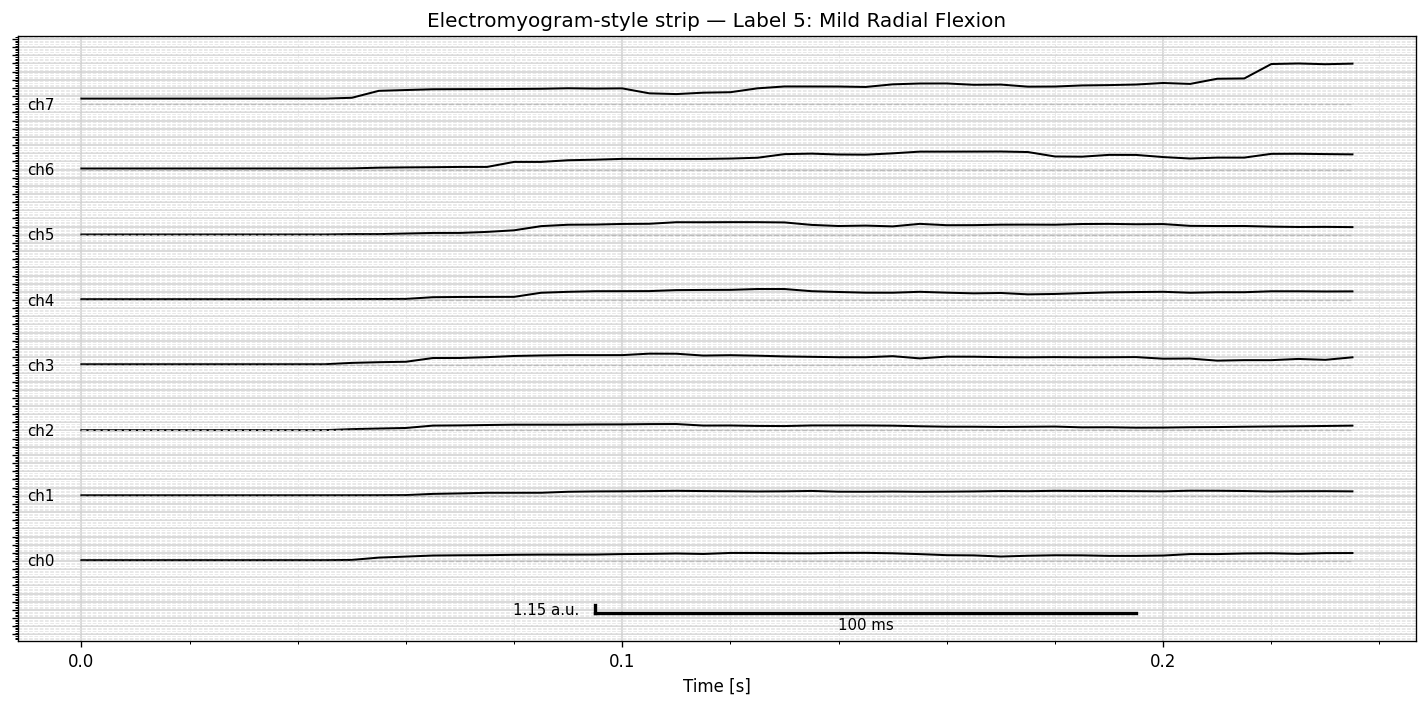

Index: 2425
Label ID: 5
Label Name: mild_radial_flexion
Shape: (8, 48) (C,T) | Duration: 0.20 s


In [7]:
train_dataset.visualize(2425)

In [ ]:
# from networks import EMGModel
# import torch
# # Hyperparameters
# hparams = {
#     "channels": 8,
#     "F1": 16,             # temporal filters
#     "D": 2,               # spatial multiplier
#     "F2": 32,             # separable filters
#     "kernel_length": 8,   # ~40 ms
#     "dropout": 0.3,
#     "pool1_time": 2,      # first pooling (reduces time /2)
#     "pool2_time": 2,       # second pooling (/2 again)
#     'optimization':
#     {
#         'lr': 0.0001,
#         'epochs': 100,
#         'batch_size': 8,
#         'criterion': 'nn.CrossEntropyLoss',
#         'optimizer': 'optim.Adam',
#     },
#     'num_classes': 9
# }

# # Check if CUDA is available and assign device
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# # Create an instance of the model
# model = EMGModel(hparams).to(device)


Using device: cuda:0


In [4]:
from networks import EMGModel, CircularEMGModel, CircularEMGModel2
import torch
# Hyperparameters
hparams = {'D': 16,
 'F1': 128,
 'F2': 128,
 'channels': 8,
 'dropout': 0.138,
 'early_stopping': {'burn_in': 4,
                    'cooldown': 4,
                    'min_delta': 0.00047912070773434816,
                    'mode': 'min',
                    'monitor': 'val_loss',
                    'patience': 15,
                    'restore_best': True},
 'extra_blocks': 1,
 'extra_dilation': 1,
 'extra_dropout': 0.138,
 'extra_kernel': 7,
 'kernel_length': 24,
 'num_classes': 9,
 'optimization': {'batch_size': 24,
                  'criterion': 'nn.CrossEntropyLoss',
                  'epochs': 100,
                  'grad_clip': 2.0,
                  'lr': 0.00011396995431147184,
                  'optimizer': 'optim.AdamW'},
 'pool1_time': 3,
 'pool2_time': 8,
 'scheduler': {'factor': 0.649590522222718,
               'min_lr': 3.0570412165705003e-07,
               'mode': 'min',
               'monitor': 'val_loss',
               'name': 'torch.optim.lr_scheduler.ReduceLROnPlateau',
               'patience': 6,
               'step_mode': 'plateau',
               'verbose': True}}


# Check if CUDA is available and assign device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Create an instance of the model
model = EMGModel(hparams).to(device)


Using device: cuda:0


In [114]:
# import torch
# from torch.utils.data import DataLoader



# # train, val, and test split sizes
# train_size = int(0.8 * len(Dataset))  # 80% for training
# val_size = int(0.2 * len(Dataset))    # 10% for validation
# test_size = len(Dataset) - train_size - val_size  # The remaining for testing
# # Set a random seed for reproducibility
# torch.manual_seed(42)

# # Now split the dataset
# train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(Dataset, [train_size, val_size, test_size])


In [ ]:
# hparams = {
#     "channels": 8,
#     "F1": 16,
#     "D": 2,
#     "F2": 32,
#     "kernel_length": 8,
#     "dropout": 0.3,
#     "pool1_time": 2,
#     "pool2_time": 2,
#     "optimization": {
#       "lr": 0.001,
#       "epochs": 100,
#         "batch_size": 8,
#         "criterion": "nn.CrossEntropyLoss",
#         "optimizer": "optim.Adam"},
#     "num_classes": 9
#     }

In [49]:
import numpy as np
import torch
from torch.utils.data import DataLoader
from torch.utils.data.sampler import WeightedRandomSampler

def make_weighted_sampler(dataset, num_classes=9, smoothing=0.0):
    """
    Builds a WeightedRandomSampler so each class is drawn ~uniformly.
    `smoothing` in [0, 1): 0 = strict inverse-frequency; closer to 1 flattens weights.
    """
    # get labels as a 1D numpy array
    if hasattr(dataset, "y"):
        y = np.asarray(dataset.y)
    elif hasattr(dataset, "labels"):
        y = np.asarray(dataset.labels)
    else:
        raise AttributeError("Dataset must expose labels via `y` or `labels`.")

    counts = np.bincount(y, minlength=num_classes).astype(np.float64)
    counts[counts == 0] = 1.0  # avoid div-by-zero if a class is missing

    inv = 1.0 / counts
    # optional smoothing to avoid extreme weights when a class is super-rare
    w_per_class = (1 - smoothing) * inv / inv.sum() * num_classes + smoothing * 1.0

    weights = w_per_class[y]  # per-sample weight
    weights = torch.as_tensor(weights, dtype=torch.double)

    sampler = WeightedRandomSampler(
        weights=weights,
        num_samples=len(weights),    # one "epoch" roughly same number of samples
        replacement=True
    )
    return sampler

# --- usage ---
batch_size = hparams['optimization']['batch_size']
train_sampler = make_weighted_sampler(train_dataset, num_classes=9)
train_loader  = DataLoader(train_dataset, batch_size=batch_size, sampler=train_sampler, shuffle=False, drop_last=True)

# keep validation/test natural (no balancing there):
val_loader    = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, drop_last=True)
test_loader   = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last=True)

In [ ]:
# # Create an instance of the model
# from networks import EMGModel
# # Check if CUDA is available and assign device
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")
# model = EMGModel(hparams).to(device)

Using device: cuda:0


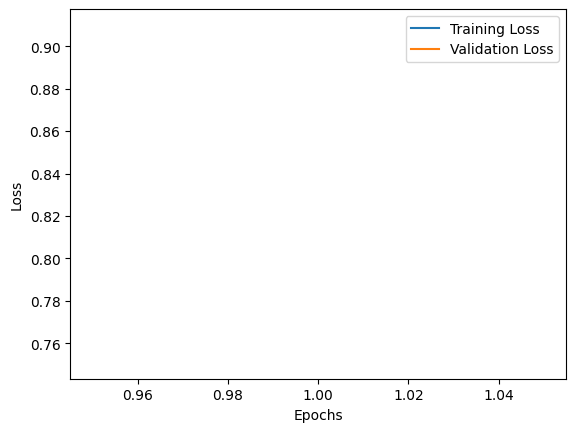

Renamed training session directory to models/EMGModel/2025-10-20_21-11-38_with_loss_0.9096


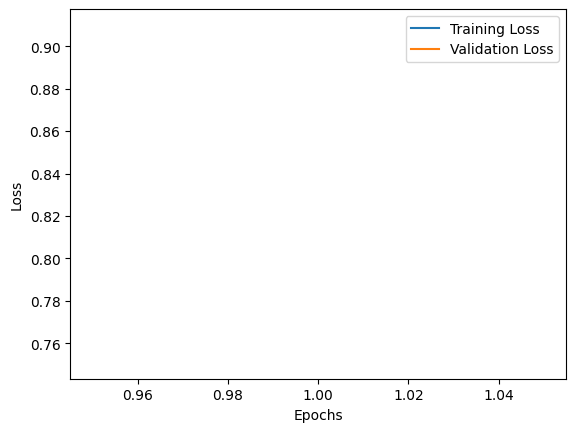

In [11]:
from training import train_model
# train_loader = DataLoader(train_dataset, batch_size=hparams['optimization']['batch_size'], shuffle=True,  pin_memory=False)
# val_loader = DataLoader(val_dataset, hparams['optimization']['batch_size'], shuffle=True)
train_model(model, train_loader, val_loader, device, hparams, plot_losses = True)

In [12]:
# === Repeated training to measure seed variance ===
import os, time, copy, glob, random, gc
import numpy as np
import torch

def _seed_all(seed: int, deterministic: bool = False):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed_all(seed)
    # Determinism toggle (slower but less variance if True)
    torch.backends.cudnn.deterministic = deterministic
    torch.backends.cudnn.benchmark = not deterministic

def _latest_run_dir(root="models/EMGModel", pattern="*with_loss*"):
    """Return most recently modified run dir (your trainer renames with _with_loss_)."""
    cand = glob.glob(os.path.join(root, pattern))
    if not cand:
        return None
    return max(cand, key=os.path.getmtime)

# -------- settings --------
K_RUNS = 5                       # number of repeats
#BASE_SEED = 1337                 # seeds = BASE_SEED + i
BASE_SEED = 133   
DETERMINISTIC = False            # set True to reduce variance (slower)
PLOT_LOSSES_PER_RUN = False      # your call; can be noisy in notebooks

# If your trainer expects plot_losses=True, override per-run here:
plot_flag = bool(PLOT_LOSSES_PER_RUN)

# -------- run K times --------
val_losses = []
run_dirs   = []
per_run    = []

print(f"Running {K_RUNS} repeats of the SAME hparams…")
t0 = time.time()
for i in range(K_RUNS):
    seed = BASE_SEED + i
    _seed_all(seed, deterministic=DETERMINISTIC)

    # Fresh copy so train_model can mutate safely
    hp = copy.deepcopy(hparams)

    # Optional: you can stash the seed inside hparams if your trainer logs it
    hp["run_seed"] = seed

    # Train
    model_i = copy.deepcopy(model).to(device)  # start from same architecture each time
    torch.cuda.empty_cache()
    gc.collect()

    try:
        train_model(model_i, train_loader, val_loader, device, hp, plot_losses=plot_flag)
    finally:
        # record artifacts
        v = float(hp.get("val_loss", float("inf")))
        val_losses.append(v)

        # best guess of the saved folder your trainer created/renamed
        run_dir = _latest_run_dir()  # adjust root if your path differs
        run_dirs.append(run_dir)

        per_run.append({
            "run": i,
            "seed": seed,
            "val_loss": v,
            "run_dir": run_dir,
        })

        # free GPU
        del model_i
        torch.cuda.empty_cache()
        gc.collect()

t1 = time.time()

# -------- summary --------
val_losses = np.array(val_losses, dtype=float)
best_idx = int(np.nanargmin(val_losses))
print("\n=== Repeats summary (same hyperparams) ===")
print(f"Runs: {K_RUNS}  |  Elapsed: {t1 - t0:.1f}s")
print(f"val_loss: mean={val_losses.mean():.6f}  std={val_losses.std(ddof=1):.6f}  "
      f"min={val_losses.min():.6f}  max={val_losses.max():.6f}")
print(f"Best run: #{best_idx}  seed={per_run[best_idx]['seed']}  "
      f"val_loss={val_losses[best_idx]:.6f}")
print(f"Best run folder (as saved by your trainer):\n  {per_run[best_idx]['run_dir']}")

# (Optional) pretty print all runs
print("\nAll runs:")
for r in per_run:
    print(f"  run {r['run']:>2} | seed={r['seed']:>6} | val_loss={r['val_loss']:.6f} | dir={r['run_dir']}")

# If you want these saved for later analysis:
import json, os
os.makedirs("repeat_runs_summary", exist_ok=True)
with open("repeat_runs_summary/summary.json", "w", encoding="utf-8") as f:
    json.dump({
        "K": K_RUNS,
        "base_seed": BASE_SEED,
        "deterministic": DETERMINISTIC,
        "val_loss_mean": float(val_losses.mean()),
        "val_loss_std": float(val_losses.std(ddof=1)),
        "best": per_run[best_idx],
        "runs": per_run,
    }, f, indent=2)
print("\nSaved: repeat_runs_summary/summary.json")


Epoch 1/100:   0%|          | 0/666 [00:00<?, ?batch/s]

Running 5 repeats of the SAME hparams…


Epoch 61/100: 100%|██████████| 666/666 [00:08<00:00, 81.76batch/s, loss: 0.7024 | acc: 80.23%]


Renamed training session directory to models/EMGModel/2025-10-17_15-44-13_with_loss_0.5674


Epoch 39/100: 100%|██████████| 666/666 [00:10<00:00, 61.88batch/s, loss: 0.8366 | acc: 79.10%]


Renamed training session directory to models/EMGModel/2025-10-17_15-54-46_with_loss_0.5866


Epoch 59/100: 100%|██████████| 666/666 [00:16<00:00, 40.89batch/s, loss: 0.5455 | acc: 80.20%]


Renamed training session directory to models/EMGModel/2025-10-17_16-00-48_with_loss_0.5865


Epoch 35/100: 100%|██████████| 666/666 [00:15<00:00, 42.14batch/s, loss: 0.2452 | acc: 77.28%]


Renamed training session directory to models/EMGModel/2025-10-17_16-12-31_with_loss_0.5945


Epoch 38/100: 100%|██████████| 666/666 [00:16<00:00, 41.59batch/s, loss: 0.5056 | acc: 78.42%]


Renamed training session directory to models/EMGModel/2025-10-17_16-22-08_with_loss_0.5828

=== Repeats summary (same hyperparams) ===
Runs: 5  |  Elapsed: 2873.6s
val_loss: mean=0.583564  std=0.010004  min=0.567368  max=0.594489
Best run: #0  seed=133  val_loss=0.567368
Best run folder (as saved by your trainer):
  models/EMGModel\2025-10-17_15-44-13_with_loss_0.5674

All runs:
  run  0 | seed=   133 | val_loss=0.567368 | dir=models/EMGModel\2025-10-17_15-44-13_with_loss_0.5674
  run  1 | seed=   134 | val_loss=0.586616 | dir=models/EMGModel\2025-10-17_15-54-46_with_loss_0.5866
  run  2 | seed=   135 | val_loss=0.586524 | dir=models/EMGModel\2025-10-17_16-00-48_with_loss_0.5865
  run  3 | seed=   136 | val_loss=0.594489 | dir=models/EMGModel\2025-10-17_16-12-31_with_loss_0.5945
  run  4 | seed=   137 | val_loss=0.582823 | dir=models/EMGModel\2025-10-17_16-22-08_with_loss_0.5828

Saved: repeat_runs_summary/summary.json


In [ ]:
# ---- Random Search for Architecture HParams (minimal, self-contained) ----
import os, json, math, gc, random, copy, time
import numpy as np
import torch
from tqdm import trange
from networks import EMGModel
from training import train_model

# ---- base hparams (kept as your reference; we only mutate the architecture keys) ----
base_hparams = {
    "channels": 8,
    "F1": 16, "D": 2, "F2": 32, "kernel_length": 8, "dropout": 0.3,
    "pool1_time": 2, "pool2_time": 2,
    'optimization': {
        'lr': 1e-4, 'epochs': 100, 'batch_size': 8,
        'criterion': 'nn.CrossEntropyLoss',
        'optimizer': 'optim.Adam',
        'grad_clip': 1.0
    },
    'scheduler': {
        'name': 'torch.optim.lr_scheduler.ReduceLROnPlateau',
        'step_mode': 'plateau',
        'monitor': 'val_loss',
        'mode': 'min',
        'factor': 0.5, 'patience': 2, 'min_lr': 1e-6, 'verbose': True
    },
    'early_stopping': {
        'monitor': 'val_loss', 'mode': 'min',
        'patience': 5, 'min_delta': 1e-4,
        'burn_in': 3, 'cooldown': 3,
        'restore_best': True
    },
    'num_classes': 9
}

# ---- search space (tweak as you like; ranges are sensible for EMG temporal CNNs) ----
SPACE = {
    "F1":           [48, 96, 128],
    "D":            [4, 8, 16],
    "F2":           [96, 128, 256],
    "kernel_length":[32, 64, 128],    # samples (pick to match ~20–80 ms given your fs)
    "dropout":      (0.1, 0.6),             # continuous uniform
    "pool1_time":   [2, 3, 4],
    "pool2_time":   [2, 3, 4],
}

def _seed_all(s: int):
    random.seed(s); np.random.seed(s); torch.manual_seed(s)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(s)

def sample_arch(space):
    # discrete choices
    F1  = random.choice(space["F1"])
    D   = random.choice(space["D"])
    # keep F2 >= F1 commonly (heuristic); if not desired, just use random.choice(space["F2"])
    F2_candidates = [x for x in space["F2"] if x >= F1] or space["F2"]
    F2  = random.choice(F2_candidates)
    k   = random.choice(space["kernel_length"])
    p1  = random.choice(space["pool1_time"])
    p2  = random.choice(space["pool2_time"])
    # continuous dropout
    dr  = round(random.uniform(*space["dropout"]), 3)
    return {"F1": F1, "D": D, "F2": F2, "kernel_length": k,
            "dropout": dr, "pool1_time": p1, "pool2_time": p2}

# ---- search settings ----
N_TRIALS = 10                         # increase for deeper search
#SEED_BASE = 1337                      # trial seeds = SEED_BASE + i
SEED_BASE = 1330                      # trial seeds = SEED_BASE + i
RESULTS_DIR = "./random_search_results"
os.makedirs(RESULTS_DIR, exist_ok=True)
RESULTS_JSON = os.path.join(RESULTS_DIR, "arch_search_results.jsonl")

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

best = {"val_loss": float("inf"), "trial": -1, "hparams": None}
all_rows = []

t0 = time.time()
with open(RESULTS_JSON, "w") as f:
    for trial in trange(N_TRIALS, desc="Random search trials"):
        # reproducibility per trial
        _seed_all(SEED_BASE + trial)

        # sample new architecture
        arch = sample_arch(SPACE)
        hparams = copy.deepcopy(base_hparams)
        hparams.update(arch)  # inject F1/D/F2/kernel_length/dropout/pools

        # build & train
        model = EMGModel(hparams).to(device)

        # IMPORTANT: Disable live plotting for speed during search
        try:
            train_model(model, train_loader, val_loader, device, hparams, plot_losses=False)
        except Exception as e:
            # Log and continue on any failure to keep search robust
            print(f"[Trial {trial}] training failed: {repr(e)}")
            # mark as bad with large val_loss
            hparams['val_loss'] = float("inf")

        # fetch val loss recorded by your train_model (it mutates hparams['val_loss'])
        val_loss = float(hparams.get('val_loss', float("inf")))
        row = {
            "trial": trial,
            "val_loss": val_loss,
            **arch,
            "lr": hparams["optimization"]["lr"],
            "epochs": hparams["optimization"]["epochs"],
            "batch_size": hparams["optimization"]["batch_size"]
        }
        all_rows.append(row)

        # write line-delimited JSON (append mode)
        f.write(json.dumps(row) + "\n"); f.flush()

        # track best
        if val_loss < best["val_loss"]:
            best = {"val_loss": val_loss, "trial": trial, "hparams": copy.deepcopy(hparams)}
            # also drop a snapshot of best-so-far config for convenience
            with open(os.path.join(RESULTS_DIR, "best_config.json"), "w") as bf:
                json.dump(best["hparams"], bf, indent=2)

        # free GPU mem between trials
        del model
        torch.cuda.empty_cache(); gc.collect()

t1 = time.time()

# ---- summary ----
# sort top-5 by val_loss
top5 = sorted(all_rows, key=lambda r: r["val_loss"])[:5]
print("\n=== Random Search Summary ===")
print(f"Trials: {N_TRIALS} | Elapsed: {t1 - t0:.1f}s")
print(f"Best trial: #{best['trial']} | best val_loss = {best['val_loss']:.6f}")
print("Top-5 configs:")
for r in top5:
    print(f"  trial {r['trial']:>3} | val_loss {r['val_loss']:.6f} | "
          f"F1={r['F1']}, D={r['D']}, F2={r['F2']}, k={r['kernel_length']}, "
          f"dropout={r['dropout']}, pool1={r['pool1_time']}, pool2={r['pool2_time']}")
print(f"\nSaved per-trial results to {RESULTS_JSON}")
print(f"Best full hparams saved to {os.path.join(RESULTS_DIR, 'best_config.json')}")


Using device: cuda:0


Random search trials:   0%|          | 0/10 [00:00<?, ?it/s]c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(
Epoch 42/100: 100%|██████████| 1999/1999 [00:27<00:00, 71.91batch/s, loss: 1.1501 | acc: 67.13%]


Renamed training session directory to models/EMGModel/2025-10-14_13-27-44_with_loss_0.7835


Random search trials:  20%|██        | 2/10 [30:03<1:54:37, 859.66s/it] 


Renamed training session directory to models/EMGModel/2025-10-14_13-46-43_with_loss_0.6893


Epoch 38/100: 100%|██████████| 1999/1999 [00:28<00:00, 70.00batch/s, loss: 1.3755 | acc: 73.14%]


Renamed training session directory to models/EMGModel/2025-10-14_13-57-47_with_loss_0.6771


Random search trials:  40%|████      | 4/10 [1:08:51<1:47:34, 1075.80s/it]

Renamed training session directory to models/EMGModel/2025-10-14_14-15-33_with_loss_0.6682


Epoch 29/100: 100%|██████████| 1999/1999 [00:28<00:00, 70.11batch/s, loss: 0.7636 | acc: 69.16%]


Renamed training session directory to models/EMGModel/2025-10-14_14-36-36_with_loss_0.7513


Epoch 40/100: 100%|██████████| 1999/1999 [00:29<00:00, 68.73batch/s, loss: 0.8618 | acc: 74.76%]


Renamed training session directory to models/EMGModel/2025-10-14_14-50-55_with_loss_0.6776


Epoch 26/100: 100%|██████████| 1999/1999 [00:31<00:00, 64.40batch/s, loss: 1.0379 | acc: 72.11%]


Renamed training session directory to models/EMGModel/2025-10-14_15-09-35_with_loss_0.7154


Epoch 29/100: 100%|██████████| 1999/1999 [00:36<00:00, 54.63batch/s, loss: 0.2328 | acc: 75.88%]


Renamed training session directory to models/EMGModel/2025-10-14_15-22-15_with_loss_0.6835


Epoch 25/100: 100%|██████████| 1999/1999 [00:30<00:00, 66.34batch/s, loss: 0.3678 | acc: 71.58%]


Renamed training session directory to models/EMGModel/2025-10-14_15-40-31_with_loss_0.7232


Epoch 56/100: 100%|██████████| 1999/1999 [00:29<00:00, 67.34batch/s, loss: 0.9792 | acc: 70.09%]


Renamed training session directory to models/EMGModel/2025-10-14_15-52-34_with_loss_0.7080


Random search trials: 100%|██████████| 10/10 [2:54:06<00:00, 1044.67s/it]


=== Random Search Summary ===
Trials: 10 | Elapsed: 10446.7s
Best trial: #3 | best val_loss = 0.668199
Top-5 configs:
  trial   3 | val_loss 0.668199 | F1=96, D=8, F2=256, k=32, dropout=0.336, pool1=2, pool2=4
  trial   2 | val_loss 0.677053 | F1=48, D=8, F2=96, k=64, dropout=0.219, pool1=2, pool2=2
  trial   5 | val_loss 0.677633 | F1=128, D=16, F2=128, k=32, dropout=0.13, pool1=3, pool2=4
  trial   7 | val_loss 0.683483 | F1=128, D=16, F2=256, k=128, dropout=0.183, pool1=4, pool2=4
  trial   1 | val_loss 0.689328 | F1=128, D=16, F2=256, k=64, dropout=0.278, pool1=2, pool2=4

Saved per-trial results to ./random_search_results\arch_search_results.jsonl
Best full hparams saved to ./random_search_results\best_config.json


In [ ]:
# === Bayesian HParam Optimization with Optuna (history + expanded ranges, no dynamic dists) ===
import os, re, json, time, copy, glob, gc, random
import numpy as np
import torch

# 1) Optuna imports (install if needed)
try:
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import CategoricalDistribution, FloatDistribution
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "optuna"])
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import CategoricalDistribution, FloatDistribution

from networks import EMGModel
from training import train_model

# -------- Fixed settings you want identical --------
FIXED_OPT = {
    "optimization.lr": 1e-4,
    "optimization.epochs": 100,
    "optimization.batch_size": 8,
    "optimization.criterion": "nn.CrossEntropyLoss",
    "optimization.optimizer": "optim.Adam",
    "optimization.grad_clip": 1.0,
}
FIXED_SCHED = {
    "scheduler.name": "torch.optim.lr_scheduler.ReduceLROnPlateau",
    "scheduler.step_mode": "plateau",
    "scheduler.monitor": "val_loss",
    "scheduler.mode": "min",
    "scheduler.factor": 0.5,
    "scheduler.patience": 2,
    "scheduler.min_lr": 1e-06,
    "scheduler.verbose": True,
}
FIXED_ES = {
    "early_stopping.monitor": "val_loss",
    "early_stopping.mode": "min",
    "early_stopping.patience": 5,
    "early_stopping.min_delta": 1e-4,
    "early_stopping.burn_in": 3,
    "early_stopping.cooldown": 3,
    "early_stopping.restore_best": True,
}

# Base hparams (fixed parts)
BASE_HP = {
    "channels": 8,
    "optimization": {
        "lr": 1e-4,
        "epochs": 100,
        "batch_size": 8,
        "criterion": "nn.CrossEntropyLoss",
        "optimizer": "optim.Adam",
        "grad_clip": 1.0,
    },
    "scheduler": {
        "name": "torch.optim.lr_scheduler.ReduceLROnPlateau",
        "step_mode": "plateau",
        "monitor": "val_loss",
        "mode": "min",
        "factor": 0.5,
        "patience": 2,
        "min_lr": 1e-6,
        "verbose": True,
    },
    "early_stopping": {
        "monitor": "val_loss",
        "mode": "min",
        "patience": 5,
        "min_delta": 1e-4,
        "burn_in": 3,
        "cooldown": 3,
        "restore_best": True,
    },
    "num_classes": 9,
}

# -------- Locate model root --------
MODEL_ROOTS = ["models/EMGModel", "train/models/EMGModel", "./models/EMGModel", "./train/models/EMGModel"]
MODEL_ROOT = next((p for p in MODEL_ROOTS if os.path.isdir(p)), None)
if MODEL_ROOT is None:
    raise FileNotFoundError("Could not locate models/EMGModel directory.")

# -------- Helpers --------
def load_hparams_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def folder_val_loss_from_name(folder):
    m = re.search(r"_with_loss_([0-9]*\.[0-9]+)", os.path.basename(folder))
    return float(m.group(1)) if m else None

def matches_fixed_config(hp):
    for k, v in FIXED_OPT.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_SCHED.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_ES.items():
        if hp.get(k) != v: return False
    return True

# -------- Gather historical trials that match exactly --------
hist = []
for folder in sorted(glob.glob(os.path.join(MODEL_ROOT, "*with_loss*"))):
    hp_path = os.path.join(folder, "hyperparameters.json")
    if not os.path.isfile(hp_path):
        continue
    try:
        hp = load_hparams_json(hp_path)
        if not matches_fixed_config(hp):
            continue
        arch = {k: hp.get(k) for k in ("F1","D","F2","kernel_length","dropout","pool1_time","pool2_time")}
        if any(v is None for v in arch.values()):
            continue
        vloss = hp.get("val_loss", None) or folder_val_loss_from_name(folder)
        if vloss is None:
            continue
        hist.append({"params": arch, "value": float(vloss), "path": folder})
    except Exception:
        continue

print(f"Loaded {len(hist)} historical matching runs from {MODEL_ROOT}.")

# -------- Build candidate sets (union of baseline, expanded, and history) --------
BASE_SET = {
    "F1": [8, 12, 16, 24, 32, 48],
    "D": [1, 2, 4],
    "F2": [16, 24, 32, 48, 64, 96],
    "kernel_length": [8, 12, 16, 24, 32],
    "pool1_time": [2, 3, 4],
    "pool2_time": [2, 3, 4],
}
# Your newer, bigger intervals (edit freely):
EXPANDED_SET = {
    "F1": [64, 96, 128],
    "D": [6, 8, 16],
    "F2": [128, 192, 256],
    "kernel_length": [48, 64, 128],
    "pool1_time": [1],
    "pool2_time": [1],
}

def _union_sorted(*iters):
    return sorted({int(x) for it in iters for x in it})

UNION_SET = {k: _union_sorted(BASE_SET.get(k, []), EXPANDED_SET.get(k, [])) for k in BASE_SET.keys()}

for row in hist:
    p = row["params"]
    for k in ("F1","D","F2","kernel_length","pool1_time","pool2_time"):
        UNION_SET[k] = _union_sorted(UNION_SET[k], [p[k]])

# Dropout: continuous range + anchors from history (anchors influence TPE via seeded trials)
DROPOUT_MIN, DROPOUT_MAX = 0.0, 0.6
DROPOUT_ANCHORS = sorted({round(float(row["params"]["dropout"]), 3) for row in hist})

print("Unified candidate sets:")
for k in ("F1","D","F2","kernel_length","pool1_time","pool2_time"):
    print(f"  {k}: {UNION_SET[k]}")
print(f"  dropout range: [{DROPOUT_MIN}, {DROPOUT_MAX}] with anchors {DROPOUT_ANCHORS}")

# -------- Optuna study (seeded with historical data) --------
SEED = 1337
sampler = optuna.samplers.TPESampler(seed=SEED, multivariate=True, group=True)
study = optuna.create_study(direction="minimize", sampler=sampler)

# Use SAME distributions for seeding and for objective (NO dynamic candidate lists)
DIST = {
    "F1": CategoricalDistribution(choices=UNION_SET["F1"]),
    "D": CategoricalDistribution(choices=UNION_SET["D"]),
    "F2": CategoricalDistribution(choices=UNION_SET["F2"]),  # fixed; constraint handled by pruning
    "kernel_length": CategoricalDistribution(choices=UNION_SET["kernel_length"]),
    "pool1_time": CategoricalDistribution(choices=UNION_SET["pool1_time"]),
    "pool2_time": CategoricalDistribution(choices=UNION_SET["pool2_time"]),
    "dropout": FloatDistribution(low=DROPOUT_MIN, high=DROPOUT_MAX, step=0.001),
}

for row in hist:
    p = row["params"]
    params = {
        "F1": int(p["F1"]),
        "D": int(p["D"]),
        "F2": int(p["F2"]),
        "kernel_length": int(p["kernel_length"]),
        "pool1_time": int(p["pool1_time"]),
        "pool2_time": int(p["pool2_time"]),
        "dropout": float(round(p["dropout"], 3)),
    }
    t = create_trial(
        state=optuna.trial.TrialState.COMPLETE,
        params=params,
        distributions=DIST,
        value=float(row["value"]),
    )
    study.add_trial(t)

def _seed_all(s: int):
    random.seed(s); np.random.seed(s); torch.manual_seed(s)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(s)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Optuna will train on device: {device}")

def objective(trial: optuna.trial.Trial):
    # Suggest from FIXED distributions (identical to seeding)
    F1 = trial.suggest_categorical("F1", UNION_SET["F1"])
    D  = trial.suggest_categorical("D", UNION_SET["D"])
    F2 = trial.suggest_categorical("F2", UNION_SET["F2"])  # fixed set
    k  = trial.suggest_categorical("kernel_length", UNION_SET["kernel_length"])
    p1 = trial.suggest_categorical("pool1_time", UNION_SET["pool1_time"])
    p2 = trial.suggest_categorical("pool2_time", UNION_SET["pool2_time"])
    dr = trial.suggest_float("dropout", DROPOUT_MIN, DROPOUT_MAX, step=0.001)
    dr = float(round(dr, 3))

    # Enforce constraint via pruning (avoids dynamic value space)
    if F2 < F1:
        raise optuna.TrialPruned("Constraint violated: F2 < F1")

    hparams = copy.deepcopy(BASE_HP)
    hparams.update({
        "F1": int(F1), "D": int(D), "F2": int(F2),
        "kernel_length": int(k), "dropout": dr,
        "pool1_time": int(p1), "pool2_time": int(p2),
        # Optional: per-trial seed
        # "seed": 1330 + trial.number, "deterministic": True,
    })

    try:
        model = EMGModel(hparams).to(device)
    except Exception as e:
        raise optuna.TrialPruned(f"Invalid architecture: {e}")

    try:
        train_model(model, train_loader, val_loader, device, hparams, plot_losses=False)
        val_loss = float(hparams.get("val_loss", float("inf")))
    except Exception as e:
        print(f"[Optuna] trial {trial.number} failed: {repr(e)}")
        val_loss = float("inf")
    finally:
        del model
        torch.cuda.empty_cache(); gc.collect()

    return val_loss

# ---- Optimize ----
N_TRIALS = 20  # tweak as you like
t0 = time.time()
study.optimize(objective, n_trials=N_TRIALS, show_progress_bar=True)
t1 = time.time()

print(f"\n=== Optuna Summary ===")
print(f"Total trials (incl. seeded): {len(study.trials)}")
print(f"New trials run: {N_TRIALS} | Elapsed: {t1 - t0:.1f}s")
print(f"Best value (val_loss): {study.best_value:.6f}")
print(f"Best params: {study.best_params}")

best_arch = study.best_params
best_hparams = copy.deepcopy(BASE_HP)
best_hparams.update({
    "F1": int(best_arch["F1"]),
    "D": int(best_arch["D"]),
    "F2": int(best_arch["F2"]),
    "kernel_length": int(best_arch["kernel_length"]),
    "dropout": float(round(best_arch["dropout"], 3)),
    "pool1_time": int(best_arch["pool1_time"]),
    "pool2_time": int(best_arch["pool2_time"]),
})
os.makedirs("random_search_results", exist_ok=True)
with open("random_search_results/optuna_best_config.json", "w", encoding="utf-8") as f:
    json.dump(best_hparams, f, indent=2)
print("Saved best full hparams to random_search_results/optuna_best_config.json")


c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``group`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-14 23:19:45,888] A new study created in memory with name: no-name-39a7e9a1-b724-45f3-951a-09916ead11a8


Loaded 63 historical matching runs from models/EMGModel.
Unified candidate sets:
  F1: [8, 12, 16, 24, 32, 48, 64, 96, 128]
  D: [1, 2, 4, 6, 8, 16]
  F2: [16, 24, 32, 48, 64, 96, 128, 192, 256]
  kernel_length: [8, 12, 16, 24, 32, 48, 64, 128]
  pool1_time: [1, 2, 3, 4]
  pool2_time: [1, 2, 3, 4]
  dropout range: [0.0, 0.6] with anchors [0.117, 0.121, 0.13, 0.144, 0.149, 0.158, 0.159, 0.162, 0.183, 0.195, 0.199, 0.202, 0.206, 0.209, 0.211, 0.214, 0.215, 0.219, 0.222, 0.245, 0.25, 0.254, 0.26, 0.261, 0.262, 0.263, 0.278, 0.336, 0.36, 0.361, 0.367, 0.402, 0.413, 0.453, 0.478, 0.496, 0.5, 0.502, 0.514, 0.524, 0.527, 0.551, 0.564, 0.585]
Optuna will train on device: cuda:0


Best trial: 54. Best value: 0.631355:   0%|          | 0/20 [00:00<?, ?it/s]c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


[I 2025-10-14 23:19:45,951] Trial 63 pruned. Constraint violated: F2 < F1


Epoch 23/100: 100%|██████████| 1999/1999 [00:30<00:00, 65.93batch/s, loss: 0.6215 | acc: 71.37%]


Renamed training session directory to models/EMGModel/2025-10-14_23-19-45_with_loss_0.7427


Best trial: 54. Best value: 0.631355:  10%|█         | 2/20 [09:49<1:28:21, 294.51s/it]

[I 2025-10-14 23:29:34,953] Trial 64 finished with value: 0.7426967854890766 and parameters: {'F1': 128, 'D': 1, 'F2': 128, 'kernel_length': 32, 'pool1_time': 3, 'pool2_time': 2, 'dropout': 0.127}. Best is trial 54 with value: 0.6313547018945564.


Epoch 36/100: 100%|██████████| 1999/1999 [00:30<00:00, 65.50batch/s, loss: 1.1332 | acc: 74.02%]


Renamed training session directory to models/EMGModel/2025-10-14_23-29-35_with_loss_0.6249


Best trial: 65. Best value: 0.62493:  15%|█▌        | 3/20 [28:30<3:01:07, 639.24s/it] 

[I 2025-10-14 23:48:16,812] Trial 65 finished with value: 0.6249299075099561 and parameters: {'F1': 128, 'D': 16, 'F2': 128, 'kernel_length': 24, 'pool1_time': 3, 'pool2_time': 4, 'dropout': 0.138}. Best is trial 65 with value: 0.6249299075099561.


Best trial: 65. Best value: 0.62493:  20%|██        | 4/20 [37:54<2:42:55, 610.98s/it]

Renamed training session directory to models/EMGModel/2025-10-14_23-48-16_with_loss_0.7682
[I 2025-10-14 23:57:40,313] Trial 66 finished with value: 0.7682200838749946 and parameters: {'F1': 12, 'D': 8, 'F2': 96, 'kernel_length': 12, 'pool1_time': 2, 'pool2_time': 4, 'dropout': 0.294}. Best is trial 65 with value: 0.6249299075099561.
[I 2025-10-14 23:57:40,325] Trial 67 pruned. Constraint violated: F2 < F1


Epoch 18/100: 100%|██████████| 1999/1999 [00:28<00:00, 70.06batch/s, loss: 1.9295 | acc: 63.24%]


Renamed training session directory to models/EMGModel/2025-10-14_23-57-40_with_loss_0.8958


Epoch 1/100:   0%|          | 0/1999 [00:00<?, ?batch/s, loss: 1.7948 | acc: 26.39%]

[I 2025-10-15 00:05:21,638] Trial 68 finished with value: 0.8958181661680173 and parameters: {'F1': 8, 'D': 2, 'F2': 256, 'kernel_length': 128, 'pool1_time': 4, 'pool2_time': 4, 'dropout': 0.405}. Best is trial 65 with value: 0.6249299075099561.
[I 2025-10-15 00:05:21,672] Trial 69 pruned. Constraint violated: F2 < F1


Epoch 26/100: 100%|██████████| 1999/1999 [00:29<00:00, 68.88batch/s, loss: 1.4744 | acc: 74.21%]


Renamed training session directory to models/EMGModel/2025-10-15_00-05-21_with_loss_0.7407


Best trial: 65. Best value: 0.62493:  40%|████      | 8/20 [58:46<1:21:18, 406.55s/it]


[I 2025-10-15 00:18:32,500] Trial 70 finished with value: 0.7406591580452065 and parameters: {'F1': 32, 'D': 2, 'F2': 256, 'kernel_length': 128, 'pool1_time': 4, 'pool2_time': 4, 'dropout': 0.049}. Best is trial 65 with value: 0.6249299075099561.


Best trial: 65. Best value: 0.62493:  40%|████      | 8/20 [1:15:14<1:21:18, 406.55s/it]

Renamed training session directory to models/EMGModel/2025-10-15_00-18-32_with_loss_0.6998
[I 2025-10-15 00:34:59,960] Trial 71 finished with value: 0.6997525533429446 and parameters: {'F1': 96, 'D': 2, 'F2': 256, 'kernel_length': 12, 'pool1_time': 1, 'pool2_time': 4, 'dropout': 0.289}. Best is trial 65 with value: 0.6249299075099561.


Epoch 30/100: 100%|██████████| 1999/1999 [00:28<00:00, 70.79batch/s, loss: 0.8225 | acc: 74.33%]


Renamed training session directory to models/EMGModel/2025-10-15_00-35-00_with_loss_0.6689


Best trial: 65. Best value: 0.62493:  50%|█████     | 10/20 [1:28:23<1:40:35, 603.59s/it]


[I 2025-10-15 00:48:09,916] Trial 72 finished with value: 0.668851140514763 and parameters: {'F1': 48, 'D': 16, 'F2': 128, 'kernel_length': 32, 'pool1_time': 3, 'pool2_time': 4, 'dropout': 0.078}. Best is trial 65 with value: 0.6249299075099561.


Best trial: 65. Best value: 0.62493:  55%|█████▌    | 11/20 [1:41:02<1:36:37, 644.16s/it]

Renamed training session directory to models/EMGModel/2025-10-15_00-48-10_with_loss_0.7045
[I 2025-10-15 01:00:47,941] Trial 73 finished with value: 0.704486491879504 and parameters: {'F1': 96, 'D': 8, 'F2': 256, 'kernel_length': 24, 'pool1_time': 2, 'pool2_time': 1, 'dropout': 0.371}. Best is trial 65 with value: 0.6249299075099561.


Epoch 35/100: 100%|██████████| 1999/1999 [00:31<00:00, 62.56batch/s, loss: 0.2538 | acc: 76.13%]


Renamed training session directory to models/EMGModel/2025-10-15_01-00-47_with_loss_0.6684


Best trial: 65. Best value: 0.62493:  60%|██████    | 12/20 [1:58:45<1:41:07, 758.46s/it]


[I 2025-10-15 01:18:30,957] Trial 74 finished with value: 0.6683667963271682 and parameters: {'F1': 48, 'D': 8, 'F2': 128, 'kernel_length': 32, 'pool1_time': 1, 'pool2_time': 4, 'dropout': 0.013000000000000001}. Best is trial 65 with value: 0.6249299075099561.


Epoch 36/100: 100%|██████████| 1999/1999 [00:30<00:00, 66.15batch/s, loss: 1.1254 | acc: 75.50%]


Renamed training session directory to models/EMGModel/2025-10-15_01-18-30_with_loss_0.6561


Best trial: 65. Best value: 0.62493:  65%|██████▌   | 13/20 [2:14:55<1:35:24, 817.81s/it]


[I 2025-10-15 01:34:41,032] Trial 75 finished with value: 0.6561263668518544 and parameters: {'F1': 48, 'D': 6, 'F2': 128, 'kernel_length': 32, 'pool1_time': 3, 'pool2_time': 1, 'dropout': 0.037}. Best is trial 65 with value: 0.6249299075099561.


Epoch 25/100: 100%|██████████| 1999/1999 [00:30<00:00, 66.52batch/s, loss: 0.1511 | acc: 73.03%]


Renamed training session directory to models/EMGModel/2025-10-15_01-34-41_with_loss_0.7136


Best trial: 65. Best value: 0.62493:  70%|███████   | 14/20 [2:27:42<1:20:19, 803.29s/it]


[I 2025-10-15 01:47:28,091] Trial 76 finished with value: 0.7136285106899833 and parameters: {'F1': 24, 'D': 8, 'F2': 128, 'kernel_length': 32, 'pool1_time': 1, 'pool2_time': 4, 'dropout': 0.073}. Best is trial 65 with value: 0.6249299075099561.


Best trial: 65. Best value: 0.62493:  75%|███████▌  | 15/20 [2:44:38<1:12:05, 865.16s/it]

Renamed training session directory to models/EMGModel/2025-10-15_01-47-28_with_loss_0.6425
[I 2025-10-15 02:04:24,653] Trial 77 finished with value: 0.6425488321705238 and parameters: {'F1': 128, 'D': 6, 'F2': 192, 'kernel_length': 32, 'pool1_time': 3, 'pool2_time': 1, 'dropout': 0.022}. Best is trial 65 with value: 0.6249299075099561.


Epoch 38/100: 100%|██████████| 1999/1999 [00:25<00:00, 77.60batch/s, loss: 2.0217 | acc: 74.04%]


Plotting heatmap for x=F2 vs y=pool2_time (color = val_loss) from 91 runs


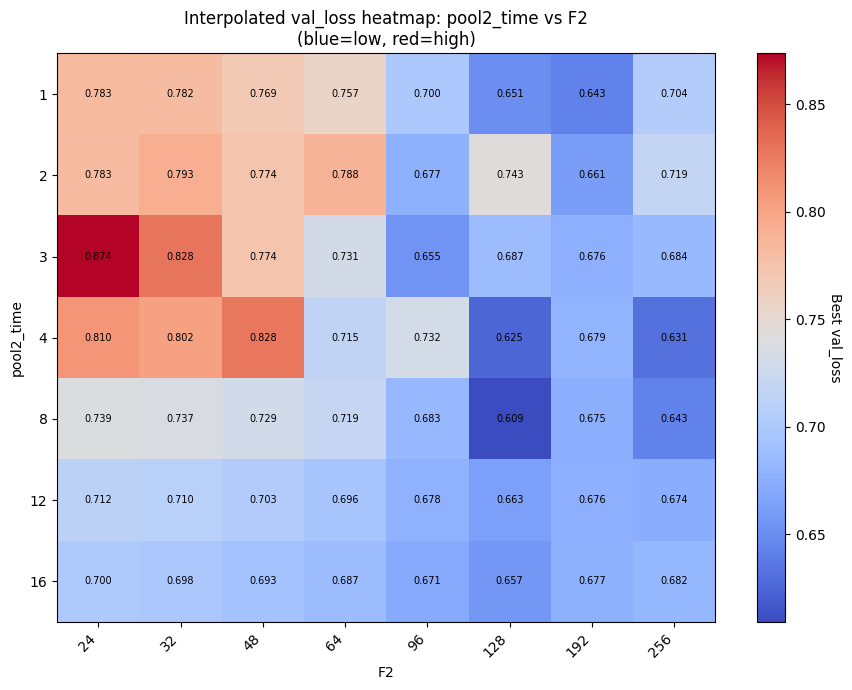

In [84]:
# --- Heatmap with blue=low, red=high and interpolation for missing combos ---
import os, glob, json, random, re
from collections import defaultdict
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Where to look for your saved runs
MODEL_ROOTS = ["models/EMGModel", "train/models/EMGModel", "./models/EMGModel", "./train/models/EMGModel"]
MODEL_ROOT = next((p for p in MODEL_ROOTS if os.path.isdir(p)), None)
if MODEL_ROOT is None:
    raise FileNotFoundError("Could not locate models/EMGModel directory.")

# Optional filter: only include runs that match your fixed training setup
FILTER_FIXED = False
FIXED_OPT = {
    "optimization.lr": 1e-4,
    "optimization.epochs": 100,
    "optimization.batch_size": 8,
    "optimization.criterion": "nn.CrossEntropyLoss",
    "optimization.optimizer": "optim.Adam",
    "optimization.grad_clip": 1.0,
}
FIXED_SCHED = {
    "scheduler.name": "torch.optim.lr_scheduler.ReduceLROnPlateau",
    "scheduler.step_mode": "plateau",
    "scheduler.monitor": "val_loss",
    "scheduler.mode": "min",
    "scheduler.factor": 0.5,
    "scheduler.patience": 2,
    "scheduler.min_lr": 1e-06,
    "scheduler.verbose": True,
}
FIXED_ES = {
    "early_stopping.monitor": "val_loss",
    "early_stopping.mode": "min",
    "early_stopping.patience": 5,
    "early_stopping.min_delta": 1e-4,
    "early_stopping.burn_in": 3,
    "early_stopping.cooldown": 3,
    "early_stopping.restore_best": True,
}

def matches_fixed_config(hp):
    for k, v in FIXED_OPT.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_SCHED.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_ES.items():
        if hp.get(k) != v: return False
    return True

def folder_val_loss_from_name(folder):
    m = re.search(r"_with_loss_([0-9]*\.[0-9]+)", os.path.basename(folder))
    return float(m.group(1)) if m else None

# Collect records from folders that contain a saved val loss
rows = []
for folder in sorted(glob.glob(os.path.join(MODEL_ROOT, "*with_loss*"))):
    hp_path = os.path.join(folder, "hyperparameters.json")
    if not os.path.isfile(hp_path):
        continue
    try:
        with open(hp_path, "r", encoding="utf-8") as f:
            hp = json.load(f)
    except Exception:
        continue
    if FILTER_FIXED and not matches_fixed_config(hp):
        continue

    vloss = hp.get("val_loss", None)
    if vloss is None:
        vloss = folder_val_loss_from_name(folder)
    if vloss is None:
        continue

    def getv(k):
        return hp.get(k, None)

    record = {
        "F1": getv("F1"),
        "F2": getv("F2"),
        "D": getv("D"),
        "kernel_length": getv("kernel_length"),
        "dropout": float(round(getv("dropout"), 3)) if getv("dropout") is not None else None,
        "pool1_time": getv("pool1_time"),
        "pool2_time": getv("pool2_time"),
        "val_loss": float(vloss),
        "folder": folder,
    }
    if any(record[k] is None for k in ["F1","F2","D","kernel_length","dropout","pool1_time","pool2_time"]):
        continue

    rows.append(record)

if not rows:
    raise RuntimeError("No matching runs with a saved val loss were found.")

df = pd.DataFrame(rows)

# Pick two random hyperparams to visualize
CANDIDATES = ["F1", "F2", "D", "kernel_length", "dropout", "pool1_time", "pool2_time"]
x_param, y_param = random.sample(CANDIDATES, 2)
print(f"Plotting heatmap for x={x_param} vs y={y_param} (color = val_loss) from {len(df)} runs")

# Use the best (min) val_loss for duplicate (x,y) combos
agg = df.groupby([x_param, y_param], as_index=False)["val_loss"].min()

# Build the grid from all observed values of x and y
x_vals = sorted(agg[x_param].unique())
y_vals = sorted(agg[y_param].unique())

# Create lookup for known points
known = {(row[x_param], row[y_param]): row["val_loss"] for _, row in agg.iterrows()}

# Inverse Distance Weighting (IDW) interpolation to fill missing combos
# Normalize x/y to [0,1] to balance scales
x_min, x_max = min(x_vals), max(x_vals)
y_min, y_max = min(y_vals), max(y_vals)
def norm_x(x): 
    return 0.0 if x_max == x_min else (x - x_min) / (x_max - x_min)
def norm_y(y): 
    return 0.0 if y_max == y_min else (y - y_min) / (y_max - y_min)

# Precompute normalized coordinates of known points
known_pts = []
for (xx, yy), v in known.items():
    known_pts.append((norm_x(xx), norm_y(yy), float(v)))

def idw(xn, yn, power=2, eps=1e-12):
    # If exact match exists, return it directly
    for kx, ky, kv in known_pts:
        if abs(kx - xn) < eps and abs(ky - yn) < eps:
            return kv
    # Otherwise compute weighted average
    num, den = 0.0, 0.0
    for kx, ky, kv in known_pts:
        d2 = (kx - xn)**2 + (ky - yn)**2
        w = 1.0 / max(d2, eps)**(power/2.0)
        num += w * kv
        den += w
    return num / max(den, eps)

# Build dense matrix with interpolation
Z = np.zeros((len(y_vals), len(x_vals)), dtype=float)
for iy, yv in enumerate(y_vals):
    for ix, xv in enumerate(x_vals):
        if (xv, yv) in known:
            Z[iy, ix] = known[(xv, yv)]
        else:
            Z[iy, ix] = idw(norm_x(xv), norm_y(yv), power=2)

# Plot heatmap: blue=low, red=high
fig, ax = plt.subplots(figsize=(9, 7))
im = ax.imshow(Z, aspect="auto", cmap="coolwarm", origin="upper",
               vmin=np.nanmin(Z), vmax=np.nanmax(Z))

cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Best val_loss", rotation=270, labelpad=12)

# Axis ticks/labels
ax.set_xticks(np.arange(len(x_vals)))
ax.set_yticks(np.arange(len(y_vals)))
ax.set_xticklabels([str(v) for v in x_vals], rotation=45, ha="right")
ax.set_yticklabels([str(v) for v in y_vals])
ax.set_xlabel(x_param)
ax.set_ylabel(y_param)
ax.set_title(f"Interpolated val_loss heatmap: {y_param} vs {x_param}\n(blue=low, red=high)")

# Optional: annotate with numbers (comment out if too cluttered)
for iy in range(Z.shape[0]):
    for ix in range(Z.shape[1]):
        ax.text(ix, iy, f"{Z[iy, ix]:.3f}", va="center", ha="center", fontsize=7, color="black")

plt.tight_layout()
plt.show()


Found 85 matching architecture-search runs in models/EMGModel.
Using axes: X='pool2_time', Y='F2'


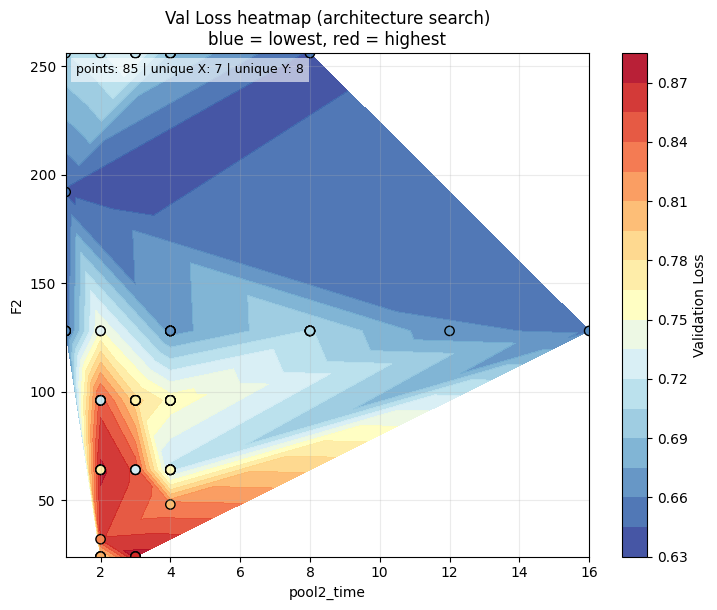

In [33]:
# === Architecture-search heatmap (same data collection + interpolation style) ===
import os, glob, json, re, random
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator

# 1) Fixed training knobs (must match exactly the architecture-search you ran)
FIXED_OPT = {
    "optimization.lr": 1e-4,
    "optimization.epochs": 100,
    "optimization.batch_size": 8,
    "optimization.criterion": "nn.CrossEntropyLoss",
    "optimization.optimizer": "optim.Adam",
    "optimization.grad_clip": 1.0,
}
FIXED_SCHED = {
    "scheduler.name": "torch.optim.lr_scheduler.ReduceLROnPlateau",
    "scheduler.step_mode": "plateau",
    "scheduler.monitor": "val_loss",
    "scheduler.mode": "min",
    "scheduler.factor": 0.5,
    "scheduler.patience": 2,
    "scheduler.min_lr": 1e-6,
    "scheduler.verbose": True,
}
FIXED_ES = {
    "early_stopping.monitor": "val_loss",
    "early_stopping.mode": "min",
    "early_stopping.patience": 5,
    "early_stopping.min_delta": 1e-4,
    "early_stopping.burn_in": 3,
    "early_stopping.cooldown": 3,
    "early_stopping.restore_best": True,
}

# 2) Architecture keys we can plot on axes
ARCH_KEYS = ["F1","F2","D","kernel_length","dropout","pool1_time","pool2_time"]

# Optional: pin the axes; otherwise two random ones are picked
# Example: SELECT = ("F1","F2")
SELECT = None

# 3) Where to look
MODEL_ROOTS = [
    "models/EMGModel",
    "train/models/EMGModel",
    "./models/EMGModel",
    "./train/models/EMGModel",
]
MODEL_ROOT = next((p for p in MODEL_ROOTS if os.path.isdir(p)), None)
if MODEL_ROOT is None:
    raise FileNotFoundError("Could not locate models/EMGModel directory.")

# 4) Helpers
def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def folder_has_loss(folder):
    return "_with_loss_" in os.path.basename(folder)

def get_val_loss_from_name(folder):
    m = re.search(r"_with_loss_([0-9]*\.[0-9]+)", os.path.basename(folder))
    return float(m.group(1)) if m else None

def matches_fixed_train(hp):
    for k, v in FIXED_OPT.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_SCHED.items():
        if hp.get(k) != v: return False
    for k, v in FIXED_ES.items():
        if hp.get(k) != v: return False
    return True

# 5) Collect architecture-search runs
records = []
for folder in sorted(glob.glob(os.path.join(MODEL_ROOT, "*with_loss*"))):
    if not folder_has_loss(folder):
        continue
    hp_path = os.path.join(folder, "hyperparameters.json")
    if not os.path.isfile(hp_path):
        continue
    try:
        hp = load_json(hp_path)
    except Exception:
        continue

    # only runs from your architecture search: fixed opt/sched/ES
    if not matches_fixed_train(hp):
        continue

    # need all architecture keys present
    if any(k not in hp for k in ARCH_KEYS):
        continue

    vloss = hp.get("val_loss", None)
    if vloss is None:
        vloss = get_val_loss_from_name(folder)
    if vloss is None:
        continue

    rec = {"val_loss": float(vloss), "__folder__": folder}
    for k in ARCH_KEYS:
        rec[k] = hp[k]
    records.append(rec)

print(f"Found {len(records)} matching architecture-search runs in {MODEL_ROOT}.")
if len(records) < 3:
    raise RuntimeError("Not enough points to interpolate. Need at least 3 runs.")

# 6) Choose axes
if SELECT is not None:
    x_key, y_key = SELECT
    if x_key not in ARCH_KEYS or y_key not in ARCH_KEYS:
        raise ValueError(f"SELECT must be two of {ARCH_KEYS}")
else:
    x_key, y_key = random.sample(ARCH_KEYS, 2)
print(f"Using axes: X='{x_key}', Y='{y_key}'")

# 7) Prepare data
def to_float(v): return float(v)

x = np.array([to_float(r[x_key]) for r in records], dtype=float)
y = np.array([to_float(r[y_key]) for r in records], dtype=float)
z = np.array([r["val_loss"] for r in records], dtype=float)

# 8) Interpolate via Delaunay triangulation
tri = Triangulation(x, y)
interp = LinearTriInterpolator(tri, z)

nx, ny = 220, 220
xg = np.linspace(x.min(), x.max(), nx)
yg = np.linspace(y.min(), y.max(), ny)
Xg, Yg = np.meshgrid(xg, yg)
Zg = interp(Xg, Yg)

# 9) Plot: blue=lowest, red=highest (RdYlBu_r)
fig, ax = plt.subplots(figsize=(7.4, 6.2))
cont = ax.tricontourf(tri, z, levels=20, cmap="RdYlBu_r", alpha=0.92)
sc = ax.scatter(x, y, c=z, cmap="RdYlBu_r", edgecolor="k", s=45)

ax.set_xlabel(x_key)
ax.set_ylabel(y_key)
ax.set_title("Val Loss heatmap (architecture search)\nblue = lowest, red = highest")

cb = fig.colorbar(cont, ax=ax)
cb.set_label("Validation Loss")

ux, uy = len(np.unique(x)), len(np.unique(y))
ax.text(0.02, 0.98, f"points: {len(z)} | unique X: {ux} | unique Y: {uy}",
        transform=ax.transAxes, va="top", ha="left",
        fontsize=9, bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


In [2]:
# === Random Search (train/scheduler/ES) -> then Optuna refinement (architecture fixed) ===
import os, time, json, copy, gc, random
import numpy as np
import torch

# 0) Imports
try:
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import (
        FloatDistribution, IntDistribution, CategoricalDistribution
    )
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "optuna"])
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import (
        FloatDistribution, IntDistribution, CategoricalDistribution
    )

from networks import EMGModel
from training import train_model

# 1) Fixed architecture (yours)
FIXED_ARCH = {
    "channels": 8,
    "F1": 128,
    "D": 16,
    "F2": 128,
    "kernel_length": 24,
    "dropout": 0.138,
    "pool1_time": 3,
    "pool2_time": 8,   # ensure pooling is valid for your signal length
    "num_classes": 9,
}

# 2) Base hparams template (unchanged parts)
BASE_HP = {
    **FIXED_ARCH,
    "optimization": {
        "lr": 1e-4,
        "epochs": 100,               # leave fixed; ES will stop early
        "batch_size": 8,
        "criterion": "nn.CrossEntropyLoss",
        "optimizer": "optim.Adam",
        "grad_clip": 1.0,
    },
    "scheduler": {
        "name": "torch.optim.lr_scheduler.ReduceLROnPlateau",
        "step_mode": "plateau",
        "monitor": "val_loss",
        "mode": "min",
        "factor": 0.5,
        "patience": 2,
        "min_lr": 1e-6,
        "verbose": True,
    },
    "early_stopping": {
        "monitor": "val_loss",
        "mode": "min",
        "patience": 5,
        "min_delta": 1e-4,
        "burn_in": 3,
        "cooldown": 3,
        "restore_best": True,
    },
}

# 3) Search spaces (only training knobs)
#    Keep the SAME names & types for random search and Optuna seeding/objective.
SPACE = {
    # optimization
    "opt.lr":        ("float_log", 1e-5, 5e-4),                 # log-uniform
    "opt.grad_clip": ("categorical", [0.0, 0.5, 1.0, 2.0, 5.0]),
    # scheduler (ReduceLROnPlateau)
    "sch.factor":    ("float", 0.2, 0.8),
    "sch.patience":  ("int", 1, 6),
    "sch.min_lr":    ("float_log", 1e-7, 1e-4),                 # log-uniform
    # early stopping
    "es.patience":   ("int", 3, 12),
    "es.min_delta":  ("float_log", 1e-5, 5e-4),                 # log-uniform
    "es.burn_in":    ("int", 0, 5),
    "es.cooldown":   ("int", 0, 5),
}

def sample_space(rng: random.Random):
    params = {}
    for k, spec in SPACE.items():
        kind = spec[0]
        if kind == "categorical":
            params[k] = rng.choice(spec[1])
        elif kind == "int":
            lo, hi = spec[1], spec[2]
            params[k] = rng.randint(lo, hi)
        elif kind == "float":
            lo, hi = spec[1], spec[2]
            params[k] = float(rng.uniform(lo, hi))
        elif kind == "float_log":
            lo, hi = spec[1], spec[2]
            # sample log-uniform
            v = 10 ** rng.uniform(np.log10(lo), np.log10(hi))
            params[k] = float(v)
        else:
            raise ValueError(f"Unknown spec kind: {kind}")
    # round a touch for readability
    params["opt.lr"] = float(f"{params['opt.lr']:.8f}")
    params["sch.min_lr"] = float(f"{params['sch.min_lr']:.8f}")
    params["es.min_delta"] = float(f"{params['es.min_delta']:.8f}")
    return params

def apply_train_knobs(hp, params):
    hp = copy.deepcopy(hp)
    hp["optimization"]["lr"]         = float(params["opt.lr"])
    hp["optimization"]["grad_clip"]  = float(params["opt.grad_clip"])
    hp["scheduler"].update({
        "factor":  float(params["sch.factor"]),
        "patience": int(params["sch.patience"]),
        "min_lr":  float(params["sch.min_lr"]),
        "verbose": True,
    })
    hp["early_stopping"].update({
        "patience":  int(params["es.patience"]),
        "min_delta": float(params["es.min_delta"]),
        "burn_in":   int(params["es.burn_in"]),
        "cooldown":  int(params["es.cooldown"]),
        "restore_best": True,
    })
    return hp

def _seed_all(seed: int):
    random.seed(seed); np.random.seed(seed); torch.manual_seed(seed)
    if torch.cuda.is_available(): torch.cuda.manual_seed_all(seed)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Running random search + Optuna on device: {device}")

# 4) RANDOM SEARCH
RS_TRIALS = 1                 # <-- adjust as you like
RS_SEED   = 4242
RESULTS_DIR = "random_search_results"
os.makedirs(RESULTS_DIR, exist_ok=True)
RS_JSONL = os.path.join(RESULTS_DIR, "train_sched_es_search.jsonl")

best_rs = {"val_loss": float("inf"), "params": None}
rows = []

t0 = time.time()
with open(RS_JSONL, "w", encoding="utf-8") as f:
    for t in range(RS_TRIALS):
        _seed_all(RS_SEED + t)
        params = sample_space(random)
        hp = apply_train_knobs(BASE_HP, params)

        model = EMGModel(hp).to(device)
        try:
            train_model(model, train_loader, val_loader, device, hp, plot_losses=False)
            v = float(hp.get("val_loss", float("inf")))
        except Exception as e:
            print(f"[RS] trial {t} failed: {repr(e)}")
            v = float("inf")
        finally:
            del model
            torch.cuda.empty_cache(); gc.collect()

        row = {"trial": t, "val_loss": v, **params}
        rows.append(row)
        f.write(json.dumps(row) + "\n"); f.flush()

        if v < best_rs["val_loss"]:
            best_rs = {"val_loss": v, "params": copy.deepcopy(params)}
            with open(os.path.join(RESULTS_DIR, "best_train_sched_es.json"), "w", encoding="utf-8") as bf:
                json.dump({"val_loss": v, "params": best_rs["params"], "arch": FIXED_ARCH}, bf, indent=2)

t1 = time.time()

rows_sorted = sorted(rows, key=lambda r: r["val_loss"])
print("\n=== Random Search Summary (train/sched/ES) ===")
print(f"Trials: {RS_TRIALS} | Elapsed: {t1 - t0:.1f}s")
print(f"Best RS val_loss: {best_rs['val_loss']:.6f}")
print("Top-5:")
for r in rows_sorted[:5]:
    print(f"  val_loss={r['val_loss']:.6f} | { {k:r[k] for k in r if k not in ('trial','val_loss')} }")
print(f"\nSaved per-trial results to {RS_JSONL}")


c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running random search + Optuna on device: cuda:0
[RS] trial 0 failed: NameError("name 'train_loader' is not defined")

=== Random Search Summary (train/sched/ES) ===
Trials: 1 | Elapsed: 0.7s
Best RS val_loss: inf
Top-5:
  val_loss=inf | {'opt.lr': 0.00029193, 'opt.grad_clip': 2.0, 'sch.factor': 0.2790545703252465, 'sch.patience': 5, 'sch.min_lr': 1.48e-06, 'es.patience': 8, 'es.min_delta': 2.934e-05, 'es.burn_in': 4, 'es.cooldown': 3}

Saved per-trial results to random_search_results\train_sched_es_search.jsonl


In [3]:
# === Optuna refinement (architecture fixed) ===
import os, time, json, copy, gc, random
import numpy as np
import torch

# 0) Imports
try:
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import (
        FloatDistribution, IntDistribution, CategoricalDistribution
    )
except ImportError:
    import sys, subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "optuna"])
    import optuna
    from optuna.trial import create_trial
    from optuna.distributions import (
        FloatDistribution, IntDistribution, CategoricalDistribution
    )

from networks import EMGModel
from training import train_model
# 5) OPTUNA — seed with RS results, then refine with same distributions
SEED = 1337
sampler = optuna.samplers.TPESampler(seed=SEED, multivariate=True, group=True)
study = optuna.create_study(direction="minimize", sampler=sampler)

# Fixed distributions (MUST match objective's suggest_* types)
DIST = {
    "opt.lr":        FloatDistribution(1e-5, 5e-4, log=True),
    "opt.grad_clip": CategoricalDistribution(choices=[0.0, 0.5, 1.0, 2.0, 5.0]),
    "sch.factor":    FloatDistribution(0.2, 0.8),
    "sch.patience":  IntDistribution(1, 6),
    "sch.min_lr":    FloatDistribution(1e-7, 1e-4, log=True),
    "es.patience":   IntDistribution(3, 12),
    "es.min_delta":  FloatDistribution(1e-5, 5e-4, log=True),
    "es.burn_in":    IntDistribution(0, 5),
    "es.cooldown":   IntDistribution(0, 5),
}

# Seed completed trials from RS for TPE prior
for r in rows_sorted:
    params = {k: r[k] for k in DIST.keys()}
    try:
        trial = create_trial(
            state=optuna.trial.TrialState.COMPLETE,
            params=params,
            distributions=DIST,
            value=float(r["val_loss"]),
        )
        study.add_trial(trial)
    except Exception as e:
        # Skip any malformed row
        print(f"[Seed] skipped a row: {e}")

def objective(trial: optuna.trial.Trial):
    # Suggest from the SAME distributions
    p = {
        "opt.lr":        trial.suggest_float("opt.lr", 1e-5, 5e-4, log=True),
        "opt.grad_clip": trial.suggest_categorical("opt.grad_clip", [0.0, 0.5, 1.0, 2.0, 5.0]),
        "sch.factor":    trial.suggest_float("sch.factor", 0.2, 0.8),
        "sch.patience":  trial.suggest_int("sch.patience", 1, 6),
        "sch.min_lr":    trial.suggest_float("sch.min_lr", 1e-7, 1e-4, log=True),
        "es.patience":   trial.suggest_int("es.patience", 3, 12),
        "es.min_delta":  trial.suggest_float("es.min_delta", 1e-5, 5e-4, log=True),
        "es.burn_in":    trial.suggest_int("es.burn_in", 0, 5),
        "es.cooldown":   trial.suggest_int("es.cooldown", 0, 5),
    }
    hp = apply_train_knobs(BASE_HP, p)

    model = EMGModel(hp).to(device)
    try:
        train_model(model, train_loader, val_loader, device, hp, plot_losses=False)
        v = float(hp.get("val_loss", float("inf")))
    except Exception as e:
        print(f"[Optuna] trial {trial.number} failed: {repr(e)}")
        v = float("inf")
    finally:
        del model
        torch.cuda.empty_cache(); gc.collect()

    return v

N_OPTUNA = 25  # refine budget
t2 = time.time()
study.optimize(objective, n_trials=N_OPTUNA, show_progress_bar=True)
t3 = time.time()

print("\n=== Optuna Summary (refinement) ===")
print(f"Seeded trials: {len(rows_sorted)} | New trials run: {N_OPTUNA} | Elapsed: {t3 - t2:.1f}s")
print(f"Best val_loss: {study.best_value:.6f}")
print("Best params:")
for k, v in study.best_trial.params.items():
    print(f"  {k}: {v}")

# Save final best full hparams (arch + best training knobs)
best_params = study.best_trial.params
best_full = apply_train_knobs(BASE_HP, best_params)
os.makedirs(RESULTS_DIR, exist_ok=True)
with open(os.path.join(RESULTS_DIR, "optuna_best_train_sched_es.json"), "w", encoding="utf-8") as f:
    json.dump(best_full, f, indent=2)
print(f"Saved best full hparams to {os.path.join(RESULTS_DIR, 'optuna_best_train_sched_es.json')}")


c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``multivariate`` is an experimental feature. The interface can change in the future.
  warnings.warn(
c:\Users\Marwa\Documents\GitHub\myo-armband-ble\venv\Lib\site-packages\optuna\_experimental.py:32: ExperimentalWarning: Argument ``group`` is an experimental feature. The interface can change in the future.
  warnings.warn(
[I 2025-10-16 02:01:31,906] A new study created in memory with name: no-name-a5f2166d-91e5-40a4-ad03-74cc21ae1ee3


Best trial: 0. Best value: inf:   4%|▍         | 1/25 [00:00<00:03,  6.32it/s]

[Optuna] trial 1 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:32,065] Trial 1 finished with value: inf and parameters: {'opt.lr': 2.7872252214165155e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.3571657553390868, 'sch.patience': 6, 'sch.min_lr': 1.57922371846313e-05, 'es.patience': 4, 'es.min_delta': 4.531789773350584e-05, 'es.burn_in': 3, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 2 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  12%|█▏        | 3/25 [00:00<00:03,  6.15it/s]

[I 2025-10-16 02:01:32,227] Trial 2 finished with value: inf and parameters: {'opt.lr': 0.00046883451667528557, 'opt.grad_clip': 1.0, 'sch.factor': 0.550554876866193, 'sch.patience': 5, 'sch.min_lr': 3.659529195469844e-07, 'es.patience': 5, 'es.min_delta': 0.00013762005794000444, 'es.burn_in': 2, 'es.cooldown': 1}. Best is trial 0 with value: inf.
[Optuna] trial 3 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:32,391] Trial 3 finished with value: inf and parameters: {'opt.lr': 5.03401700967645e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.45524879908671, 'sch.patience': 4, 'sch.min_lr': 3.3994827398492335e-06, 'es.patience': 3, 'es.min_delta': 0.00017503281567115796, 'es.burn_in': 5, 'es.cooldown': 0}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  16%|█▌        | 4/25 [00:00<00:03,  5.99it/s]

[Optuna] trial 4 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:32,572] Trial 4 finished with value: inf and parameters: {'opt.lr': 1.6411515686596946e-05, 'opt.grad_clip': 0.5, 'sch.factor': 0.6736016510144673, 'sch.patience': 3, 'sch.min_lr': 1.2810649798096303e-05, 'es.patience': 7, 'es.min_delta': 0.00044965653185434035, 'es.burn_in': 5, 'es.cooldown': 3}. Best is trial 0 with value: inf.
[Optuna] trial 5 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  24%|██▍       | 6/25 [00:00<00:03,  6.01it/s]

[I 2025-10-16 02:01:32,745] Trial 5 finished with value: inf and parameters: {'opt.lr': 9.101245157939969e-05, 'opt.grad_clip': 0.0, 'sch.factor': 0.7840756396206154, 'sch.patience': 3, 'sch.min_lr': 1.053920652459247e-06, 'es.patience': 10, 'es.min_delta': 1.0435500240236523e-05, 'es.burn_in': 4, 'es.cooldown': 4}. Best is trial 0 with value: inf.
[Optuna] trial 6 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:32,903] Trial 6 finished with value: inf and parameters: {'opt.lr': 2.1064988948628447e-05, 'opt.grad_clip': 0.5, 'sch.factor': 0.6201790520296677, 'sch.patience': 2, 'sch.min_lr': 3.6047566456421225e-06, 'es.patience': 4, 'es.min_delta': 6.235284494564656e-05, 'es.burn_in': 2, 'es.cooldown': 2}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  28%|██▊       | 7/25 [00:01<00:03,  5.96it/s]

[Optuna] trial 7 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:33,073] Trial 7 finished with value: inf and parameters: {'opt.lr': 0.00022154275794547, 'opt.grad_clip': 5.0, 'sch.factor': 0.6277325000947724, 'sch.patience': 6, 'sch.min_lr': 1.8223214491714474e-06, 'es.patience': 7, 'es.min_delta': 0.0003433564402557248, 'es.burn_in': 3, 'es.cooldown': 3}. Best is trial 0 with value: inf.
[Optuna] trial 8 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  36%|███▌      | 9/25 [00:01<00:02,  6.23it/s]

[I 2025-10-16 02:01:33,231] Trial 8 finished with value: inf and parameters: {'opt.lr': 2.5323496243525436e-05, 'opt.grad_clip': 0.0, 'sch.factor': 0.43646816011171596, 'sch.patience': 4, 'sch.min_lr': 2.377984328936541e-07, 'es.patience': 9, 'es.min_delta': 1.1144074210362899e-05, 'es.burn_in': 1, 'es.cooldown': 4}. Best is trial 0 with value: inf.
[Optuna] trial 9 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:33,385] Trial 9 finished with value: inf and parameters: {'opt.lr': 0.0003865399928362752, 'opt.grad_clip': 2.0, 'sch.factor': 0.4341005060836976, 'sch.patience': 5, 'sch.min_lr': 1.1777644321626004e-06, 'es.patience': 3, 'es.min_delta': 3.919052626416137e-05, 'es.burn_in': 2, 'es.cooldown': 0}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  40%|████      | 10/25 [00:01<00:02,  6.18it/s]

[Optuna] trial 10 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:33,546] Trial 10 finished with value: inf and parameters: {'opt.lr': 0.000451478972548216, 'opt.grad_clip': 2.0, 'sch.factor': 0.25349877637029744, 'sch.patience': 4, 'sch.min_lr': 1.3741966414108365e-06, 'es.patience': 5, 'es.min_delta': 5.4696273012265355e-05, 'es.burn_in': 5, 'es.cooldown': 4}. Best is trial 0 with value: inf.
[Optuna] trial 11 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  48%|████▊     | 12/25 [00:01<00:02,  6.50it/s]

[I 2025-10-16 02:01:33,700] Trial 11 finished with value: inf and parameters: {'opt.lr': 0.00011026593313774058, 'opt.grad_clip': 5.0, 'sch.factor': 0.5808164901975994, 'sch.patience': 5, 'sch.min_lr': 4.1348535788705216e-05, 'es.patience': 6, 'es.min_delta': 2.7790750487959216e-05, 'es.burn_in': 3, 'es.cooldown': 1}. Best is trial 0 with value: inf.
[Optuna] trial 12 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:33,844] Trial 12 finished with value: inf and parameters: {'opt.lr': 5.4280881329053684e-05, 'opt.grad_clip': 1.0, 'sch.factor': 0.25493321352185294, 'sch.patience': 6, 'sch.min_lr': 2.2293706444229596e-06, 'es.patience': 5, 'es.min_delta': 1.9267261983461343e-05, 'es.burn_in': 3, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 13 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  56%|█████▌    | 14/25 [00:02<00:01,  6.60it/s]

[I 2025-10-16 02:01:33,971] Trial 13 finished with value: inf and parameters: {'opt.lr': 0.0002708976296868538, 'opt.grad_clip': 2.0, 'sch.factor': 0.28002111817928177, 'sch.patience': 5, 'sch.min_lr': 1.6612782155505171e-06, 'es.patience': 10, 'es.min_delta': 9.418203882679096e-05, 'es.burn_in': 2, 'es.cooldown': 3}. Best is trial 0 with value: inf.
[Optuna] trial 14 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:34,138] Trial 14 finished with value: inf and parameters: {'opt.lr': 4.8252736572331304e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.32486612260434544, 'sch.patience': 6, 'sch.min_lr': 2.1082767346766117e-05, 'es.patience': 3, 'es.min_delta': 0.00031636545841353856, 'es.burn_in': 2, 'es.cooldown': 1}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  60%|██████    | 15/25 [00:02<00:01,  6.53it/s]

[Optuna] trial 15 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:34,298] Trial 15 finished with value: inf and parameters: {'opt.lr': 0.0003967579395257126, 'opt.grad_clip': 2.0, 'sch.factor': 0.33499943437239205, 'sch.patience': 4, 'sch.min_lr': 2.2282407132873384e-06, 'es.patience': 10, 'es.min_delta': 1.7439675610684267e-05, 'es.burn_in': 4, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 16 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  68%|██████▊   | 17/25 [00:02<00:01,  6.33it/s]

[I 2025-10-16 02:01:34,456] Trial 16 finished with value: inf and parameters: {'opt.lr': 1.6067337574789076e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.32661653090557313, 'sch.patience': 4, 'sch.min_lr': 2.5911785283125357e-05, 'es.patience': 4, 'es.min_delta': 1.5205416239420395e-05, 'es.burn_in': 4, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 17 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:34,620] Trial 17 finished with value: inf and parameters: {'opt.lr': 9.144608839908369e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.24393057745848845, 'sch.patience': 5, 'sch.min_lr': 1.0100262543864336e-05, 'es.patience': 9, 'es.min_delta': 7.166317918656353e-05, 'es.burn_in': 4, 'es.cooldown': 2}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  72%|███████▏  | 18/25 [00:02<00:01,  6.26it/s]

[Optuna] trial 18 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:34,782] Trial 18 finished with value: inf and parameters: {'opt.lr': 1.1668120189690109e-05, 'opt.grad_clip': 0.5, 'sch.factor': 0.20188382898373547, 'sch.patience': 6, 'sch.min_lr': 1.2973740091796168e-05, 'es.patience': 6, 'es.min_delta': 0.00015064976543827894, 'es.burn_in': 5, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 19 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  80%|████████  | 20/25 [00:03<00:00,  6.31it/s]

[I 2025-10-16 02:01:34,928] Trial 19 finished with value: inf and parameters: {'opt.lr': 4.434201989885787e-05, 'opt.grad_clip': 2.0, 'sch.factor': 0.38479551816762886, 'sch.patience': 4, 'sch.min_lr': 1.5013810563322361e-05, 'es.patience': 3, 'es.min_delta': 4.320908720452888e-05, 'es.burn_in': 0, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 20 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:35,093] Trial 20 finished with value: inf and parameters: {'opt.lr': 2.322452154236042e-05, 'opt.grad_clip': 5.0, 'sch.factor': 0.5493084286859179, 'sch.patience': 6, 'sch.min_lr': 6.805178586835697e-07, 'es.patience': 4, 'es.min_delta': 3.242918296524858e-05, 'es.burn_in': 2, 'es.cooldown': 1}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  84%|████████▍ | 21/25 [00:03<00:00,  6.27it/s]

[Optuna] trial 21 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:35,254] Trial 21 finished with value: inf and parameters: {'opt.lr': 0.00013884632101911941, 'opt.grad_clip': 1.0, 'sch.factor': 0.5584926403960818, 'sch.patience': 5, 'sch.min_lr': 1.9010761061451678e-07, 'es.patience': 4, 'es.min_delta': 0.00012624420659493587, 'es.burn_in': 2, 'es.cooldown': 0}. Best is trial 0 with value: inf.
[Optuna] trial 22 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf:  92%|█████████▏| 23/25 [00:03<00:00,  6.19it/s]

[I 2025-10-16 02:01:35,409] Trial 22 finished with value: inf and parameters: {'opt.lr': 0.00036561990372425485, 'opt.grad_clip': 0.0, 'sch.factor': 0.3972304445985058, 'sch.patience': 6, 'sch.min_lr': 7.032060933728353e-07, 'es.patience': 6, 'es.min_delta': 1.0462517601659163e-05, 'es.burn_in': 4, 'es.cooldown': 2}. Best is trial 0 with value: inf.
[Optuna] trial 23 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:35,579] Trial 23 finished with value: inf and parameters: {'opt.lr': 0.0004291107396676146, 'opt.grad_clip': 1.0, 'sch.factor': 0.5391673200811975, 'sch.patience': 6, 'sch.min_lr': 2.445673624520536e-07, 'es.patience': 4, 'es.min_delta': 0.00026768826862579536, 'es.burn_in': 1, 'es.cooldown': 3}. Best is trial 0 with value: inf.


Best trial: 0. Best value: inf:  96%|█████████▌| 24/25 [00:03<00:00,  6.18it/s]

[Optuna] trial 24 failed: NameError("name 'train_loader' is not defined")
[I 2025-10-16 02:01:35,741] Trial 24 finished with value: inf and parameters: {'opt.lr': 0.00019781937908591076, 'opt.grad_clip': 0.5, 'sch.factor': 0.3647513034031892, 'sch.patience': 5, 'sch.min_lr': 5.584610560799796e-07, 'es.patience': 12, 'es.min_delta': 3.40272748093462e-05, 'es.burn_in': 4, 'es.cooldown': 3}. Best is trial 0 with value: inf.
[Optuna] trial 25 failed: NameError("name 'train_loader' is not defined")


Best trial: 0. Best value: inf: 100%|██████████| 25/25 [00:03<00:00,  6.27it/s]

[I 2025-10-16 02:01:35,897] Trial 25 finished with value: inf and parameters: {'opt.lr': 0.0004726039553074136, 'opt.grad_clip': 1.0, 'sch.factor': 0.5886333244856538, 'sch.patience': 4, 'sch.min_lr': 4.504901571767939e-07, 'es.patience': 9, 'es.min_delta': 0.00018165015240696633, 'es.burn_in': 2, 'es.cooldown': 0}. Best is trial 0 with value: inf.

=== Optuna Summary (refinement) ===
Seeded trials: 1 | New trials run: 25 | Elapsed: 4.0s
Best val_loss: inf
Best params:
  opt.lr: 0.00029193
  opt.grad_clip: 2.0
  sch.factor: 0.2790545703252465
  sch.patience: 5
  sch.min_lr: 1.48e-06
  es.patience: 8
  es.min_delta: 2.934e-05
  es.burn_in: 4
  es.cooldown: 3
Saved best full hparams to random_search_results\optuna_best_train_sched_es.json


Found 41 matching runs with fixed architecture in models/EMGModel.
Using axes: X='early_stopping.cooldown', Y='early_stopping.min_delta'


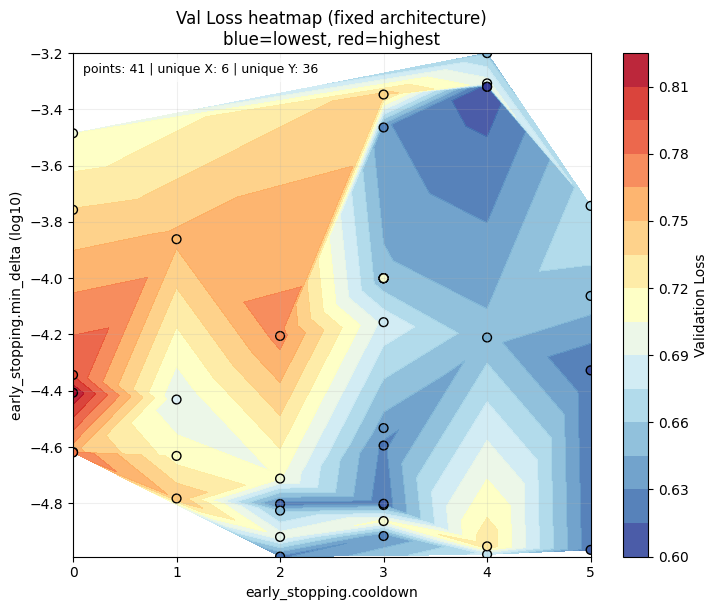

In [69]:
# === Heatmap over two *training* hyperparams (architecture fixed), with interpolation ===
import os, glob, json, re, random, math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.tri import Triangulation, LinearTriInterpolator

# ----- 1) Fixed architecture you specified -----
FIXED_ARCH = {
    "channels": 8,
    "F1": 128,
    "D": 16,
    "F2": 128,
    "kernel_length": 24,
    "dropout": 0.138,  # compare with tolerance
    "pool1_time": 3,
    "pool2_time": 8,
    "num_classes": 9,
}

# ----- 2) Which *training* hyperparams we consider for the axes -----
PARAM_KEYS = [
    "optimization.lr",
    "optimization.grad_clip",
    "scheduler.factor",
    "scheduler.patience",
    "scheduler.min_lr",
    "early_stopping.patience",
    "early_stopping.min_delta",
    "early_stopping.burn_in",
    "early_stopping.cooldown",
]
LOG_SCALE_KEYS = {"optimization.lr", "scheduler.min_lr", "early_stopping.min_delta"}  # transform with log10 for interpolation

# (Optional) Manually fix the two axes. Set to None to random-pick.
# Example: SELECT = ("optimization.lr", "scheduler.factor")
SELECT = None

# ----- 3) Where to look -----
MODEL_ROOTS = [
    "models/EMGModel",
    "train/models/EMGModel",
    "./models/EMGModel",
    "./train/models/EMGModel",
]
MODEL_ROOT = next((p for p in MODEL_ROOTS if os.path.isdir(p)), None)
if MODEL_ROOT is None:
    raise FileNotFoundError("Could not locate models/EMGModel directory.")

# ----- 4) Helpers -----
def load_json(path):
    with open(path, "r", encoding="utf-8") as f:
        return json.load(f)

def folder_has_loss(folder):
    return "_with_loss_" in os.path.basename(folder)

def match_fixed_arch(hp):
    # ints/exact
    if hp.get("channels") != FIXED_ARCH["channels"]: return False
    if hp.get("F1") != FIXED_ARCH["F1"]: return False
    if hp.get("D") != FIXED_ARCH["D"]: return False
    if hp.get("F2") != FIXED_ARCH["F2"]: return False
    if hp.get("kernel_length") != FIXED_ARCH["kernel_length"]: return False
    if hp.get("pool1_time") != FIXED_ARCH["pool1_time"]: return False
    if hp.get("pool2_time") != FIXED_ARCH["pool2_time"]: return False
    if hp.get("num_classes") != FIXED_ARCH["num_classes"]: return False
    # float w/ tolerance (dropout)
    if not np.isclose(hp.get("dropout", np.nan), FIXED_ARCH["dropout"], atol=1e-3):
        return False
    return True

def get_val_loss_from_name(folder):
    m = re.search(r"_with_loss_([0-9]*\.[0-9]+)", os.path.basename(folder))
    return float(m.group(1)) if m else None

# ----- 5) Collect points -----
records = []
for folder in sorted(glob.glob(os.path.join(MODEL_ROOT, "*with_loss*"))):
    if not folder_has_loss(folder):
        continue
    hp_path = os.path.join(folder, "hyperparameters.json")
    if not os.path.isfile(hp_path):
        continue
    try:
        hp = load_json(hp_path)
    except Exception:
        continue

    if not match_fixed_arch(hp):
        continue

    vloss = hp.get("val_loss", None)
    if vloss is None:
        vloss = get_val_loss_from_name(folder)
    if vloss is None:
        continue

    rec = {"val_loss": float(vloss), "__folder__": folder}
    # pull training knobs if present
    for k in PARAM_KEYS:
        if k in hp:
            rec[k] = hp[k]
    records.append(rec)

print(f"Found {len(records)} matching runs with fixed architecture in {MODEL_ROOT}.")

if len(records) < 3:
    raise RuntimeError("Not enough points to interpolate. Need at least 3 runs.")

# ----- 6) Choose axes -----
avail_keys = [k for k in PARAM_KEYS if all(k in r for r in records)]
if SELECT is not None:
    x_key, y_key = SELECT
    if x_key not in avail_keys or y_key not in avail_keys:
        raise ValueError(f"Selected keys not available in all records: {SELECT}. Available: {avail_keys}")
else:
    if len(avail_keys) < 2:
        raise RuntimeError(f"Too few common hyperparams across runs. Common: {avail_keys}")
    x_key, y_key = random.sample(avail_keys, 2)

print(f"Using axes: X='{x_key}', Y='{y_key}'")

# ----- 7) Prepare data (log-transform where appropriate) -----
def to_numeric(key, v):
    if key in LOG_SCALE_KEYS:
        # guard: strictly positive
        v = float(v)
        v = v if v > 0 else 1e-12
        return float(np.log10(v))
    else:
        return float(v)

x = np.array([to_numeric(x_key, r[x_key]) for r in records], dtype=float)
y = np.array([to_numeric(y_key, r[y_key]) for r in records], dtype=float)
z = np.array([r["val_loss"] for r in records], dtype=float)

# ----- 8) Interpolate using triangulation (no SciPy required) -----
tri = Triangulation(x, y)
interp = LinearTriInterpolator(tri, z)

# create grid over the convex hull
nx, ny = 200, 200
xg = np.linspace(x.min(), x.max(), nx)
yg = np.linspace(y.min(), y.max(), ny)
Xg, Yg = np.meshgrid(xg, yg)
Zg = interp(Xg, Yg)

# ----- 9) Plot -----
fig, ax = plt.subplots(figsize=(7.4, 6.2))

# Filled contour with interpolation; colormap: blue(low) -> red(high)
# RdYlBu_r gives blue for low, red for high.
c = ax.tricontourf(tri, z, levels=18, cmap="RdYlBu_r", alpha=0.9)

# Overlay original samples
sc = ax.scatter(x, y, c=z, cmap="RdYlBu_r", edgecolor="k", s=40)

# Axis labels (show if log-transform was applied)
def label_for_axis(key):
    if key in LOG_SCALE_KEYS:
        return f"{key} (log10)"
    return key

ax.set_xlabel(label_for_axis(x_key))
ax.set_ylabel(label_for_axis(y_key))
ax.set_title("Val Loss heatmap (fixed architecture)\nblue=lowest, red=highest")

cb = fig.colorbar(c, ax=ax)
cb.set_label("Validation Loss")

# Optionally show unique counts per axis as a hint of coverage
ux = len(np.unique(x))
uy = len(np.unique(y))
ax.text(0.02, 0.98, f"points: {len(z)} | unique X: {ux} | unique Y: {uy}",
        transform=ax.transAxes, va="top", ha="left",
        fontsize=9, bbox=dict(facecolor="white", alpha=0.6, edgecolor="none"))

ax.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()


In [6]:
import os, json, torch
from networks import EMGModel  # your class

RUN_DIR = r"C:\Users\Marwa\Documents\GitHub\myo-armband-ble\train\models\EMGModel\2025-10-16_08-58-00_with_loss_0.5539"
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# unflatten the dotted keys in hyperparameters.json
def undot(d):
    out = {}
    for k, v in d.items():
        cur = out
        parts = k.split(".")
        for p in parts[:-1]:
            cur = cur.setdefault(p, {})
        cur[parts[-1]] = v
    return out

with open(os.path.join(RUN_DIR, "hyperparameters.json"), "r", encoding="utf-8") as f:
    hp = undot(json.load(f))

model = EMGModel(hp).to(device)

ckpt = torch.load(os.path.join(RUN_DIR, "best_model_state.pth"), map_location=device)
model.load_state_dict(ckpt["model_state_dict"])
model.eval()

print("Loaded best snapshot. val_loss:", ckpt.get("val_loss"))


Loaded best snapshot. val_loss: 0.5538924549821604


In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import math

class TemperatureScaledModel(nn.Module):
    """Wraps a trained model with temperature scaling (keeps original frozen)."""
    def __init__(self, base_model, init_log_t=0.0, min_t=1.0):
        super().__init__()
        self.model = base_model.eval()
        for p in self.model.parameters():
            p.requires_grad = False
        self.log_t = nn.Parameter(torch.tensor([init_log_t], dtype=torch.float32))
        self.min_t = float(min_t)

    # In TemperatureScaledModel.effective_T():
    def effective_T(self):
        return self.min_t + F.softplus(self.log_t)   # ✅ guarantees T ≥ min_t


    def forward(self, x):
        logits = self.model(x)
        return logits / self.effective_T()

def _softplus_inv(y: float) -> float:
    # inverse of softplus for y>0: x = log(exp(y) - 1)
    # numerically stable for large y
    return float(math.log(math.expm1(y)))

def calibrate_model(model, val_loader, device="cuda"):
    """
    Fit temperature T on validation logits by minimizing NLL (CrossEntropy).
    Returns a new TemperatureScaledModel without modifying `model`.
    """
    device = torch.device(device)
    model = model.to(device).eval()

    # 1) Collect logits & labels once
    logits_list, labels_list = [], []
    with torch.no_grad():
        for batch in val_loader:
            # adapt keys to your dataset
            x = batch["signal"].to(device, non_blocking=True)
            y = batch["label"].to(device, non_blocking=True).long()
            logits_list.append(model(x))
            labels_list.append(y)
    logits = torch.cat(logits_list, dim=0)  # (N, C)
    labels = torch.cat(labels_list, dim=0)  # (N,)

    # 2) Optimize temperature on cached logits (no CNN forward during fitting)
    MIN_T = 1.0  # set to 1e-6 if you don't want to force softening
    log_T = nn.Parameter(torch.zeros(1, device=device))  # T = softplus(log_T) + (MIN_T-1)
    criterion = nn.CrossEntropyLoss()

    def temperature():
        return MIN_T + F.softplus(log_T)             # ✅ guarantees T ≥ MIN_T

    optimizer = optim.LBFGS([log_T], lr=0.01, max_iter=50, line_search_fn="strong_wolfe")

    def closure():
        optimizer.zero_grad(set_to_none=True)
        T = temperature()
        loss = criterion(logits / T, labels)
        loss.backward()
        return loss

    optimizer.step(closure)
    T_star = float(temperature().detach().cpu())
    print(f"Optimal temperature (constrained T≥{MIN_T}): {T_star:.4f}")

    # 3) Instantiate wrapper so effective_T() == T_star
    #    softplus(log_t_init) + (MIN_T-1) = T_star  ->  softplus(log_t_init) = T_star - (MIN_T-1)
    target = max(T_star - MIN_T, 1e-12)              # ✅ invert: softplus(log_t) = T_star - MIN_T
    init_log_t = _softplus_inv(target)
    calibrated = TemperatureScaledModel(model, init_log_t=init_log_t, min_t=MIN_T).to(device).eval()
    return calibrated

# usage
device = "cuda" if torch.cuda.is_available() else "cpu"
calibrated_model = calibrate_model(model, val_loader, device)

# inference:
with torch.no_grad():
    for batch in val_loader:
        x = batch["signal"].to(device)
        logits_cal = calibrated_model(x)
        probs_cal = F.softmax(logits_cal, dim=1)


Optimal temperature (constrained T≥1.0): 1.0023


Overall accuracy: 81.19%
Avg confidence (overall):   0.791
Avg confidence (correct):   0.831
Avg confidence (incorrect): 0.619

Per-class accuracy (%) and avg confidence:
   0 rest                   acc= 94.57  conf=0.777
   1 mild extension         acc= 71.47  conf=0.663
   2 full extension         acc= 90.26  conf=0.860
   3 mild flexion           acc= 97.39  conf=0.879
   4 full flexion           acc= 98.68  conf=0.981
   5 mild radial flexion    acc= 36.36  conf=0.615
   6 full radial flexion    acc= 64.62  conf=0.727
   7 mild ulnar flexion     acc= 75.40  conf=0.697
   8 full ulnar flexion     acc= 80.89  conf=0.808

Classification report:
                     precision    recall  f1-score   support

               rest      0.754     0.946     0.839       479
     mild extension      0.708     0.715     0.712       340
     full extension      0.907     0.903     0.905       390
       mild flexion      0.757     0.974     0.852       460
       full flexion      1.000     0.987

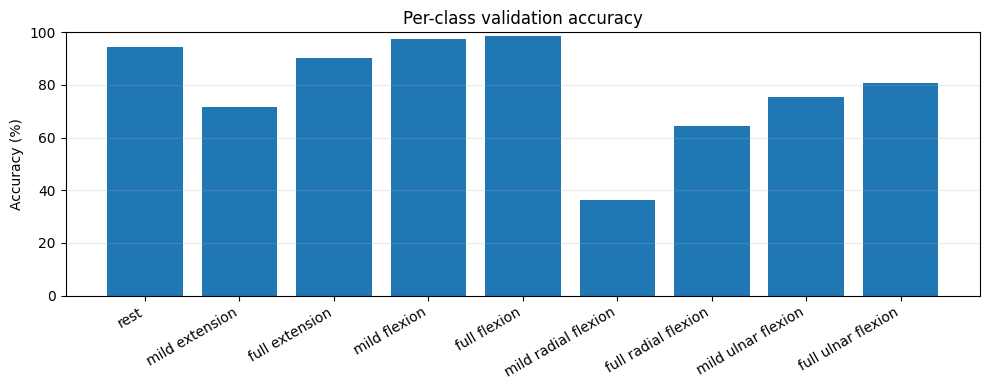

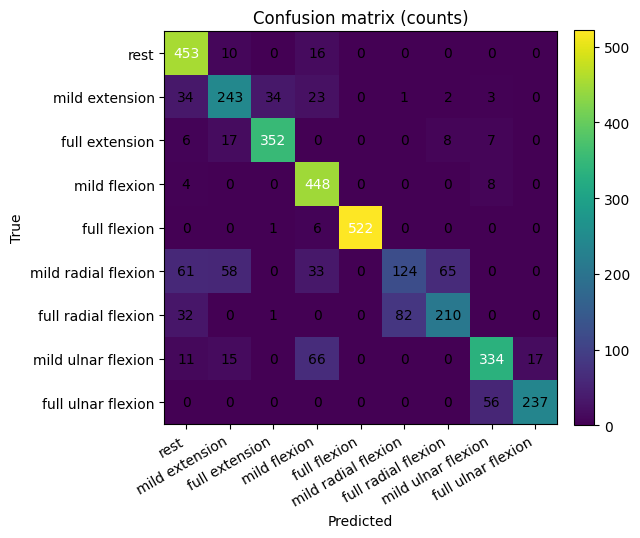

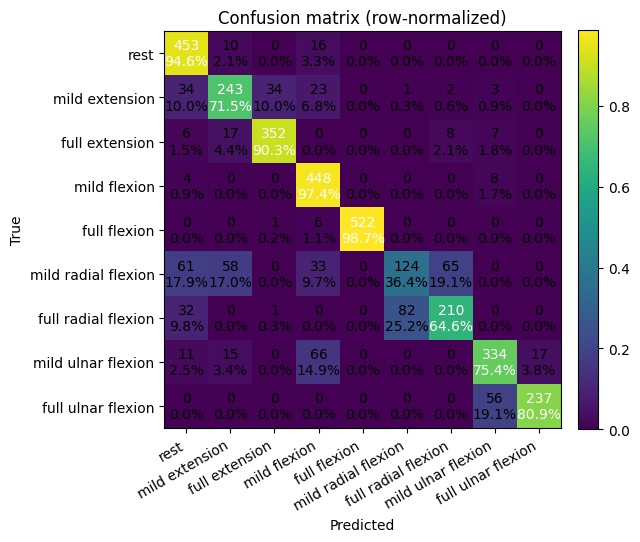

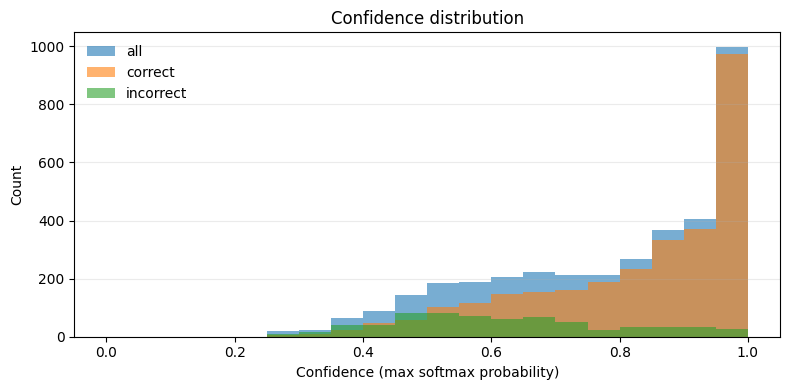


ECE (10 bins): 0.0309


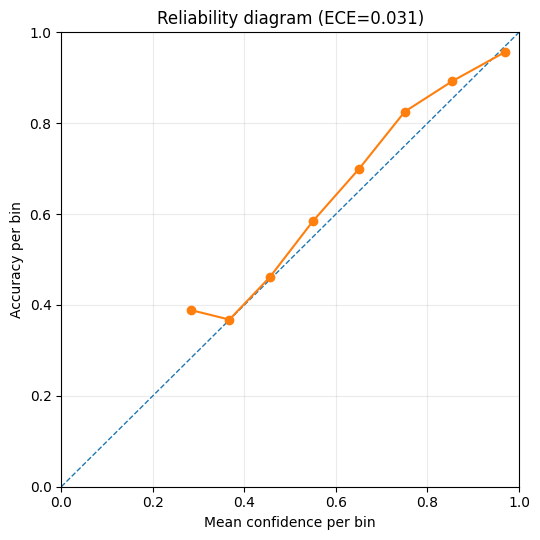

In [ ]:
# JUPYTER CELL — Validation metrics with confidence & uncertainty (MSP)

import numpy as np
import torch
import matplotlib.pyplot as plt


def plot_cm_with_percentages(cm, class_names, title="Confusion Matrix", normalize="row",
                             annotate="count+pct", fmt_pct="{:.1f}%", cmap="Blues"):
    """
    cm:           2D ndarray of counts (true rows x predicted cols)
    class_names:  list of names for axes ticks
    normalize:    None | "row" | "col" | "all"   -> how to compute percentages
    annotate:     "count+pct" | "pct" | "count"
    fmt_pct:      format for percentages (e.g., "{:.1f}%")
    """
    cm = np.asarray(cm)
    assert cm.ndim == 2 and cm.shape[0] == cm.shape[1], "cm must be square"
    K = cm.shape[0]

    # --- compute percentages ---
    if normalize is None:
        pct = cm.astype(float)
        denom = 1.0
    elif normalize == "row":
        denom = cm.sum(axis=1, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "col":
        denom = cm.sum(axis=0, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "all":
        denom = cm.sum().clip(min=1)
        pct = (cm / denom) * 100.0
    else:
        raise ValueError("normalize must be None | 'row' | 'col' | 'all'")

    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K))
    ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)

    # dynamic text color for contrast
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0.5

    for i in range(K):
        for j in range(K):
            txts = []
            if annotate in ("count", "count+pct"):
                txts.append(f"{cm[i, j]}")
            if annotate in ("pct", "count+pct"):
                txts.append(fmt_pct.format(pct[i, j]))
            s = "\n".join(txts)

            ax.text(j, i, s,
                    ha="center", va="center", fontsize=8,
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return fig, ax


try:
    from sklearn.metrics import confusion_matrix, classification_report
except Exception as e:
    raise ImportError("This cell requires scikit-learn. Please install scikit-learn.") from e

# ---- Config / names ----
num_classes = 9
class_names = [LABELS[k].replace("_", " ") if 'LABELS' in globals() else str(k) for k in range(num_classes)]

# ---- Collect logits & labels on validation set ----
#model = calibrated_model  # use calibrated model from previous cell
model.eval()
all_logits = []
all_targets = []

with torch.no_grad():
    for batch in val_loader:
        if isinstance(batch, (list, tuple)):
            x, y = batch[0], batch[1]
        else:
            x, y = batch["signal"], batch["label"]

        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        out = model(x)                # (B, num_classes)
        all_logits.append(out.detach().cpu())
        all_targets.append(y.detach().cpu())

logits_t = torch.cat(all_logits, dim=0)          # torch tensor (N, C)
targets   = torch.cat(all_targets, dim=0).numpy()  # np array (N,)
logits    = logits_t.numpy()
preds     = logits.argmax(axis=1)

# ---- Confidence & Uncertainty (MSP) ----
probs_t = torch.softmax(logits_t, dim=1)         # (N, C)
probs   = probs_t.numpy()
conf    = probs.max(axis=1)                      # confidence in [0,1]
uncert  = 1.0 - conf                             # simple uncertainty proxy
correct = (preds == targets)

avg_conf_overall   = float(conf.mean())
avg_conf_correct   = float(conf[correct].mean()) if correct.any() else np.nan
avg_conf_incorrect = float(conf[~correct].mean()) if (~correct).any() else np.nan

# Per-class average confidence (on samples of that true class)
per_class_conf = []
for c in range(num_classes):
    m = (targets == c)
    per_class_conf.append(float(conf[m].mean()) if m.any() else np.nan)

# ---- Metrics ----
overall_acc = float((preds == targets).mean())

per_class_acc = []
for c in range(num_classes):
    m = (targets == c)
    per_class_acc.append(float((preds[m] == targets[m]).mean()) if m.any() else np.nan)

cm = confusion_matrix(targets, preds, labels=list(range(num_classes)))
cm_norm = cm.astype(float) / np.maximum(cm.sum(axis=1, keepdims=True), 1)

# ---- Print summary ----
print(f"Overall accuracy: {overall_acc*100:.2f}%")
print(f"Avg confidence (overall):   {avg_conf_overall:.3f}")
print(f"Avg confidence (correct):   {avg_conf_correct:.3f}")
print(f"Avg confidence (incorrect): {avg_conf_incorrect:.3f}\n")

print("Per-class accuracy (%) and avg confidence:")
for i, (acc, ac) in enumerate(zip(per_class_acc, per_class_conf)):
    name = class_names[i]
    acc_str = f"{acc*100:6.2f}" if np.isfinite(acc) else "   —  "
    conf_str = f"{ac:5.3f}" if np.isfinite(ac) else "  —  "
    print(f"  {i:>2} {name:<22} acc={acc_str}  conf={conf_str}")

print("\nClassification report:")
print(classification_report(targets, preds, target_names=class_names, labels=list(range(num_classes)), digits=3))

# ---- Plot: Per-class accuracy ----
fig, ax = plt.subplots(figsize=(10, 4))
vals = [0.0 if not np.isfinite(a) else a*100.0 for a in per_class_acc]
ax.bar(np.arange(num_classes), vals)
ax.set_xticks(np.arange(num_classes))
ax.set_xticklabels(class_names, rotation=30, ha='right')
ax.set_ylim(0, 100)
ax.set_ylabel("Accuracy (%)")
ax.set_title("Per-class validation accuracy")
ax.grid(axis='y', alpha=0.25)
plt.tight_layout()
plt.show()

# ---- Plot: Confusion matrices ----
fig, ax = plt.subplots(figsize=(6.5, 6))
im = ax.imshow(cm)
ax.set_title("Confusion matrix (counts)")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks(np.arange(num_classes)); ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels(class_names, rotation=30, ha='right'); ax.set_yticklabels(class_names)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# --- annotate counts ---
thresh = cm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        ax.text(j, i, f"{cm[i, j]:d}",
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

plt.tight_layout(); plt.show()

fig, ax = plt.subplots(figsize=(6.5, 6))
im = ax.imshow(cm_norm)
ax.set_title("Confusion matrix (row-normalized)")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks(np.arange(num_classes)); ax.set_yticks(np.arange(num_classes))
ax.set_xticklabels(class_names, rotation=30, ha='right'); ax.set_yticklabels(class_names)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# --- annotate percentages (and optionally counts) ---
# choose one of the two label lines below:
show_counts = True  # set False to hide counts

thresh = cm_norm.max() / 2.0
for i in range(num_classes):
    for j in range(num_classes):
        pct = f"{100*cm_norm[i, j]:.1f}%"
        label = f"{cm[i,j]:d}\n{pct}" if show_counts else pct  # <-- counts + percent
        ax.text(j, i, label, ha="center", va="center",
                color="white" if cm_norm[i, j] > thresh else "black")

plt.tight_layout(); plt.show()

# ---- Plot: Confidence histogram (overall + split by correct/incorrect) ----
fig, ax = plt.subplots(figsize=(8, 4))
bins = np.linspace(0, 1, 21)
ax.hist(conf, bins=bins, alpha=0.6, label="all")
ax.hist(conf[correct], bins=bins, alpha=0.6, label="correct")
ax.hist(conf[~correct], bins=bins, alpha=0.6, label="incorrect")
ax.set_xlabel("Confidence (max softmax probability)")
ax.set_ylabel("Count")
ax.set_title("Confidence distribution")
ax.grid(axis='y', alpha=0.25)
ax.legend(frameon=False)
plt.tight_layout()
plt.show()

# ---- Reliability diagram + ECE ----
def reliability_bins(confidence, correctness, n_bins=10):
    edges = np.linspace(0.0, 1.0, n_bins+1)
    mids  = 0.5 * (edges[:-1] + edges[1:])
    bin_acc, bin_conf, bin_frac = [], [], []
    N = len(confidence)
    for i in range(n_bins):
        m = (confidence >= edges[i]) & (confidence < edges[i+1]) if i < n_bins-1 else (confidence >= edges[i]) & (confidence <= edges[i+1])
        if m.any():
            bin_acc.append(correctness[m].mean())
            bin_conf.append(confidence[m].mean())
            bin_frac.append(m.mean())
        else:
            bin_acc.append(np.nan)
            bin_conf.append(np.nan)
            bin_frac.append(0.0)
    return mids, np.array(bin_acc), np.array(bin_conf), np.array(bin_frac)

mids, bacc, bconf, bfrac = reliability_bins(conf, correct.astype(float), n_bins=10)

# Expected Calibration Error (ECE)
ece = np.nansum(np.abs(bacc - bconf) * bfrac)
print(f"\nECE (10 bins): {ece:.4f}")

# Plot reliability diagram
fig, ax = plt.subplots(figsize=(5.5, 5.5))
ax.plot([0,1],[0,1], linestyle='--', linewidth=1)      # perfect calibration line
ax.plot(bconf, bacc, marker='o')
ax.set_xlim(0,1); ax.set_ylim(0,1)
ax.set_xlabel("Mean confidence per bin")
ax.set_ylabel("Accuracy per bin")
ax.set_title(f"Reliability diagram (ECE={ece:.3f})")
ax.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


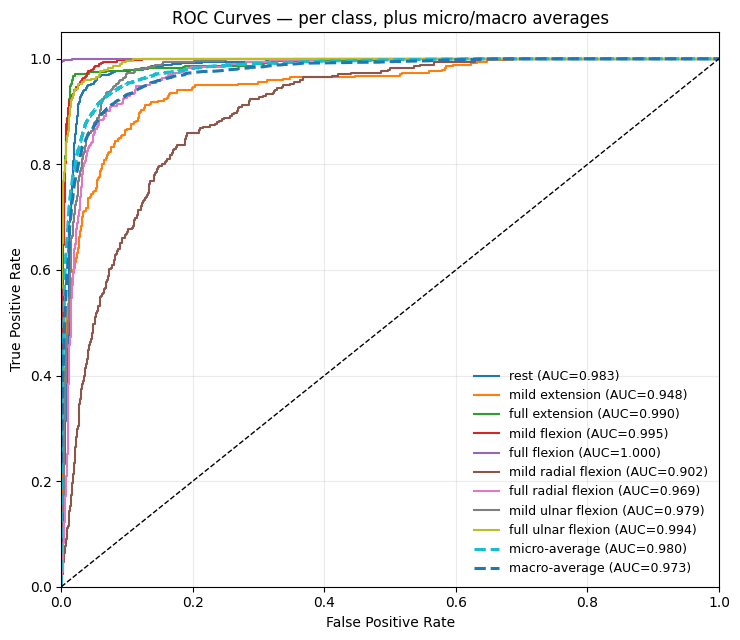

In [9]:
# JUPYTER CELL — ROC curves with per-class AUC + micro/macro averages

import numpy as np
import torch
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# --- Ensure we have probabilities and targets from the val set ---
if "probs_t" not in globals() or "targets" not in globals():
    model.eval()
    all_logits, all_targets = [], []
    with torch.no_grad():
        for batch in val_loader:
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["x"], batch["y"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)  # (B, num_classes)
            all_logits.append(out.detach().cpu())
            all_targets.append(y.detach().cpu())
    logits_t = torch.cat(all_logits, dim=0)
    probs_t  = torch.softmax(logits_t, dim=1)
    targets  = torch.cat(all_targets, dim=0).numpy()

probs = probs_t.numpy()
y_true_bin = label_binarize(targets, classes=list(range(probs.shape[1])))

# --- Compute ROC for each class ---
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = probs.shape[1]

for c in range(n_classes):
    fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], probs[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# --- Micro-average ROC (treat every element of the label indicator matrix as a binary prediction) ---
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), probs.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# --- Macro-average ROC (average the interpolated TPRs) ---
# 1) Aggregate all FPRs
all_fpr = np.unique(np.concatenate([fpr[c] for c in range(n_classes)]))
# 2) Interpolate all ROC curves at these points
mean_tpr = np.zeros_like(all_fpr)
for c in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
# 3) Average it and compute AUC
mean_tpr /= n_classes
fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# --- Plot: all per-class ROCs + macro & micro averages ---
plt.figure(figsize=(7.5, 6.5))

# Per-class
for c in range(n_classes):
    label = class_names[c] if 'class_names' in globals() and len(class_names) == n_classes else f"Class {c}"
    plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{label} (AUC={roc_auc[c]:.3f})")

# Averages
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.2, label=f"micro-average (AUC={roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.2, label=f"macro-average (AUC={roc_auc['macro']:.3f})")

# Chance line
plt.plot([0, 1], [0, 1], 'k--', lw=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves — per class, plus micro/macro averages")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False, fontsize=9, ncol=1, loc="lower right")
plt.tight_layout()
plt.show()


Overall accuracy (with fallback + merges): 0.8239

Per-class precision/recall/F1:
                precision    recall  f1-score   support

          rest      0.478     0.971     0.640       479
mild_extension      0.859     0.518     0.646       340
full_extension      0.931     0.836     0.881       390
  mild_flexion      0.874     0.937     0.905       460
  full_flexion      1.000     0.981     0.990       529
radial_flexion      0.980     0.676     0.800       666
 ulnar_flexion      0.997     0.814     0.896       736

      accuracy                          0.824      3600
     macro avg      0.874     0.819     0.823      3600
  weighted avg      0.889     0.824     0.834      3600



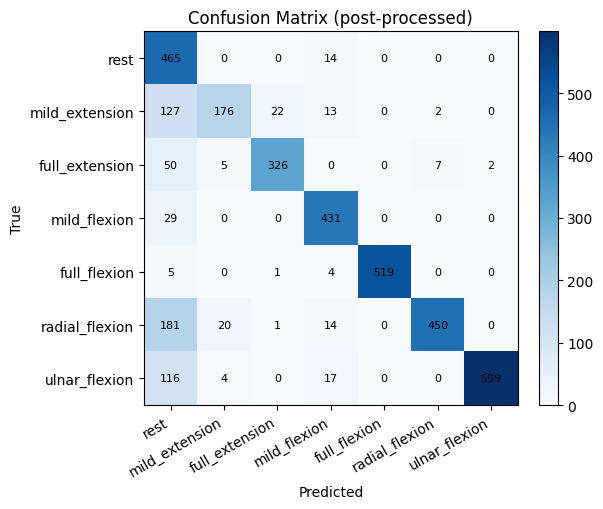

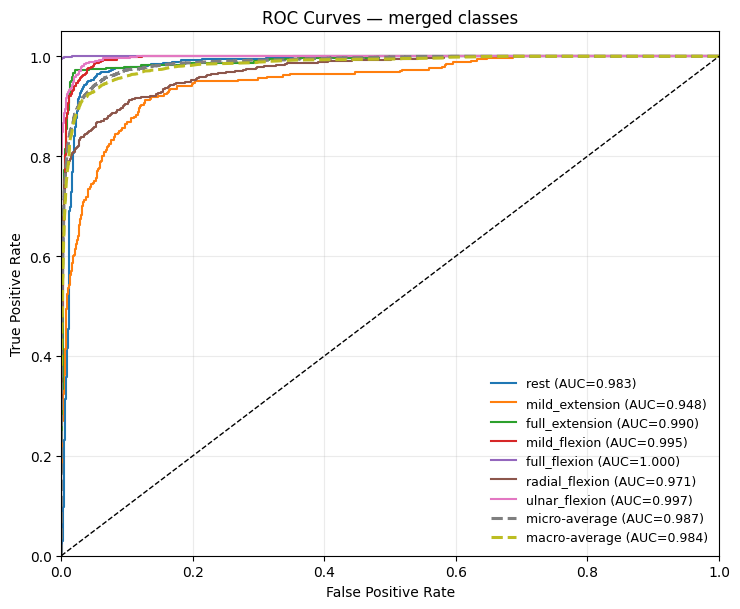

Expected Calibration Error (ECE): 0.0771


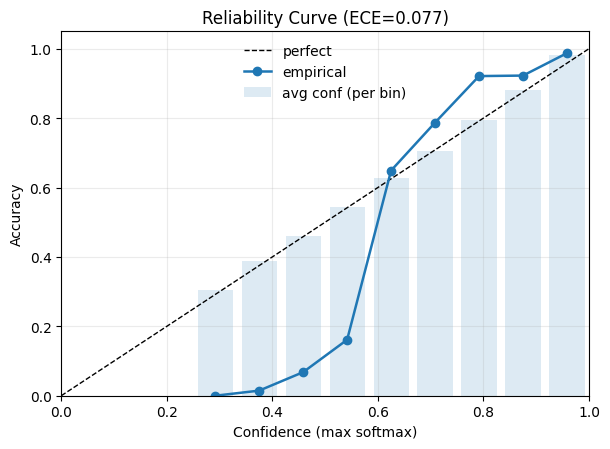

In [10]:
# JUPYTER CELL — Post-process with fallback + class merges, then recompute metrics/plots

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc
)
from sklearn.preprocessing import label_binarize

# -----------------------------
# 0) Get probs/targets if needed
# -----------------------------
if "probs_t" not in globals() or "targets" not in globals():
    model.eval()
    all_logits, all_targets = [], []
    with torch.no_grad():
        for batch in val_loader:
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["x"], batch["y"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)  # (B, num_classes=9)
            all_logits.append(out.detach().cpu())
            all_targets.append(y.detach().cpu())
    logits_t = torch.cat(all_logits, dim=0)
    probs_t  = torch.softmax(logits_t, dim=1)
    targets  = torch.cat(all_targets, dim=0).numpy()

probs_old = probs_t.numpy()  # (N, 9) for original classes 0..8

# Optional: original class names fallback
if "class_names" not in globals() or len(class_names) != probs_old.shape[1]:
    class_names = [
        "rest",
        "mild_extension", "full_extension",
        "mild_flexion", "full_flexion",
        "mild_radial_flexion", "full_radial_flexion",
        "mild_ulnar_flexion",  "full_ulnar_flexion",
    ]

# ------------------------------------------
# 1) Merge classes: (5,6)->radial, (7,8)->ulnar
# New classes = 7:
#   0: rest
#   1: mild_extension
#   2: full_extension
#   3: mild_flexion
#   4: full_flexion
#   5: radial_flexion      (5+6)
#   6: ulnar_flexion       (7+8)
# ------------------------------------------
def merge_classes_probs(probs_9):
    out = np.zeros((probs_9.shape[0], 7), dtype=np.float32)
    out[:, 0] = probs_9[:, 0]                # rest
    out[:, 1] = probs_9[:, 1]                # mild_extension
    out[:, 2] = probs_9[:, 2]                # full_extension
    out[:, 3] = probs_9[:, 3]                # mild_flexion
    out[:, 4] = probs_9[:, 4]                # full_flexion
    out[:, 5] = probs_9[:, 5] + probs_9[:, 6]  # radial = mild+full
    out[:, 6] = probs_9[:, 7] + probs_9[:, 8]  # ulnar  = mild+full
    # Sum still equals 1.0 (we just grouped columns), so no renorm needed.
    return out

def merge_labels_9_to_7(y9):
    y7 = y9.copy()
    y7 = np.where(y7 == 6, 5, y7)  # full_radial -> radial(5)
    y7 = np.where(y7 == 5, 5, y7)  # mild_radial -> radial(5)
    y7 = np.where(y7 == 8, 6, y7)  # full_ulnar  -> ulnar(6)
    y7 = np.where(y7 == 7, 6, y7)  # mild_ulnar  -> ulnar(6)
    # keep 0..4 as is
    return y7

probs_7 = merge_classes_probs(probs_old)
targets_7 = merge_labels_9_to_7(targets)

new_class_names = [
    "rest",
    "mild_extension", "full_extension",
    "mild_flexion", "full_flexion",
    "radial_flexion", "ulnar_flexion"
]
num_new = 7

# ----------------------------------------------------------
# 2) Confidence fallback: if max_prob < 0.6, predict "rest"
# ----------------------------------------------------------
CONF_THRESH = 0.6
max_prob = probs_7.max(axis=1)
pred_7 = probs_7.argmax(axis=1)
pred_7[max_prob < CONF_THRESH] = 0  # fallback to rest

# ----------------------------------------------------------
# 3) Metrics: accuracy (overall + per-class) & confusion
# ----------------------------------------------------------
overall_acc = (pred_7 == targets_7).mean()
print(f"Overall accuracy (with fallback + merges): {overall_acc:.4f}\n")

print("Per-class precision/recall/F1:")
print(
    classification_report(
        targets_7, pred_7, labels=np.arange(num_new), target_names=new_class_names, digits=3
    )
)

cm = confusion_matrix(targets_7, pred_7, labels=np.arange(num_new))
plt.figure(figsize=(6.6, 5.2))
im = plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix (post-processed)")
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(num_new), new_class_names, rotation=30, ha='right')
plt.yticks(range(num_new), new_class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
# annotate
for i in range(num_new):
    for j in range(num_new):
        plt.text(j, i, cm[i, j], ha="center", va="center", fontsize=8)
plt.tight_layout()
plt.show()



# ----------------------------------------------------------
# 4) ROC curves (one-vs-rest) + AUC: using merged probs
#     Note: ROC uses scores, so we use probs_7 directly
# ----------------------------------------------------------
y_true_bin = label_binarize(targets_7, classes=list(range(num_new)))

fpr, tpr, roc_auc = {}, {}, {}
for c in range(num_new):
    fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], probs_7[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), probs_7.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average
all_fpr = np.unique(np.concatenate([fpr[c] for c in range(num_new)]))
mean_tpr = np.zeros_like(all_fpr)
for c in range(num_new):
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
mean_tpr /= num_new
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(7.5, 6.2))
for c in range(num_new):
    plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{new_class_names[c]} (AUC={roc_auc[c]:.3f})")
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.2, label=f"micro-average (AUC={roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.2, label=f"macro-average (AUC={roc_auc['macro']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — merged classes")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False, fontsize=9, loc="lower right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 5) Reliability (confidence) — ECE and reliability curve
#     Using top-1 confidence + correctness
# ----------------------------------------------------------
def expected_calibration_error(conf, correct, n_bins=15):
    """
    conf: (N,) top-1 confidence in [0,1]
    correct: (N,) bool array whether prediction was correct
    Returns (ece, bin_edges, bin_acc, bin_conf, bin_counts)
    """
    bin_edges = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    bin_acc, bin_conf, bin_counts = [], [], []
    for b in range(n_bins):
        lo, hi = bin_edges[b], bin_edges[b+1]
        m = (conf >= lo) & (conf < hi) if b < n_bins-1 else (conf >= lo) & (conf <= hi)
        if m.sum() == 0:
            bin_acc.append(np.nan); bin_conf.append(np.nan); bin_counts.append(0)
            continue
        acc_b = correct[m].mean()
        conf_b = conf[m].mean()
        w = m.mean()
        ece += w * abs(acc_b - conf_b)
        bin_acc.append(acc_b); bin_conf.append(conf_b); bin_counts.append(int(m.sum()))
    return float(ece), bin_edges, np.array(bin_acc), np.array(bin_conf), np.array(bin_counts)

# Use post-processed predictions (with fallback) for correctness,
# but use the *merged* max probabilities as confidence.
top_conf = probs_7.max(axis=1)
correct = (pred_7 == targets_7)
ece, edges, b_acc, b_conf, b_n = expected_calibration_error(top_conf, correct, n_bins=12)

print(f"Expected Calibration Error (ECE): {ece:.4f}")

# Reliability plot
centers = 0.5*(edges[:-1] + edges[1:])
plt.figure(figsize=(6.2,4.6))
plt.plot([0,1], [0,1], 'k--', lw=1, label="perfect")
plt.plot(centers[~np.isnan(b_acc)], b_acc[~np.isnan(b_acc)], marker='o', lw=1.8, label="empirical")
plt.bar(centers, b_conf, width=(edges[1]-edges[0])*0.8, alpha=0.15, align='center', label="avg conf (per bin)")
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("Confidence (max softmax)")
plt.ylabel("Accuracy")
plt.title(f"Reliability Curve (ECE={ece:.3f})")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


In [11]:
# === Temperature scaling for merged 5 classes (rest, extension, flexion, radial, ulnar) ===
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

# --- label & logit merging (9 -> 5) ---
_GROUPS_5 = {
    0: [0, 1],      # rest + mild_extension -> rest
    1: [2],         # full_extension -> extension
    2: [3, 4],      # mild_flexion + full_flexion -> flexion
    3: [5, 6],      # mild_radial + full_radial -> radial
    4: [7, 8],      # mild_ulnar + full_ulnar -> ulnar
}
_IDX_GROUPS_5 = [torch.tensor(v, dtype=torch.long) for v in _GROUPS_5.values()]

def merge_logits_9_to_5(logits_9: torch.Tensor) -> torch.Tensor:
    """
    logits_9: (N, 9) raw logits
    returns logits_5: (N, 5) where each class logit = logsumexp of its members
    """
    device = logits_9.device
    out = []
    for idxs in _IDX_GROUPS_5:
        idxs = idxs.to(device)
        out.append(torch.logsumexp(logits_9[:, idxs], dim=1, keepdim=True))
    return torch.cat(out, dim=1)

def merge_labels_9_to_5(y9: torch.Tensor) -> torch.Tensor:
    """
    y9: (N,) int labels in [0..8]
    returns y5: (N,) int labels in [0..4]
    """
    y5 = torch.empty_like(y9)
    y5[y9 == 0] = 0
    y5[y9 == 1] = 0
    y5[y9 == 2] = 1
    y5[y9 == 3] = 2
    y5[y9 == 4] = 2
    y5[y9 == 5] = 3
    y5[y9 == 6] = 3
    y5[y9 == 7] = 4
    y5[y9 == 8] = 4
    return y5

# --- calibrated wrapper that outputs 5-class logits ---
class TemperatureScaledModel5(nn.Module):
    """
    Wraps a trained 9-class base model and exposes 5-class calibrated logits.
    The base model stays frozen.
    """
    def __init__(self, base_model: nn.Module, temperature: float = 1.0):
        super().__init__()
        self.model = base_model.eval()
        for p in self.model.parameters():
            p.requires_grad = False
        self.register_buffer("temperature", torch.tensor([float(temperature)], dtype=torch.float32))

    def forward(self, x):
        # base model returns (N, 9) logits
        logits9 = self.model(x)
        logits5 = merge_logits_9_to_5(logits9)
        return logits5 / self.temperature  # calibrated 5-class logits

# --- calibration routine (fits T on val set) ---
def calibrate_model_5classes(model, val_loader, device=None):
    """
    Fits temperature T (constrained T >= 1) on 5-class merged logits.
    Returns a TemperatureScaledModel5; the original model is unchanged.
    """
    if device is None:
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    else:
        device = torch.device(device)

    model.eval().to(device)

    # 1) Collect 9-class logits & labels once
    logits9_list = []
    labels9_list = []
    with torch.no_grad():
        for batch in val_loader:
            if isinstance(batch, (list, tuple)):
                x, y = batch
            else:
                x, y = batch["signal"], batch["label"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True).long()
            logits9_list.append(model(x))
            labels9_list.append(y)

    logits9 = torch.cat(logits9_list, dim=0)
    labels9 = torch.cat(labels9_list, dim=0)

    # 2) Merge to 5-class logits/labels
    logits5 = merge_logits_9_to_5(logits9)
    labels5 = merge_labels_9_to_5(labels9)

    # 3) Optimize temperature (T = 1 + softplus(log_T) ensures T >= 1)
    log_T = nn.Parameter(torch.zeros(1, device=device))
    criterion = nn.CrossEntropyLoss()

    def effective_T():
        return 1.0 + F.softplus(log_T)

    optimizer = optim.LBFGS([log_T], lr=0.01, max_iter=50, line_search_fn="strong_wolfe")

    def closure():
        optimizer.zero_grad(set_to_none=True)
        T = effective_T()
        loss = criterion(logits5 / T, labels5)
        loss.backward()
        return loss

    optimizer.step(closure)
    T_star = float(effective_T().detach().cpu())
    print(f"Optimal temperature (5 classes, constrained T≥1): {T_star:.4f}")

    calib = TemperatureScaledModel5(model, temperature=T_star).to(device).eval()
    return calib


# ----------------- Usage -----------------
device = "cuda" if torch.cuda.is_available() else "cpu"
calibrated_model_5 = calibrate_model_5classes(model, val_loader, device=device)

with torch.no_grad():
    for batch in val_loader:
        x = batch["signal"].to(device)
        logits5 = calibrated_model_5(x)          # (B, 5) calibrated logits
        probs5  = F.softmax(logits5, dim=1)      # calibrated probabilities
        # optional thresholding: rest if probs5.max(1).values < 0.6


Optimal temperature (5 classes, constrained T≥1): 1.0006


Overall accuracy (with fallback + merges): 0.8744

Per-class precision/recall/F1:
                precision    recall  f1-score   support

          rest      0.858     0.868     0.863      1603
     extension      0.911     0.887     0.899       390
       flexion      0.900     0.982     0.939       989
radial_flexion      0.765     0.631     0.691       325
 ulnar_flexion      0.933     0.802     0.862       293

      accuracy                          0.874      3600
     macro avg      0.873     0.834     0.851      3600
  weighted avg      0.873     0.874     0.872      3600



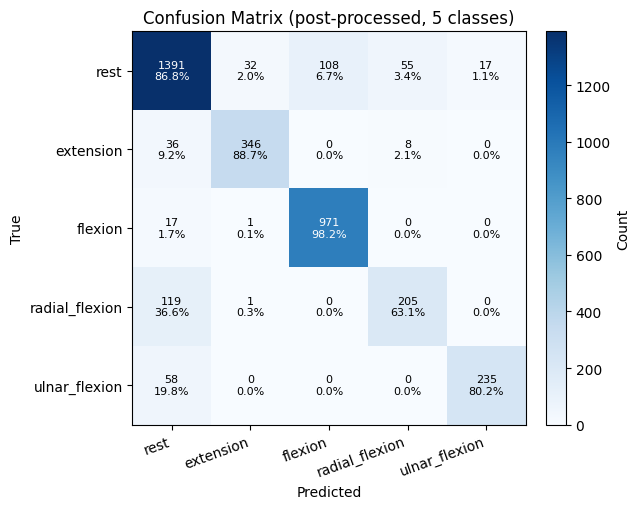

<Figure size 640x480 with 0 Axes>

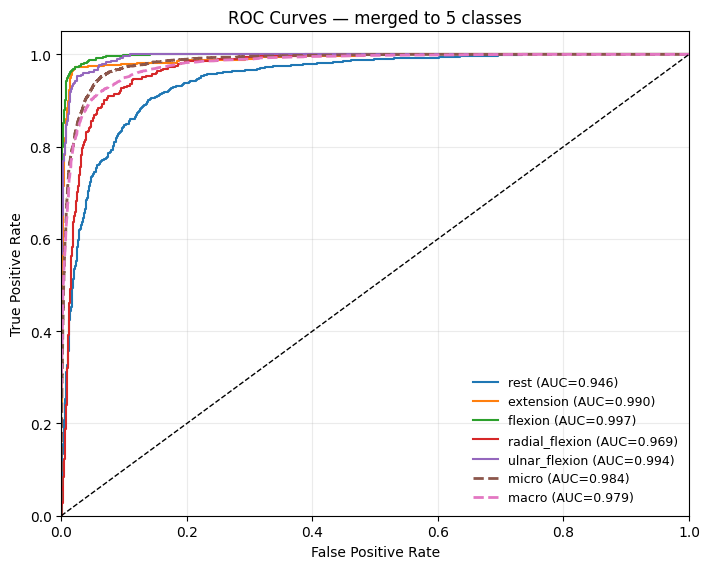

Expected Calibration Error (ECE): 0.0171


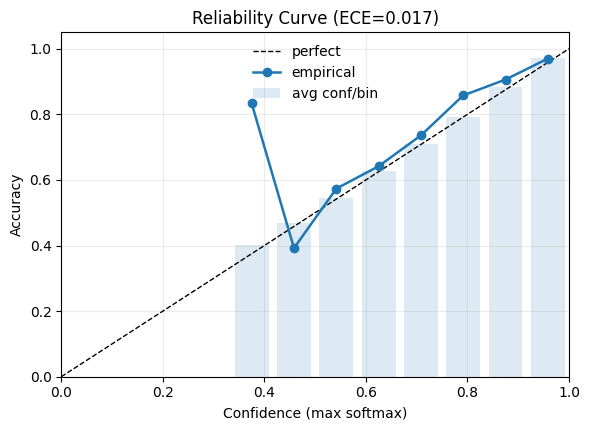

In [11]:
# JUPYTER CELL — Post-process with fallback + NEW class merges (5 classes)

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


def plot_cm_with_percentages(cm, class_names, title="Confusion Matrix", normalize="row",
                             annotate="count+pct", fmt_pct="{:.1f}%", cmap="Blues"):
    """
    cm:           2D ndarray of counts (true rows x predicted cols)
    class_names:  list of names for axes ticks
    normalize:    None | "row" | "col" | "all"   -> how to compute percentages
    annotate:     "count+pct" | "pct" | "count"
    fmt_pct:      format for percentages (e.g., "{:.1f}%")
    """
    cm = np.asarray(cm)
    assert cm.ndim == 2 and cm.shape[0] == cm.shape[1], "cm must be square"
    K = cm.shape[0]

    # --- compute percentages ---
    if normalize is None:
        pct = cm.astype(float)
        denom = 1.0
    elif normalize == "row":
        denom = cm.sum(axis=1, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "col":
        denom = cm.sum(axis=0, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "all":
        denom = cm.sum().clip(min=1)
        pct = (cm / denom) * 100.0
    else:
        raise ValueError("normalize must be None | 'row' | 'col' | 'all'")

    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K))
    ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)

    # dynamic text color for contrast
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0.5

    for i in range(K):
        for j in range(K):
            txts = []
            if annotate in ("count", "count+pct"):
                txts.append(f"{cm[i, j]}")
            if annotate in ("pct", "count+pct"):
                txts.append(fmt_pct.format(pct[i, j]))
            s = "\n".join(txts)

            ax.text(j, i, s,
                    ha="center", va="center", fontsize=8,
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return fig, ax


# -----------------------------
# 0) Get probs/targets if needed
# -----------------------------
if "probs_t" not in globals() or "targets" not in globals():
    model.eval()
    all_logits, all_targets = [], []
    with torch.no_grad():
        for batch in val_loader:
            # support dict or tuple batches
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["signal"], batch["label"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)  # (B, num_classes=5)
            all_logits.append(out.detach().cpu())
            all_targets.append(y.detach().cpu())
    logits_t = torch.cat(all_logits, dim=0)
    probs_t  = torch.softmax(logits_t, dim=1)
    targets  = torch.cat(all_targets, dim=0).numpy()

probs_9 = probs_t.numpy()  # (N, 9) for original classes 0..8

# Optional: original class names fallback (match your 9-class training)
if "class_names" not in globals() or len(class_names) != probs_9.shape[1]:
    class_names = [
        "rest",                    # 0
        "mild_extension",          # 1
        "full_extension",          # 2
        "mild_flexion",            # 3
        "full_flexion",            # 4
        "mild_radial_flexion",     # 5
        "full_radial_flexion",     # 6
        "mild_ulnar_flexion",      # 7
        "full_ulnar_flexion",      # 8
    ]

# ------------------------------------------------------
# 1) Merge to 5 classes:
#    0: rest               <- rest(0) + mild_extension(1)
#    1: extension          <- full_extension(2)
#    2: flexion            <- mild_flexion(3) + full_flexion(4)
#    3: radial_flexion     <- mild_radial(5) + full_radial(6)
#    4: ulnar_flexion      <- mild_ulnar(7) + full_ulnar(8)
# ------------------------------------------------------
def merge_probs_9_to_5(p9: np.ndarray) -> np.ndarray:
    """
    0: rest            <- rest(0) + mild_ext(1) + mild_radial(5) + mild_ulnar(7)
    1: extension       <- full_ext(2)
    2: flexion         <- mild_flex(3) + full_flex(4)
    3: radial_flexion  <- full_radial(6)
    4: ulnar_flexion   <- full_ulnar(8)
    """
    assert p9.ndim == 2 and p9.shape[1] == 9, "Expected (N,9) probs from the 9-class model."
    out = np.zeros((p9.shape[0], 5), dtype=np.float32)
    out[:, 0] = p9[:, 0] + p9[:, 1] + p9[:, 5] + p9[:, 7]   # rest bucket
    out[:, 1] = p9[:, 2]                                   # full extension
    out[:, 2] = p9[:, 3] + p9[:, 4]                        # flexion = mild+full
    out[:, 3] = p9[:, 6]                                   # full radial only
    out[:, 4] = p9[:, 8]                                   # full ulnar only
    # Prob mass is preserved: rows still sum to ~1.0 (floating error aside).
    return out

def merge_labels_9_to_5(y9: np.ndarray) -> np.ndarray:
    """
    Map original hard labels to new 5-class scheme.
    """
    y5 = np.empty_like(y9)
    y5[y9 == 0] = 0   # rest -> rest
    y5[y9 == 1] = 0   # mild extension -> rest
    y5[y9 == 2] = 1   # full extension -> extension
    y5[y9 == 3] = 2   # mild flexion -> flexion
    y5[y9 == 4] = 2   # full flexion -> flexion
    y5[y9 == 5] = 0   # mild radial -> rest   (changed)
    y5[y9 == 6] = 3   # full radial -> radial_flexion
    y5[y9 == 7] = 0   # mild ulnar  -> rest   (changed)
    y5[y9 == 8] = 4   # full ulnar  -> ulnar_flexion
    return y5

probs_5   = merge_probs_9_to_5(probs_9)
targets_5 = merge_labels_9_to_5(targets)

new_class_names = ["rest", "extension", "flexion", "radial_flexion", "ulnar_flexion"]
num_new = 5

# ----------------------------------------------------------
# 2) Confidence fallback: if max_prob < 0.6, predict "rest"
# ----------------------------------------------------------
CONF_THRESH = 0.0
max_prob = probs_5.max(axis=1)
pred_5 = probs_5.argmax(axis=1)
pred_5[max_prob < CONF_THRESH] = 0  # fallback to rest

# ----------------------------------------------------------
# 3) Metrics: accuracy (overall + per-class) & confusion
# ----------------------------------------------------------
overall_acc = (pred_5 == targets_5).mean()
print(f"Overall accuracy (with fallback + merges): {overall_acc:.4f}\n")

print("Per-class precision/recall/F1:")
print(
    classification_report(
        targets_5, pred_5,
        labels=np.arange(num_new),
        target_names=new_class_names,
        digits=3
    )
)

cm = confusion_matrix(targets_5, pred_5, labels=np.arange(num_new))
_ = plot_cm_with_percentages(
    cm,
    new_class_names,
    title="Confusion Matrix (post-processed, 5 classes)",
    normalize="row",          # row-wise percentages (typical)
    annotate="count+pct",     # show both  "count\nxx.x%"
    fmt_pct="{:.1f}%"
)
plt.show()
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 4) ROC curves (one-vs-rest) + AUC using merged probs (5c)
# ----------------------------------------------------------
y_true_bin = label_binarize(targets_5, classes=list(range(num_new)))

fpr, tpr, roc_auc = {}, {}, {}
for c in range(num_new):
    fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], probs_5[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), probs_5.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average
all_fpr = np.unique(np.concatenate([fpr[c] for c in range(num_new)]))
mean_tpr = np.zeros_like(all_fpr)
for c in range(num_new):
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
mean_tpr /= num_new
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(7.2, 5.8))
for c in range(num_new):
    plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{new_class_names[c]} (AUC={roc_auc[c]:.3f})")
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.0, label=f"micro (AUC={roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.0, label=f"macro (AUC={roc_auc['macro']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — merged to 5 classes")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False, fontsize=9, loc="lower right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 5) Reliability (ECE) with post-processed predictions
# ----------------------------------------------------------
def expected_calibration_error(conf, correct, n_bins=15):
    bin_edges = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    bin_acc, bin_conf, bin_counts = [], [], []
    for b in range(n_bins):
        lo, hi = bin_edges[b], bin_edges[b+1]
        mask = (conf >= lo) & (conf < hi) if b < n_bins-1 else (conf >= lo) & (conf <= hi)
        if mask.sum() == 0:
            bin_acc.append(np.nan); bin_conf.append(np.nan); bin_counts.append(0)
            continue
        acc_b = correct[mask].mean()
        conf_b = conf[mask].mean()
        w = mask.mean()
        ece += w * abs(acc_b - conf_b)
        bin_acc.append(acc_b); bin_conf.append(conf_b); bin_counts.append(int(mask.sum()))
    return float(ece), bin_edges, np.array(bin_acc), np.array(bin_conf), np.array(bin_counts)

top_conf = probs_5.max(axis=1)
correct  = (pred_5 == targets_5)
ece, edges, b_acc, b_conf, b_n = expected_calibration_error(top_conf, correct, n_bins=12)

print(f"Expected Calibration Error (ECE): {ece:.4f}")

centers = 0.5*(edges[:-1] + edges[1:])
plt.figure(figsize=(6.0, 4.4))
plt.plot([0,1], [0,1], 'k--', lw=1, label="perfect")
plt.plot(centers[~np.isnan(b_acc)], b_acc[~np.isnan(b_acc)], marker='o', lw=1.8, label="empirical")
plt.bar(centers, b_conf, width=(edges[1]-edges[0])*0.8, alpha=0.15, align='center', label="avg conf/bin")
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("Confidence (max softmax)")
plt.ylabel("Accuracy")
plt.title(f"Reliability Curve (ECE={ece:.3f})")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


Selected τ* = 0.295  (max radial_flexion F1 = 0.7489)
Flipped 108 predictions from 'rest' -> 'radial_flexion'.

BEFORE (original predictions)
Confusion matrix (rows=true, cols=pred):
 [[1413   28   92   54   16]
 [  39  344    0    7    0]
 [  19    1  969    0    0]
 [ 121    1    0  203    0]
 [  64    0    0    0  229]]
                precision    recall  f1-score   support

          rest      0.853     0.881     0.867      1603
     extension      0.920     0.882     0.901       390
       flexion      0.913     0.980     0.945       989
radial_flexion      0.769     0.625     0.689       325
 ulnar_flexion      0.935     0.782     0.851       293

      accuracy                          0.877      3600
     macro avg      0.878     0.830     0.851      3600
  weighted avg      0.876     0.877     0.875      3600


AFTER  (with flip rule)
Confusion matrix (rows=true, cols=pred):
 [[1365   28   92  102   16]
 [  37  344    0    9    0]
 [  19    1  969    0    0]
 [  63    1    0 

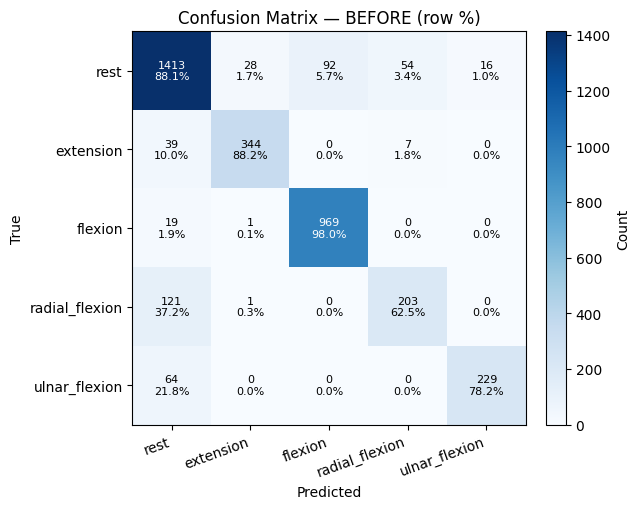

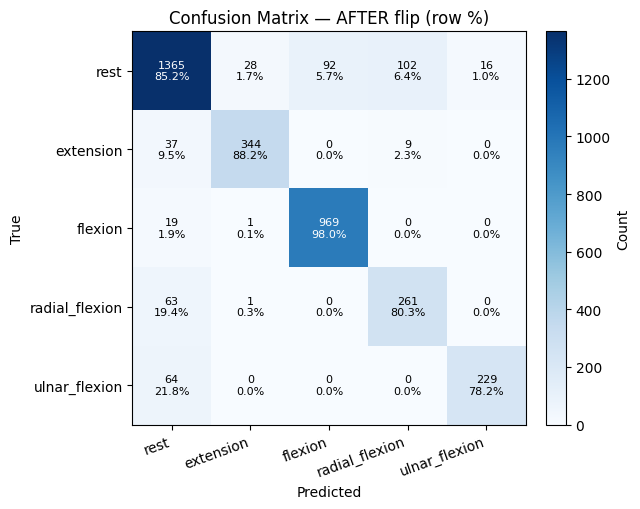

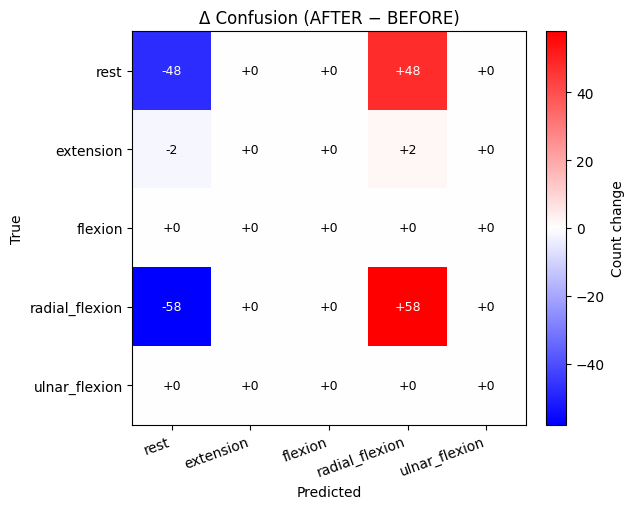

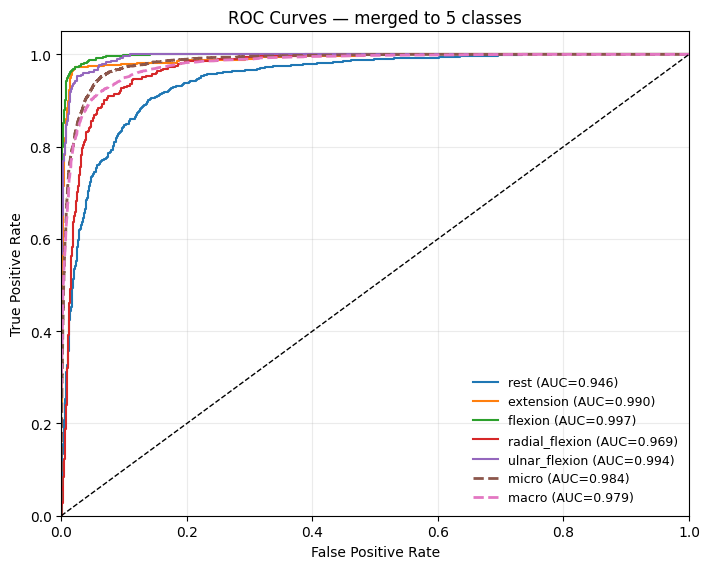

Expected Calibration Error (ECE): 0.0185


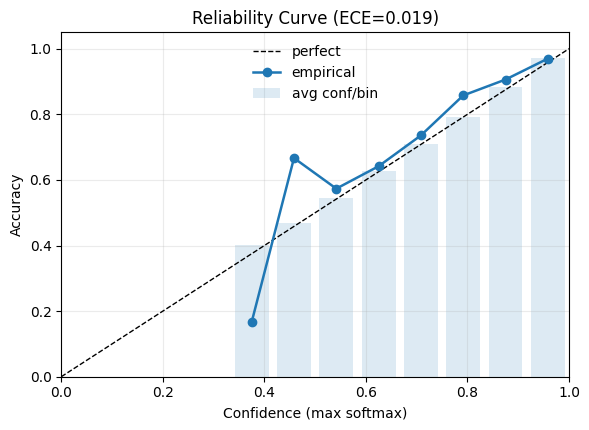

In [37]:
# JUPYTER CELL — Post-process with fallback + NEW class merges (5 classes)

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


def plot_cm_with_percentages(cm, class_names, title="Confusion Matrix", normalize="row",
                             annotate="count+pct", fmt_pct="{:.1f}%", cmap="Blues"):
    """
    cm:           2D ndarray of counts (true rows x predicted cols)
    class_names:  list of names for axes ticks
    normalize:    None | "row" | "col" | "all"   -> how to compute percentages
    annotate:     "count+pct" | "pct" | "count"
    fmt_pct:      format for percentages (e.g., "{:.1f}%")
    """
    cm = np.asarray(cm)
    assert cm.ndim == 2 and cm.shape[0] == cm.shape[1], "cm must be square"
    K = cm.shape[0]

    # --- compute percentages ---
    if normalize is None:
        pct = cm.astype(float)
        denom = 1.0
    elif normalize == "row":
        denom = cm.sum(axis=1, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "col":
        denom = cm.sum(axis=0, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "all":
        denom = cm.sum().clip(min=1)
        pct = (cm / denom) * 100.0
    else:
        raise ValueError("normalize must be None | 'row' | 'col' | 'all'")

    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K))
    ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)

    # dynamic text color for contrast
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0.5

    for i in range(K):
        for j in range(K):
            txts = []
            if annotate in ("count", "count+pct"):
                txts.append(f"{cm[i, j]}")
            if annotate in ("pct", "count+pct"):
                txts.append(fmt_pct.format(pct[i, j]))
            s = "\n".join(txts)

            ax.text(j, i, s,
                    ha="center", va="center", fontsize=8,
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return fig, ax


# -----------------------------
# 0) Get probs/targets if needed
# -----------------------------
if "probs_t" not in globals() or "targets" not in globals():
    model.eval()
    all_logits, all_targets = [], []
    with torch.no_grad():
        for batch in val_loader:
            # support dict or tuple batches
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["signal"], batch["label"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)  # (B, num_classes=5)
            all_logits.append(out.detach().cpu())
            all_targets.append(y.detach().cpu())
    logits_t = torch.cat(all_logits, dim=0)
    probs_t  = torch.softmax(logits_t, dim=1)
    targets  = torch.cat(all_targets, dim=0).numpy()

probs_9 = probs_t.numpy()  # (N, 9) for original classes 0..8

# Optional: original class names fallback (match your 9-class training)
if "class_names" not in globals() or len(class_names) != probs_9.shape[1]:
    class_names = [
        "rest",                    # 0
        "mild_extension",          # 1
        "full_extension",          # 2
        "mild_flexion",            # 3
        "full_flexion",            # 4
        "mild_radial_flexion",     # 5
        "full_radial_flexion",     # 6
        "mild_ulnar_flexion",      # 7
        "full_ulnar_flexion",      # 8
    ]

# ------------------------------------------------------
# 1) Merge to 5 classes:
#    0: rest               <- rest(0) + mild_extension(1)
#    1: extension          <- full_extension(2)
#    2: flexion            <- mild_flexion(3) + full_flexion(4)
#    3: radial_flexion     <- mild_radial(5) + full_radial(6)
#    4: ulnar_flexion      <- mild_ulnar(7) + full_ulnar(8)
# ------------------------------------------------------
def merge_probs_9_to_5(p9: np.ndarray) -> np.ndarray:
    """
    0: rest            <- rest(0) + mild_ext(1) + mild_radial(5) + mild_ulnar(7)
    1: extension       <- full_ext(2)
    2: flexion         <- mild_flex(3) + full_flex(4)
    3: radial_flexion  <- full_radial(6)
    4: ulnar_flexion   <- full_ulnar(8)
    """
    assert p9.ndim == 2 and p9.shape[1] == 9, "Expected (N,9) probs from the 9-class model."
    out = np.zeros((p9.shape[0], 5), dtype=np.float32)
    out[:, 0] = p9[:, 0] + p9[:, 1] + p9[:, 5] + p9[:, 7]   # rest bucket
    out[:, 1] = p9[:, 2]                                   # full extension
    out[:, 2] = p9[:, 3] + p9[:, 4]                        # flexion = mild+full
    out[:, 3] = p9[:, 6]                                   # full radial only
    out[:, 4] = p9[:, 8]                                   # full ulnar only
    # Prob mass is preserved: rows still sum to ~1.0 (floating error aside).
    return out

def merge_labels_9_to_5(y9: np.ndarray) -> np.ndarray:
    """
    Map original hard labels to new 5-class scheme.
    """
    y5 = np.empty_like(y9)
    y5[y9 == 0] = 0   # rest -> rest
    y5[y9 == 1] = 0   # mild extension -> rest
    y5[y9 == 2] = 1   # full extension -> extension
    y5[y9 == 3] = 2   # mild flexion -> flexion
    y5[y9 == 4] = 2   # full flexion -> flexion
    y5[y9 == 5] = 0   # mild radial -> rest   (changed)
    y5[y9 == 6] = 3   # full radial -> radial_flexion
    y5[y9 == 7] = 0   # mild ulnar  -> rest   (changed)
    y5[y9 == 8] = 4   # full ulnar  -> ulnar_flexion
    return y5

probs_5   = merge_probs_9_to_5(probs_9)
targets_5 = merge_labels_9_to_5(targets)

new_class_names = ["rest", "extension", "flexion", "radial_flexion", "ulnar_flexion"]
num_new = 5

# ----------------------------------------------------------
# 2) Confidence fallback: if max_prob < 0.6, predict "rest"
# ----------------------------------------------------------
CONF_THRESH = 0.5
max_prob = probs_5.max(axis=1)
pred_5 = probs_5.argmax(axis=1)
pred_5[max_prob < CONF_THRESH] = 0  # fallback to rest

# ----------------------------------------------------------
# 3) Metrics: original vs. post-hoc flip (rest -> radial if p_rad >= τ*)
# ----------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report, f1_score

K = len(new_class_names)
idx_rest = new_class_names.index("rest")
idx_rad  = new_class_names.index("radial_flexion")

y_true = targets_5
y_pred_base = pred_5.copy()
p_rad = probs_5[:, idx_rad]

def apply_flip(y_pred, pr_rad, tau):
    y_new = y_pred.copy()
    mask = (y_pred == idx_rest) & (pr_rad >= tau)
    y_new[mask] = idx_rad
    return y_new, int(mask.sum())

# ---- choose τ* to maximize F1 for radial_flexion on this set ----
taus = np.linspace(0.0, 1.0, 201)
best_tau, best_f1 = 0.0, -1.0
for tau in taus:
    y_try, _ = apply_flip(y_pred_base, p_rad, tau)
    f1_rad = f1_score(y_true == idx_rad, y_try == idx_rad, zero_division=0)
    if f1_rad > best_f1:
        best_tau, best_f1 = float(tau), float(f1_rad)

y_pred_after, n_flipped = apply_flip(y_pred_base, p_rad, best_tau)

def acc(yhat): return float(np.mean(yhat == y_true))

def report_block(title, yhat):
    cm = confusion_matrix(y_true, yhat, labels=np.arange(K))
    print("\n" + title)
    print("Confusion matrix (rows=true, cols=pred):\n", cm)
    print(classification_report(
        y_true, yhat, labels=np.arange(K), target_names=new_class_names, digits=3
    ))
    return cm

print(f"Selected τ* = {best_tau:.3f}  (max radial_flexion F1 = {best_f1:.4f})")
print(f"Flipped {n_flipped} predictions from 'rest' -> 'radial_flexion'.")

cm_before = report_block("BEFORE (original predictions)", y_pred_base)
cm_after  = report_block("AFTER  (with flip rule)",      y_pred_after)

acc_before, acc_after = acc(y_pred_base), acc(y_pred_after)
print(f"\nOverall accuracy: {acc_before:.4f} -> {acc_after:.4f} (Δ={acc_after-acc_before:+.4f})")

# Compact precision/recall for radial_flexion
def pr_recall(yhat, cls):
    tp = np.sum((y_true == cls) & (yhat == cls))
    fp = np.sum((y_true != cls) & (yhat == cls))
    fn = np.sum((y_true == cls) & (yhat != cls))
    prec = tp/(tp+fp) if (tp+fp) else 0.0
    rec  = tp/(tp+fn) if (tp+fn) else 0.0
    return prec, rec
p_b, r_b = pr_recall(y_pred_base, idx_rad)
p_a, r_a = pr_recall(y_pred_after, idx_rad)
print(f"radial_flexion  Precision: {p_b:.3f} -> {p_a:.3f} | Recall: {r_b:.3f} -> {r_a:.3f}")

# ---- Plots: before & after CMs with percentages ----
_ = plot_cm_with_percentages(
    cm_before, new_class_names,
    title="Confusion Matrix — BEFORE (row %)",
    normalize="row", annotate="count+pct", fmt_pct="{:.1f}%"
)
plt.show()

_ = plot_cm_with_percentages(
    cm_after, new_class_names,
    title="Confusion Matrix — AFTER flip (row %)",
    normalize="row", annotate="count+pct", fmt_pct="{:.1f}%"
)
plt.show()

# ---- Optional: Δ-CM (after - before) heatmap to visualize changes ----
def plot_cm_delta(cm_after, cm_before, class_names, title="Δ Confusion (after - before)"):
    delta = cm_after.astype(int) - cm_before.astype(int)
    vmax = np.max(np.abs(delta))
    vmax = max(vmax, 1)
    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(delta, interpolation='nearest', cmap='bwr', vmin=-vmax, vmax=+vmax)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count change")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K)); ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)
    for i in range(K):
        for j in range(K):
            val = delta[i, j]
            ax.text(j, i, f"{val:+d}", ha="center", va="center",
                    color="white" if abs(val) > vmax*0.6 else "black", fontsize=9)
    fig.tight_layout()
    return fig, ax

_ = plot_cm_delta(cm_after, cm_before, new_class_names,
                  title="Δ Confusion (AFTER − BEFORE)")
plt.show()

# ----------------------------------------------------------
# 4) ROC curves (one-vs-rest) + AUC using merged probs (5c)
# ----------------------------------------------------------
y_true_bin = label_binarize(targets_5, classes=list(range(num_new)))

fpr, tpr, roc_auc = {}, {}, {}
for c in range(num_new):
    fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], probs_5[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), probs_5.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average
all_fpr = np.unique(np.concatenate([fpr[c] for c in range(num_new)]))
mean_tpr = np.zeros_like(all_fpr)
for c in range(num_new):
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
mean_tpr /= num_new
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(7.2, 5.8))
for c in range(num_new):
    plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{new_class_names[c]} (AUC={roc_auc[c]:.3f})")
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.0, label=f"micro (AUC={roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.0, label=f"macro (AUC={roc_auc['macro']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — merged to 5 classes")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False, fontsize=9, loc="lower right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 5) Reliability (ECE) with post-processed predictions
# ----------------------------------------------------------
def expected_calibration_error(conf, correct, n_bins=15):
    bin_edges = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    bin_acc, bin_conf, bin_counts = [], [], []
    for b in range(n_bins):
        lo, hi = bin_edges[b], bin_edges[b+1]
        mask = (conf >= lo) & (conf < hi) if b < n_bins-1 else (conf >= lo) & (conf <= hi)
        if mask.sum() == 0:
            bin_acc.append(np.nan); bin_conf.append(np.nan); bin_counts.append(0)
            continue
        acc_b = correct[mask].mean()
        conf_b = conf[mask].mean()
        w = mask.mean()
        ece += w * abs(acc_b - conf_b)
        bin_acc.append(acc_b); bin_conf.append(conf_b); bin_counts.append(int(mask.sum()))
    return float(ece), bin_edges, np.array(bin_acc), np.array(bin_conf), np.array(bin_counts)

top_conf = probs_5.max(axis=1)
correct  = (pred_5 == targets_5)
ece, edges, b_acc, b_conf, b_n = expected_calibration_error(top_conf, correct, n_bins=12)

print(f"Expected Calibration Error (ECE): {ece:.4f}")

centers = 0.5*(edges[:-1] + edges[1:])
plt.figure(figsize=(6.0, 4.4))
plt.plot([0,1], [0,1], 'k--', lw=1, label="perfect")
plt.plot(centers[~np.isnan(b_acc)], b_acc[~np.isnan(b_acc)], marker='o', lw=1.8, label="empirical")
plt.bar(centers, b_conf, width=(edges[1]-edges[0])*0.8, alpha=0.15, align='center', label="avg conf/bin")
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("Confidence (max softmax)")
plt.ylabel("Accuracy")
plt.title(f"Reliability Curve (ECE={ece:.3f})")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


[Calib] Temperature T* = 0.929 on 9-class logits
[Thresh] Macro-F1 (τ only): 0.8764
  τ[rest] = 0.688
  τ[extension] = 0.121
  τ[flexion] = 0.715
  τ[radial_flexion] = 0.307
  τ[ulnar_flexion] = 0.344
[Margin] Macro-F1 (τ* + γ*): 0.8609  | γ_nonrest=0.000, γ_rest=0.000
  γ vector: [0. 0. 0. 0. 0.]

BEFORE (argmax on calibrated probs)
Accuracy: 0.8747
                precision    recall  f1-score   support

          rest      0.861     0.865     0.863      1603
     extension      0.911     0.892     0.902       390
       flexion      0.898     0.983     0.938       989
radial_flexion      0.761     0.637     0.693       325
 ulnar_flexion      0.933     0.805     0.864       293

      accuracy                          0.875      3600
     macro avg      0.873     0.836     0.852      3600
  weighted avg      0.873     0.875     0.873      3600



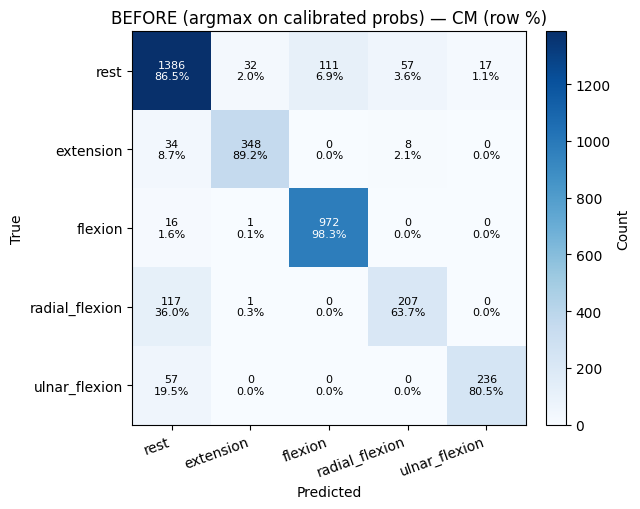


AFTER (τ* only)
Accuracy: 0.8953
                precision    recall  f1-score   support

          rest      0.898     0.871     0.884      1603
     extension      0.893     0.946     0.919       390
       flexion      0.963     0.962     0.962       989
radial_flexion      0.708     0.785     0.745       325
 ulnar_flexion      0.884     0.860     0.872       293

      accuracy                          0.895      3600
     macro avg      0.869     0.885     0.876      3600
  weighted avg      0.897     0.895     0.896      3600



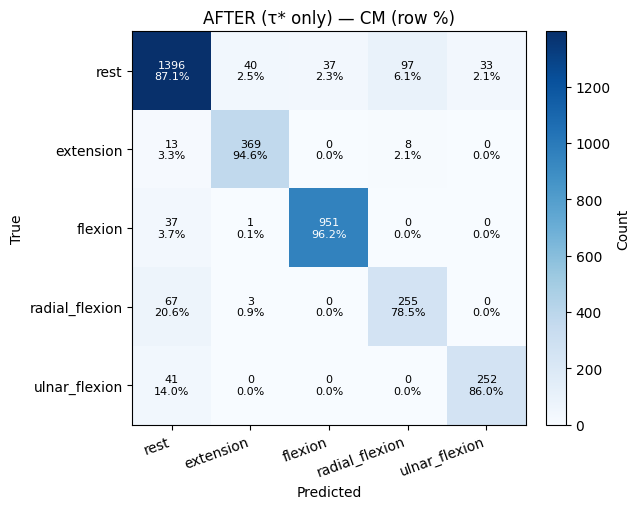


AFTER (τ* + γ*)
Accuracy: 0.8894
                precision    recall  f1-score   support

          rest      0.856     0.911     0.883      1603
     extension      0.911     0.892     0.902       390
       flexion      0.963     0.962     0.962       989
radial_flexion      0.761     0.637     0.693       325
 ulnar_flexion      0.933     0.805     0.864       293

      accuracy                          0.889      3600
     macro avg      0.885     0.841     0.861      3600
  weighted avg      0.889     0.889     0.888      3600



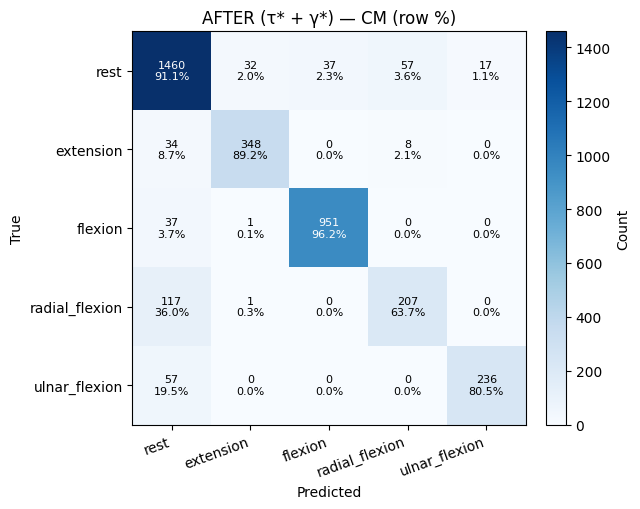

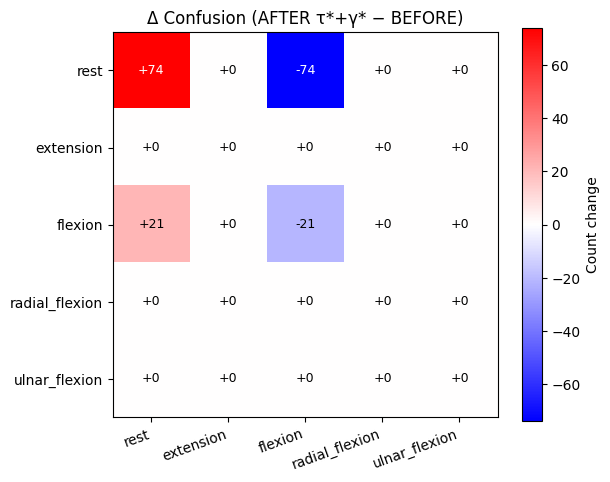

In [41]:
# JUPYTER CELL — Robust: calibrate on native classes → (optional) merge 9→5 → per-class τ (+ optional γ) → report

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from scipy.optimize import minimize_scalar

assert 'logits_t' in globals(), "Need logits_t"
assert 'targets'  in globals(), "Need original targets (9c) as 'targets'"
assert 'targets_5' in globals(), "Need merged 5-class labels 'targets_5'"
assert 'new_class_names' in globals(), "Need 5-class names"
assert 'merge_probs_9_to_5' in globals(), "Need merge function"
assert 'plot_cm_with_percentages' in globals(), "Need CM plot helper"

K5 = len(new_class_names)
idx_rest = new_class_names.index("rest")

# ---------- 1) Temperature scaling on native logits ----------
def softmax(x, axis=-1):
    x = x - np.max(x, axis=axis, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=axis, keepdims=True)

logits_np = logits_t.numpy().astype(np.float64)   # shape (N, Cnative)
Cnative = logits_np.shape[1]

# Pick labels matching native logits for calibration
y_native = targets.astype(int) if Cnative == 9 else targets_5.astype(int)

def nll_for_T(T):
    Pnat = softmax(logits_np / T)
    eps = 1e-12
    return -np.mean(np.log(Pnat[np.arange(len(y_native)), y_native] + eps))

res_T = minimize_scalar(nll_for_T, bounds=(0.2, 5.0), method='bounded')
T_star = float(res_T.x)
P_native_cal = softmax(logits_np / T_star).astype(np.float32)
print(f"[Calib] Temperature T* = {T_star:.3f} on {Cnative}-class logits")

# ---------- 2) If native=9, merge to 5; else keep as-is ----------
if Cnative == 9:
    P5 = merge_probs_9_to_5(P_native_cal)  # (N,5)
else:
    P5 = P_native_cal                       # already (N,5)

# Use merged 5-class labels and names from here on
P = P5
y_true = targets_5.astype(int)
assert P.shape[1] == K5, f"P has {P.shape[1]} cols but expected {K5}"

# ---------- 3) Thresholded decision (+ optional tiny top-2 margin) ----------
def predict_with_thresholds(P, tau, fallback_idx=idx_rest):
    N, K = P.shape
    meets = P >= tau.reshape(1, K)
    any_pass = meets.any(axis=1)
    scores = P.copy()
    scores[~meets] = -1.0
    yhat = scores.argmax(axis=1)
    yhat[~any_pass] = fallback_idx
    return yhat

def predict_with_tau_gamma(P, tau, gamma, fallback_idx=idx_rest):
    order = np.argsort(P, axis=1)
    top = order[:, -1]
    second = order[:, -2]
    top_p = P[np.arange(len(P)), top]
    sec_p = P[np.arange(len(P)), second]
    ok = (top_p >= tau[top]) & ((top_p - sec_p) >= gamma[top])
    yhat = top.copy()
    yhat[~ok] = fallback_idx
    return yhat

# ---------- 4) Optimize per-class τ (macro-F1), then a tiny γ ----------
rng = np.random.default_rng(0)

def macro_f1_tau(tau):
    yhat = predict_with_thresholds(P, tau)
    return f1_score(y_true, yhat, average='macro', zero_division=0)

# Random search for τ
best_tau, best_score = None, -1.0
for _ in range(2000):
    tau = rng.uniform(0.1, 0.6, size=K5)
    tau[idx_rest] = rng.uniform(0.3, 0.85)  # stricter 'rest' as abstain
    s = macro_f1_tau(tau)
    if s > best_score:
        best_tau, best_score = tau, s

# Coordinate refine τ
tau = best_tau.copy()
for _ in range(3):
    for k in range(K5):
        lo, hi = (0.05, 0.95) if k == idx_rest else (0.01, 0.9)
        grid = np.linspace(lo, hi, 25)
        scores = []
        for t in grid:
            tau_try = tau.copy(); tau_try[k] = t
            scores.append(macro_f1_tau(tau_try))
        tau[k] = grid[int(np.argmax(scores))]

tau_star = tau
print(f"[Thresh] Macro-F1 (τ only): {macro_f1_tau(tau_star):.4f}")
for k, t in enumerate(tau_star):
    print(f"  τ[{new_class_names[k]}] = {t:.3f}")

# Optional small margin γ
def macro_f1_tau_gamma(tau, g_nonrest, g_rest):
    gamma = np.full(K5, g_nonrest, dtype=float)
    gamma[idx_rest] = g_rest
    yhat = predict_with_tau_gamma(P, tau, gamma, idx_rest)
    return f1_score(y_true, yhat, average='macro', zero_division=0), gamma

g_nr_grid = np.linspace(0.00, 0.10, 11)
g_r_grid  = np.linspace(0.00, 0.20, 11)
best = (-1.0, 0.0, 0.0, None)
for gnr in g_nr_grid:
    for gr in g_r_grid:
        s, gvec = macro_f1_tau_gamma(tau_star, gnr, gr)
        if s > best[0]:
            best = (s, gnr, gr, gvec)

macroF1_star, gnr_star, gr_star, gamma_star = best
print(f"[Margin] Macro-F1 (τ* + γ*): {macroF1_star:.4f}  | γ_nonrest={gnr_star:.3f}, γ_rest={gr_star:.3f}")
print("  γ vector:", np.round(gamma_star, 3))

# ---------- 5) Compare BEFORE vs AFTER + plots ----------
y_pred_base = P.argmax(axis=1)
y_pred_tau  = predict_with_thresholds(P, tau_star, idx_rest)
y_pred_full = predict_with_tau_gamma(P, tau_star, gamma_star, idx_rest)

def show_report(title, yhat):
    acc = accuracy_score(y_true, yhat)
    print(f"\n{title}\nAccuracy: {acc:.4f}")
    print(classification_report(y_true, yhat, labels=np.arange(K5), target_names=new_class_names, digits=3))
    cm = confusion_matrix(y_true, yhat, labels=np.arange(K5))
    _ = plot_cm_with_percentages(cm, new_class_names, title=f"{title} — CM (row %)",
                                 normalize="row", annotate="count+pct", fmt_pct="{:.1f}%")
    plt.show()
    return cm, acc

cm_b, acc_b = show_report("BEFORE (argmax on calibrated probs)", y_pred_base)
cm_t, acc_t = show_report("AFTER (τ* only)",                     y_pred_tau)
cm_f, acc_f = show_report("AFTER (τ* + γ*)",                     y_pred_full)

delta = cm_f - cm_b
fig, ax = plt.subplots(figsize=(6.2,5.0))
v = max(1, np.abs(delta).max())
im = ax.imshow(delta, cmap='bwr', vmin=-v, vmax=+v)
plt.colorbar(im, ax=ax, label="Count change")
ax.set_xticks(range(K5)); ax.set_yticks(range(K5))
ax.set_xticklabels(new_class_names, rotation=20, ha='right'); ax.set_yticklabels(new_class_names)
ax.set_title("Δ Confusion (AFTER τ*+γ* − BEFORE)")
for i in range(K5):
    for j in range(K5):
        ax.text(j, i, f"{delta[i,j]:+d}", ha='center', va='center',
                color='white' if abs(delta[i,j]) > 0.6*v else 'black', fontsize=9)
plt.tight_layout(); plt.show()


[Calib] T* = 0.929 on native 9-class logits
[Thresh] Macro-F1 (τ*): 0.8764
  τ[rest] = 0.688
  τ[extension] = 0.121
  τ[flexion] = 0.715
  τ[radial_flexion] = 0.307
  τ[ulnar_flexion] = 0.344

BEFORE (argmax on calibrated probs)
Accuracy: 0.8747
                precision    recall  f1-score   support

          rest      0.861     0.865     0.863      1603
     extension      0.911     0.892     0.902       390
       flexion      0.898     0.983     0.938       989
radial_flexion      0.761     0.637     0.693       325
 ulnar_flexion      0.933     0.805     0.864       293

      accuracy                          0.875      3600
     macro avg      0.873     0.836     0.852      3600
  weighted avg      0.873     0.875     0.873      3600



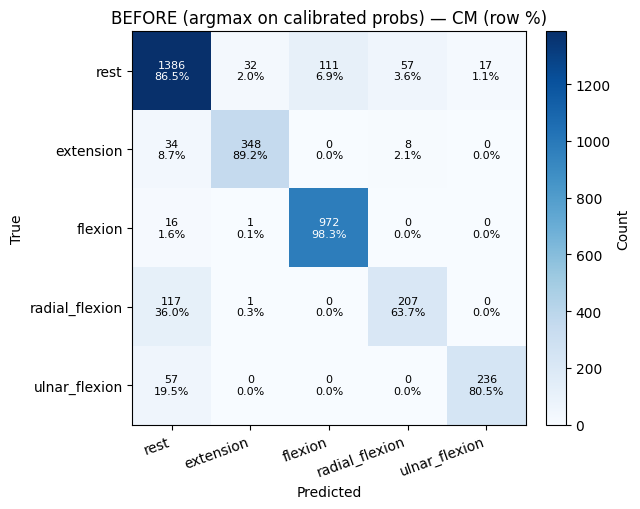


AFTER (τ* only)
Accuracy: 0.8953
                precision    recall  f1-score   support

          rest      0.898     0.871     0.884      1603
     extension      0.893     0.946     0.919       390
       flexion      0.963     0.962     0.962       989
radial_flexion      0.708     0.785     0.745       325
 ulnar_flexion      0.884     0.860     0.872       293

      accuracy                          0.895      3600
     macro avg      0.869     0.885     0.876      3600
  weighted avg      0.897     0.895     0.896      3600



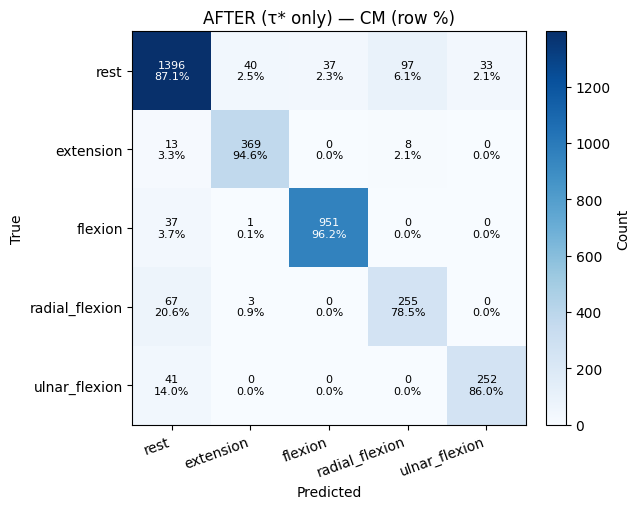

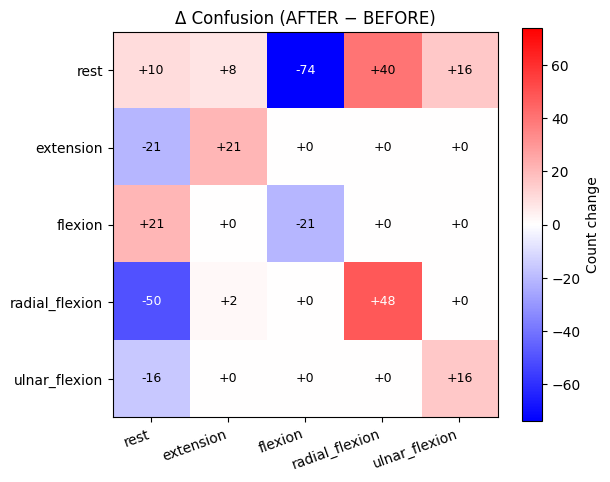


Summary: Accuracy 0.8747 → 0.8953 | Macro-F1 0.8521 → 0.8764
Saved params → thresholds_calibrated_tau_only.npz


In [42]:
# JUPYTER CELL — Final: Calibrate (native) → Merge to 5 → Learn τ* (macro-F1) → Evaluate → Runtime fn

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from scipy.optimize import minimize_scalar

assert 'logits_t' in globals() and 'targets' in globals()
assert 'merge_probs_9_to_5' in globals() and 'merge_labels_9_to_5' in globals()
assert 'plot_cm_with_percentages' in globals()

new_class_names = ["rest","extension","flexion","radial_flexion","ulnar_flexion"]
K = len(new_class_names)
idx_rest = new_class_names.index("rest")

# -----------------------------
# 1) Temperature scaling on native logits (9c or 5c), then merge to 5c
# -----------------------------
def softmax(x, axis=-1):
    x = x - np.max(x, axis=axis, keepdims=True)
    e = np.exp(x); return e / np.sum(e, axis=axis, keepdims=True)

logits_np = logits_t.numpy().astype(np.float64)     # (N, Cnative)
Cnative = logits_np.shape[1]
y_native = targets.astype(int) if Cnative == 9 else merge_labels_9_to_5(targets)

def nll_T(T):
    Pnat = softmax(logits_np / T)
    eps = 1e-12
    return -np.mean(np.log(Pnat[np.arange(len(y_native)), y_native] + eps))

res_T = minimize_scalar(nll_T, bounds=(0.2, 5.0), method='bounded')
T_star = float(res_T.x)
print(f"[Calib] T* = {T_star:.3f} on native {Cnative}-class logits")

P_native_cal = softmax(logits_np / T_star).astype(np.float32)

if Cnative == 9:
    P5 = merge_probs_9_to_5(P_native_cal).astype(np.float32)   # (N,5)
    y_true = merge_labels_9_to_5(targets.astype(int))
else:
    P5 = P_native_cal
    y_true = y_native

# -----------------------------
# 2) Learn per-class thresholds τ* (macro-F1), fallback to 'rest'
# -----------------------------
rng = np.random.default_rng(0)

def predict_with_tau(P, tau, fallback_idx=idx_rest):
    N, K = P.shape
    meets = P >= tau.reshape(1, K)
    any_pass = meets.any(axis=1)
    scores = P.copy(); scores[~meets] = -1.0
    yhat = scores.argmax(axis=1)
    yhat[~any_pass] = fallback_idx
    return yhat

def macro_f1_tau(P, y, tau):
    yhat = predict_with_tau(P, tau)
    return f1_score(y, yhat, average='macro', zero_division=0)

# Random search + coordinate refine
best_tau, best_score = None, -1.0
for _ in range(2000):
    tau = rng.uniform(0.1, 0.6, size=K)
    tau[idx_rest] = rng.uniform(0.3, 0.85)    # stricter 'rest' as abstain
    s = macro_f1_tau(P5, y_true, tau)
    if s > best_score:
        best_tau, best_score = tau, s

tau = best_tau.copy()
for _ in range(3):
    for k in range(K):
        lo, hi = (0.05, 0.95) if k == idx_rest else (0.01, 0.9)
        grid = np.linspace(lo, hi, 25)
        scores = []
        for t in grid:
            tau_try = tau.copy(); tau_try[k] = t
            scores.append(macro_f1_tau(P5, y_true, tau_try))
        tau[k] = grid[int(np.argmax(scores))]

tau_star = tau
print(f"[Thresh] Macro-F1 (τ*): {macro_f1_tau(P5, y_true, tau_star):.4f}")
for k, t in enumerate(tau_star):
    print(f"  τ[{new_class_names[k]}] = {t:.3f}")

# -----------------------------
# 3) BEFORE vs AFTER, plots
# -----------------------------
y_pred_before = P5.argmax(axis=1)
y_pred_after  = predict_with_tau(P5, tau_star, idx_rest)

def show_report(title, yhat):
    acc = accuracy_score(y_true, yhat)
    print(f"\n{title}\nAccuracy: {acc:.4f}")
    print(classification_report(y_true, yhat, labels=np.arange(K), target_names=new_class_names, digits=3))
    cm = confusion_matrix(y_true, yhat, labels=np.arange(K))
    _ = plot_cm_with_percentages(cm, new_class_names, title=f"{title} — CM (row %)",
                                 normalize="row", annotate="count+pct", fmt_pct="{:.1f}%")
    plt.show()
    return cm, acc

cm_b, acc_b = show_report("BEFORE (argmax on calibrated probs)", y_pred_before)
cm_a, acc_a = show_report("AFTER (τ* only)",                      y_pred_after)

delta = cm_a - cm_b
fig, ax = plt.subplots(figsize=(6.2,5.0))
v = max(1, np.abs(delta).max())
im = ax.imshow(delta, cmap='bwr', vmin=-v, vmax=+v)
plt.colorbar(im, ax=ax, label="Count change")
ax.set_xticks(range(K)); ax.set_yticks(range(K))
ax.set_xticklabels(new_class_names, rotation=20, ha='right'); ax.set_yticklabels(new_class_names)
ax.set_title("Δ Confusion (AFTER − BEFORE)")
for i in range(K):
    for j in range(K):
        ax.text(j, i, f"{delta[i,j]:+d}", ha='center', va='center',
                color='white' if abs(delta[i,j]) > 0.6*v else 'black', fontsize=9)
plt.tight_layout(); plt.show()

print(f"\nSummary: Accuracy {acc_b:.4f} → {acc_a:.4f} | Macro-F1 {f1_score(y_true,y_pred_before,average='macro'):.4f} → {f1_score(y_true,y_pred_after,average='macro'):.4f}")

# -----------------------------
# 4) Runtime function for deployment (+ saving params)
#    Input: native logits (9c or 5c). Output: predicted class idx in 5c.
# -----------------------------
def apply_thresholds_runtime(logits_row_native):
    lr = np.asarray(logits_row_native, dtype=np.float64)
    # calibrate
    pr_native = softmax(lr / T_star)
    # merge if needed
    if pr_native.shape[0] == 9:
        pr5 = merge_probs_9_to_5(pr_native.reshape(1, -1)).ravel()
    else:
        pr5 = pr_native
    # τ-only rule with fallback to 'rest'
    meets = pr5 >= tau_star
    if meets.any():
        c = np.argmax(np.where(meets, pr5, -1.0))
        return int(c)
    return int(idx_rest)

np.savez("thresholds_calibrated_tau_only.npz",
         temperature=T_star,
         tau=tau_star,
         class_names=np.array(new_class_names))
print("Saved params → thresholds_calibrated_tau_only.npz")


Samples: 3600 | Native classes: 9 | Using T*=0.929

BEFORE (argmax on calibrated probs)
Accuracy: 0.8747
                precision    recall  f1-score   support

          rest      0.861     0.865     0.863      1603
     extension      0.911     0.892     0.902       390
       flexion      0.898     0.983     0.938       989
radial_flexion      0.761     0.637     0.693       325
 ulnar_flexion      0.933     0.805     0.864       293

      accuracy                          0.875      3600
     macro avg      0.873     0.836     0.852      3600
  weighted avg      0.873     0.875     0.873      3600



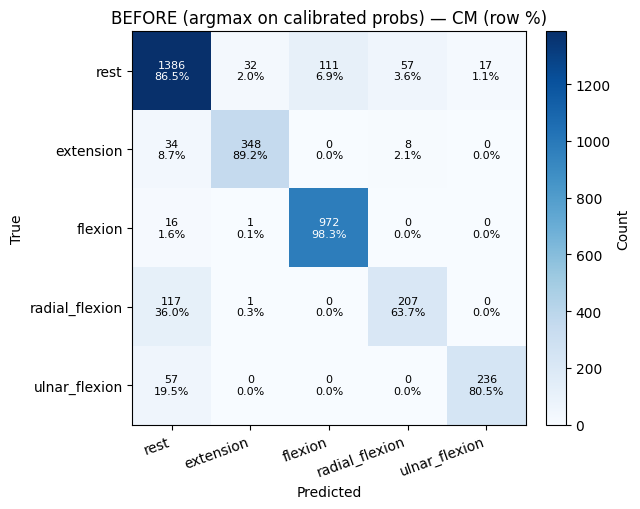


AFTER (τ* only, fallback=rest)
Accuracy: 0.8950
                precision    recall  f1-score   support

          rest      0.898     0.871     0.884      1603
     extension      0.891     0.946     0.918       390
       flexion      0.963     0.962     0.962       989
radial_flexion      0.708     0.782     0.743       325
 ulnar_flexion      0.884     0.860     0.872       293

      accuracy                          0.895      3600
     macro avg      0.869     0.884     0.876      3600
  weighted avg      0.897     0.895     0.896      3600



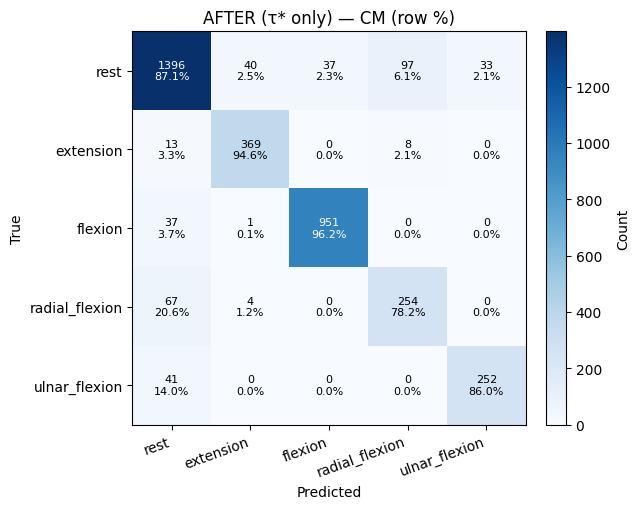

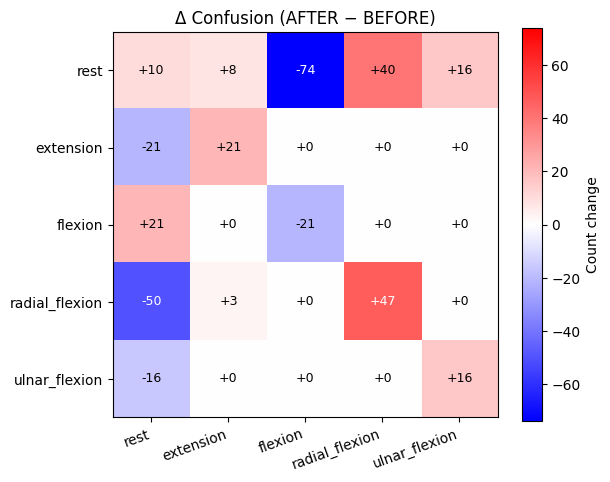

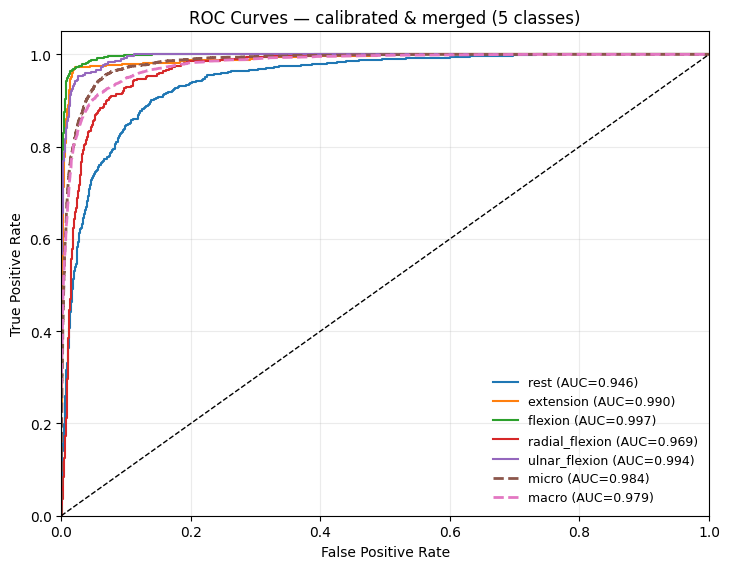

Expected Calibration Error (ECE) [τ* preds]: 0.0323


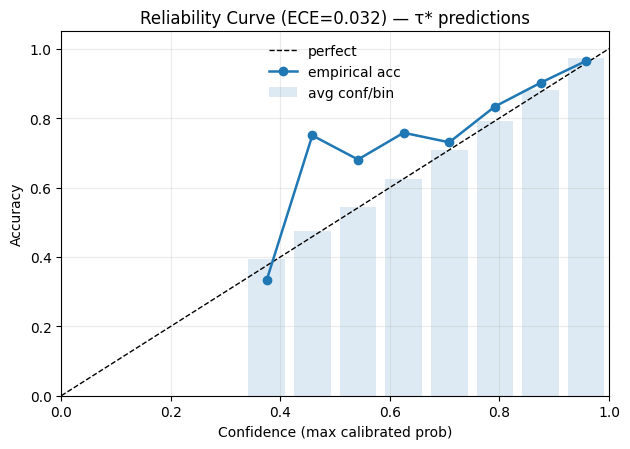


Summary:
  Accuracy  0.8747 → 0.8950
  Macro-F1  0.8521 → 0.8758


In [51]:
# JUPYTER CELL — Evaluate with fixed calibrated params (T*, τ*), full metrics

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc,
    f1_score, accuracy_score
)
from sklearn.preprocessing import label_binarize

# -----------------------------
# 0) FIXED, CHOSEN PARAMETERS  ✅
# -----------------------------
T_STAR = 0.929
CLASS_NAMES = ["rest","extension","flexion","radial_flexion","ulnar_flexion"]
TAU_STAR = np.array([0.688, 0.121, 0.715, 0.307, 0.344], dtype=np.float32)  # [rest, ext, flex, radial, ulnar]
IDX_REST = CLASS_NAMES.index("rest")

# -----------------------------
# 1) Helpers
# -----------------------------
def softmax(x, axis=-1):
    x = x - np.max(x, axis=axis, keepdims=True)
    e = np.exp(x)
    return e / np.sum(e, axis=axis, keepdims=True)

# You already defined these earlier; keep asserts to avoid silent misuse.
assert 'merge_probs_9_to_5' in globals(), "Need merge_probs_9_to_5 defined above."
assert 'merge_labels_9_to_5' in globals(), "Need merge_labels_9_to_5 defined above."
assert 'plot_cm_with_percentages' in globals(), "Run the CM helper cell first."

def predict_with_tau(P5, tau=TAU_STAR, fallback_idx=IDX_REST):
    """Thresholded prediction with fallback to 'rest' if no class meets its τ."""
    N, K = P5.shape
    meets = P5 >= tau.reshape(1, K)
    any_pass = meets.any(axis=1)
    scores = P5.copy()
    scores[~meets] = -1.0
    yhat = scores.argmax(axis=1)
    yhat[~any_pass] = fallback_idx
    return yhat

def expected_calibration_error(conf, correct, n_bins=12):
    edges = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    bin_acc, bin_conf, bin_counts = [], [], []
    for b in range(n_bins):
        lo, hi = edges[b], edges[b+1]
        mask = (conf >= lo) & (conf < hi) if b < n_bins-1 else (conf >= lo) & (conf <= hi)
        if mask.sum() == 0:
            bin_acc.append(np.nan); bin_conf.append(np.nan); bin_counts.append(0)
            continue
        acc_b = correct[mask].mean()
        conf_b = conf[mask].mean()
        w = mask.mean()
        ece += w * abs(acc_b - conf_b)
        bin_acc.append(acc_b); bin_conf.append(conf_b); bin_counts.append(int(mask.sum()))
    return float(ece), edges, np.array(bin_acc), np.array(bin_conf), np.array(bin_counts)

# -----------------------------
# 2) Evaluation function (use your dataloader, e.g., val_loader)
# -----------------------------
def evaluate_fixed(eval_loader, model, device=None):
    model.eval()
    if device is None:
        device = next(model.parameters()).device

    logits_all, targets9_all = [], []
    with torch.no_grad():
        for batch in eval_loader:
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["signal"], batch["label"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)                # native logits (N, 9) or (N, 5)
            logits_all.append(out.detach().cpu())
            targets9_all.append(y.detach().cpu())

    logits_native = torch.cat(logits_all, dim=0).numpy().astype(np.float64)
    targets9 = torch.cat(targets9_all, dim=0).numpy().astype(int)
    N, Cnative = logits_native.shape

    # Calibrate native logits with T*, then softmax
    P_native_cal = softmax(logits_native / T_STAR)

    # Merge to 5 classes if native=9; else keep as-is
    if Cnative == 9:
        P5 = merge_probs_9_to_5(P_native_cal).astype(np.float32)
        y_true = merge_labels_9_to_5(targets9)
    elif Cnative == 5:
        P5 = P_native_cal.astype(np.float32)
        y_true = targets9
    else:
        raise ValueError(f"Unexpected native class count: {Cnative} (expected 9 or 5)")

    # Predictions
    y_pred_argmax = P5.argmax(axis=1)
    y_pred_tau    = predict_with_tau(P5, TAU_STAR, IDX_REST)

    # -------- Reports --------
    print(f"Samples: {N} | Native classes: {Cnative} | Using T*={T_STAR:.3f}")
    print("\nBEFORE (argmax on calibrated probs)")
    acc_before = accuracy_score(y_true, y_pred_argmax)
    print(f"Accuracy: {acc_before:.4f}")
    print(classification_report(y_true, y_pred_argmax,
                                labels=np.arange(len(CLASS_NAMES)),
                                target_names=CLASS_NAMES, digits=3))
    cm_before = confusion_matrix(y_true, y_pred_argmax, labels=np.arange(len(CLASS_NAMES)))
    _ = plot_cm_with_percentages(cm_before, CLASS_NAMES,
                                 title="BEFORE (argmax on calibrated probs) — CM (row %)",
                                 normalize="row", annotate="count+pct", fmt_pct="{:.1f}%")
    plt.show()

    print("\nAFTER (τ* only, fallback=rest)")
    acc_after = accuracy_score(y_true, y_pred_tau)
    print(f"Accuracy: {acc_after:.4f}")
    print(classification_report(y_true, y_pred_tau,
                                labels=np.arange(len(CLASS_NAMES)),
                                target_names=CLASS_NAMES, digits=3))
    cm_after = confusion_matrix(y_true, y_pred_tau, labels=np.arange(len(CLASS_NAMES)))
    _ = plot_cm_with_percentages(cm_after, CLASS_NAMES,
                                 title="AFTER (τ* only) — CM (row %)",
                                 normalize="row", annotate="count+pct", fmt_pct="{:.1f}%")
    plt.show()

    # Δ-CM
    delta = cm_after - cm_before
    fig, ax = plt.subplots(figsize=(6.2, 5.0))
    v = max(1, np.abs(delta).max())
    im = ax.imshow(delta, cmap='bwr', vmin=-v, vmax=+v)
    plt.colorbar(im, ax=ax, label="Count change")
    ax.set_xticks(range(len(CLASS_NAMES))); ax.set_yticks(range(len(CLASS_NAMES)))
    ax.set_xticklabels(CLASS_NAMES, rotation=20, ha='right'); ax.set_yticklabels(CLASS_NAMES)
    ax.set_title("Δ Confusion (AFTER − BEFORE)")
    for i in range(len(CLASS_NAMES)):
        for j in range(len(CLASS_NAMES)):
            ax.text(j, i, f"{delta[i,j]:+d}", ha='center', va='center',
                    color='white' if abs(delta[i,j]) > 0.6*v else 'black', fontsize=9)
    plt.tight_layout(); plt.show()

    # -------- ROC (one-vs-rest) on calibrated merged probs --------
    y_true_bin = label_binarize(y_true, classes=list(range(len(CLASS_NAMES))))
    fpr, tpr, roc_auc = {}, {}, {}
    for c in range(len(CLASS_NAMES)):
        fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], P5[:, c])
        roc_auc[c] = auc(fpr[c], tpr[c])
    # micro/macro
    fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), P5.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[c] for c in range(len(CLASS_NAMES))]))
    mean_tpr = np.zeros_like(all_fpr)
    for c in range(len(CLASS_NAMES)):
        mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
    mean_tpr /= len(CLASS_NAMES)
    fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    plt.figure(figsize=(7.4, 5.8))
    for c in range(len(CLASS_NAMES)):
        plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{CLASS_NAMES[c]} (AUC={roc_auc[c]:.3f})")
    plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.0, label=f"micro (AUC={roc_auc['micro']:.3f})")
    plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.0, label=f"macro (AUC={roc_auc['macro']:.3f})")
    plt.plot([0,1],[0,1],'k--', lw=1)
    plt.xlim([0,1]); plt.ylim([0,1.05])
    plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
    plt.title("ROC Curves — calibrated & merged (5 classes)")
    plt.grid(True, alpha=0.25); plt.legend(frameon=False, fontsize=9, loc="lower right")
    plt.tight_layout(); plt.show()

    # -------- Reliability / ECE (using τ* predictions) --------
    top_conf = P5.max(axis=1)
    correct  = (y_pred_tau == y_true)
    ece, edges, b_acc, b_conf, b_n = expected_calibration_error(top_conf, correct, n_bins=12)
    centers = 0.5*(edges[:-1] + edges[1:])
    print(f"Expected Calibration Error (ECE) [τ* preds]: {ece:.4f}")
    plt.figure(figsize=(6.4, 4.6))
    plt.plot([0,1], [0,1], 'k--', lw=1, label="perfect")
    plt.plot(centers[~np.isnan(b_acc)], b_acc[~np.isnan(b_acc)], marker='o', lw=1.8, label="empirical acc")
    plt.bar(centers, b_conf, width=(edges[1]-edges[0])*0.8, alpha=0.15, align='center', label="avg conf/bin")
    plt.xlim(0,1); plt.ylim(0,1.05)
    plt.xlabel("Confidence (max calibrated prob)")
    plt.ylabel("Accuracy")
    plt.title(f"Reliability Curve (ECE={ece:.3f}) — τ* predictions")
    plt.grid(True, alpha=0.25); plt.legend(frameon=False)
    plt.tight_layout(); plt.show()

    # Compact summary
    macroF1_before = f1_score(y_true, y_pred_argmax, average='macro')
    macroF1_after  = f1_score(y_true, y_pred_tau,    average='macro')
    print(f"\nSummary:\n  Accuracy  {acc_before:.4f} → {acc_after:.4f}\n  Macro-F1  {macroF1_before:.4f} → {macroF1_after:.4f}")

    return {
        "cm_before": cm_before, "cm_after": cm_after,
        "acc_before": acc_before, "acc_after": acc_after,
        "macroF1_before": macroF1_before, "macroF1_after": macroF1_after,
        "ece": ece, "tau_star": TAU_STAR, "T_star": T_STAR
    }

# -----------------------------
# 3) Run it on your loader
# -----------------------------
# Example:
results = evaluate_fixed(val_loader, model, device)


[Calib-9c] Optimal temperature T* = 0.927
[Thresh] Fit macro-F1* = 0.8588
  τ* = [0.05  0.492 0.789 0.418 0.01 ]
    τ[rest] = 0.050
    τ[extension] = 0.492
    τ[flexion] = 0.789
    τ[radial_flexion] = 0.418
    τ[ulnar_flexion] = 0.010
[Margin] γ_nonrest* = 0.000, γ_rest* = 0.000

BEFORE (calibrated, argmax) — HELD-OUT
Accuracy: 0.8787
                precision    recall  f1-score   support

          rest      0.874     0.854     0.864       481
     extension      0.914     0.906     0.910       117
       flexion      0.902     0.990     0.944       297
radial_flexion      0.729     0.639     0.681        97
 ulnar_flexion      0.916     0.864     0.889        88

      accuracy                          0.879      1080
     macro avg      0.867     0.851     0.858      1080
  weighted avg      0.877     0.879     0.877      1080



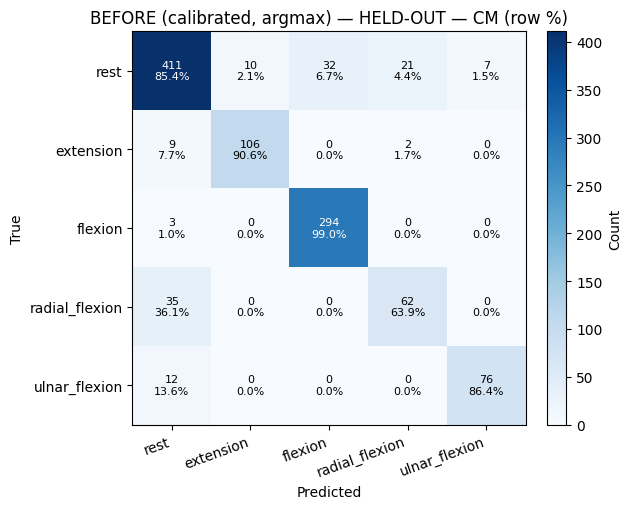


AFTER (τ* + γ*) — HELD-OUT
Accuracy: 0.8889
                precision    recall  f1-score   support

          rest      0.855     0.909     0.881       481
     extension      0.913     0.897     0.905       117
       flexion      0.979     0.943     0.961       297
radial_flexion      0.729     0.639     0.681        97
 ulnar_flexion      0.916     0.864     0.889        88

      accuracy                          0.889      1080
     macro avg      0.878     0.850     0.863      1080
  weighted avg      0.889     0.889     0.888      1080



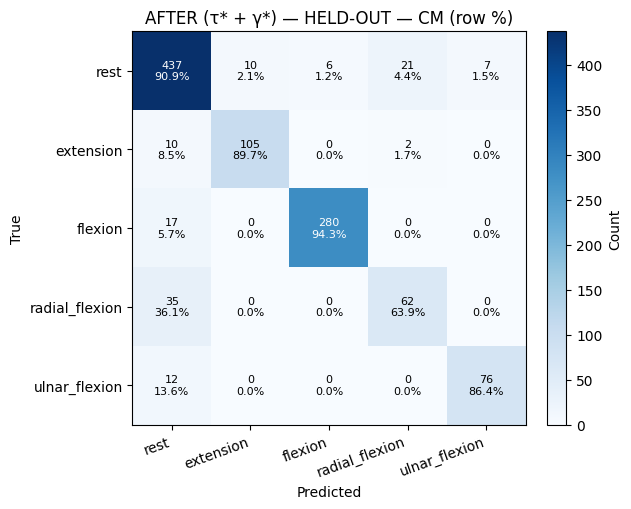

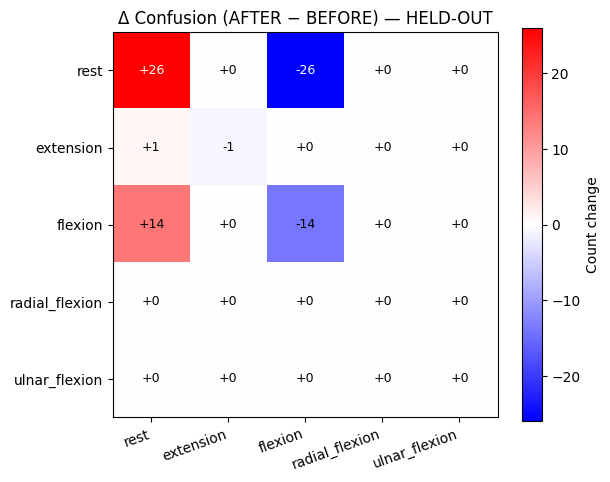


Summary (held-out): Accuracy 0.8787 ➜ 0.8889  (Δ=+0.0102)


In [ ]:
# # JUPYTER CELL — Calibrate (9c) ➜ Merge (5c) ➜ Per-class thresholds + small margin ➜ Held-out eval

# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
# from sklearn.model_selection import train_test_split
# from scipy.optimize import minimize_scalar

# # -------- prerequisites: logits_t (9c), targets (9c). If absent, compute from val_loader --------
# assert 'merge_probs_9_to_5' in globals(), "Need merge_probs_9_to_5() defined above."
# assert 'plot_cm_with_percentages' in globals(), "Need plot_cm_with_percentages() defined above."

# if ("logits_t" not in globals()) or ("targets" not in globals()):
#     model.eval()
#     all_logits, all_targets = [], []
#     with torch.no_grad():
#         for batch in val_loader:
#             if isinstance(batch, (list, tuple)):
#                 x, y = batch[0], batch[1]
#             else:
#                 x, y = batch["signal"], batch["label"]
#             x = x.to(device, non_blocking=True)
#             y = y.to(device, non_blocking=True)
#             out = model(x)          # logits over ORIGINAL 9 classes
#             all_logits.append(out.detach().cpu())
#             all_targets.append(y.detach().cpu())
#     logits_t = torch.cat(all_logits, dim=0)     # (N, 9)
#     targets  = torch.cat(all_targets, dim=0).numpy()

# logits_9 = logits_t.numpy().astype(np.float64)  # (N, 9)
# y9 = targets.astype(int)
# N9 = logits_9.shape[0]

# # -------- utilities --------
# def softmax(x, axis=-1):
#     x = x - np.max(x, axis=axis, keepdims=True)
#     ex = np.exp(x)
#     return ex / np.sum(ex, axis=axis, keepdims=True)

# # -------- 1) split once to avoid overfitting thresholds --------
# idx_all = np.arange(N9)
# idx_fit, idx_hold = train_test_split(idx_all, test_size=0.30, stratify=y9, random_state=42)

# # -------- 2) temperature scaling on 9c (fit only), then merge to 5c --------
# def nll_T(T):
#     P9 = softmax(logits_9[idx_fit] / T)
#     eps = 1e-12
#     return -np.mean(np.log(P9[np.arange(len(idx_fit)), y9[idx_fit]] + eps))

# res = minimize_scalar(nll_T, bounds=(0.2, 5.0), method='bounded')
# T_star = float(res.x)
# print(f"[Calib-9c] Optimal temperature T* = {T_star:.3f}")

# P9_all = softmax(logits_9 / T_star)                      # calibrated (N, 9)
# P5_all = merge_probs_9_to_5(P9_all).astype(np.float32)   # merge to 5 classes (N, 5)

# # downstream labels in 5c
# targets_5_all = merge_labels_9_to_5(y9)
# new_class_names = ["rest", "extension", "flexion", "radial_flexion", "ulnar_flexion"]
# K = len(new_class_names)
# idx_rest = new_class_names.index("rest")
# idx_rad  = new_class_names.index("radial_flexion")

# P_fit, y_fit = P5_all[idx_fit], targets_5_all[idx_fit]
# P_hold, y_hold = P5_all[idx_hold], targets_5_all[idx_hold]

# # -------- 3) thresholded decision rule + small top-2 margin --------
# def predict_with_tau_gamma(P, tau, gamma, fallback_idx=idx_rest):
#     """
#     P: (N,K) probs; tau, gamma: (K,)
#     rule: accept top-1 class c if P_c >= tau[c] AND (P_c - P_second) >= gamma[c]; else fallback.
#     """
#     N, K = P.shape
#     order = np.argsort(P, axis=1)           # ascending
#     top = order[:, -1]
#     second = order[:, -2]
#     top_p = P[np.arange(N), top]
#     sec_p = P[np.arange(N), second]
#     meets = (top_p >= tau[top]) & ((top_p - sec_p) >= gamma[top])
#     yhat = top.copy()
#     yhat[~meets] = fallback_idx
#     return yhat

# def macro_f1_tau_gamma(P, y, tau, gamma):
#     yhat = predict_with_tau_gamma(P, tau, gamma, idx_rest)
#     return f1_score(y, yhat, average='macro', zero_division=0)

# # random + coordinate search for τ (per-class)
# rng = np.random.default_rng(0)
# tau_best = np.full(K, 0.5)
# best_score = -1.0
# for _ in range(2000):
#     tau = rng.uniform(0.1, 0.7, size=K)
#     tau[idx_rest] = rng.uniform(0.4, 0.85)  # rest stricter (acts like abstain)
#     s = macro_f1_tau_gamma(P_fit, y_fit, tau, np.zeros(K))
#     if s > best_score:
#         best_score, tau_best = s, tau

# # coordinate refine τ
# for _ in range(2):
#     for k in range(K):
#         grid = np.linspace(0.05, 0.95, 25) if k == idx_rest else np.linspace(0.01, 0.9, 25)
#         scores = []
#         for t in grid:
#             tau_try = tau_best.copy(); tau_try[k] = t
#             scores.append(macro_f1_tau_gamma(P_fit, y_fit, tau_try, np.zeros(K)))
#         tau_best[k] = grid[int(np.argmax(scores))]

# # small shared margin for non-rest + separate margin for rest (grid on fit)
# g_nonrest_grid = np.linspace(0.0, 0.10, 11)
# g_rest_grid    = np.linspace(0.0, 0.20, 11)
# best = (-1.0, 0.0, 0.0)  # (score, g_nonrest, g_rest)

# for g_nr in g_nonrest_grid:
#     for g_r in g_rest_grid:
#         gamma_try = np.full(K, g_nr)
#         gamma_try[idx_rest] = g_r
#         s = macro_f1_tau_gamma(P_fit, y_fit, tau_best, gamma_try)
#         if s > best[0]:
#             best = (s, g_nr, g_r)

# macroF1_fit, g_nr_star, g_r_star = best
# gamma_best = np.full(K, g_nr_star); gamma_best[idx_rest] = g_r_star

# print(f"[Thresh] Fit macro-F1* = {macroF1_fit:.4f}")
# print("  τ* =", np.round(tau_best, 3))
# for k, t in enumerate(tau_best): print(f"    τ[{new_class_names[k]}] = {t:.3f}")
# print(f"[Margin] γ_nonrest* = {g_nr_star:.3f}, γ_rest* = {g_r_star:.3f}")

# # -------- 4) Evaluate on held-out set --------
# y_pred_before_hold = P_hold.argmax(axis=1)  # plain argmax on calibrated probs
# y_pred_after_hold  = predict_with_tau_gamma(P_hold, tau_best, gamma_best, idx_rest)

# def show_report(title, yhat, ytrue):
#     acc = accuracy_score(ytrue, yhat)
#     print(f"\n{title}\nAccuracy: {acc:.4f}")
#     print(classification_report(ytrue, yhat, labels=np.arange(K), target_names=new_class_names, digits=3))
#     cm = confusion_matrix(ytrue, yhat, labels=np.arange(K))
#     _ = plot_cm_with_percentages(cm, new_class_names, title=f"{title} — CM (row %)",
#                                  normalize="row", annotate="count+pct", fmt_pct="{:.1f}%")
#     plt.show()
#     return cm, acc

# cm_b, acc_b = show_report("BEFORE (calibrated, argmax) — HELD-OUT", y_pred_before_hold, y_hold)
# cm_a, acc_a = show_report("AFTER (τ* + γ*) — HELD-OUT",          y_pred_after_hold,  y_hold)

# # Δ-CM plot
# delta = cm_a - cm_b
# fig, ax = plt.subplots(figsize=(6.2, 5.0))
# v = max(1, np.abs(delta).max())
# im = ax.imshow(delta, cmap='bwr', vmin=-v, vmax=+v)
# plt.colorbar(im, ax=ax, label="Count change")
# ax.set_xticks(range(K)); ax.set_yticks(range(K))
# ax.set_xticklabels(new_class_names, rotation=20, ha='right'); ax.set_yticklabels(new_class_names)
# ax.set_title("Δ Confusion (AFTER − BEFORE) — HELD-OUT")
# for i in range(K):
#     for j in range(K):
#         ax.text(j, i, f"{delta[i,j]:+d}", ha='center', va='center',
#                 color='white' if abs(delta[i,j]) > 0.6*v else 'black', fontsize=9)
# plt.tight_layout(); plt.show()

# print(f"\nSummary (held-out): Accuracy {acc_b:.4f} ➜ {acc_a:.4f}  (Δ={acc_a-acc_b:+.4f})")


Selected τ* = 0.295  (max radial_flexion F1 = 0.7489)
Flipped 108 predictions from 'rest' -> 'radial_flexion'.

BEFORE (original predictions)
Confusion matrix (rows=true, cols=pred):
 [[1413   28   92   54   16]
 [  39  344    0    7    0]
 [  19    1  969    0    0]
 [ 121    1    0  203    0]
 [  64    0    0    0  229]]
                precision    recall  f1-score   support

          rest      0.853     0.881     0.867      1603
     extension      0.920     0.882     0.901       390
       flexion      0.913     0.980     0.945       989
radial_flexion      0.769     0.625     0.689       325
 ulnar_flexion      0.935     0.782     0.851       293

      accuracy                          0.877      3600
     macro avg      0.878     0.830     0.851      3600
  weighted avg      0.876     0.877     0.875      3600


AFTER  (with flip rule)
Confusion matrix (rows=true, cols=pred):
 [[1365   28   92  102   16]
 [  37  344    0    9    0]
 [  19    1  969    0    0]
 [  63    1    0 

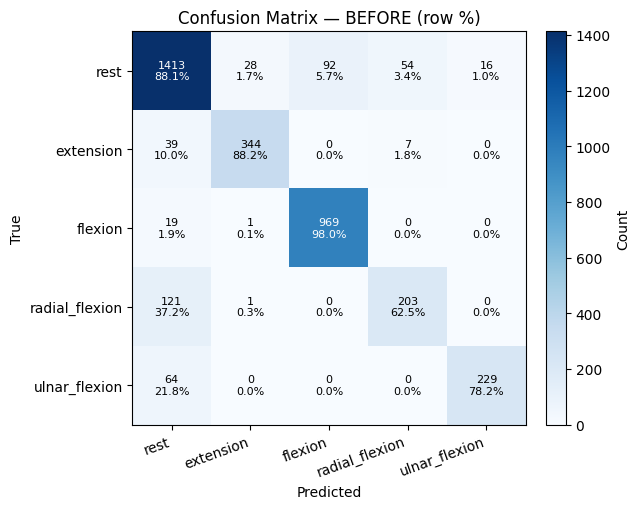

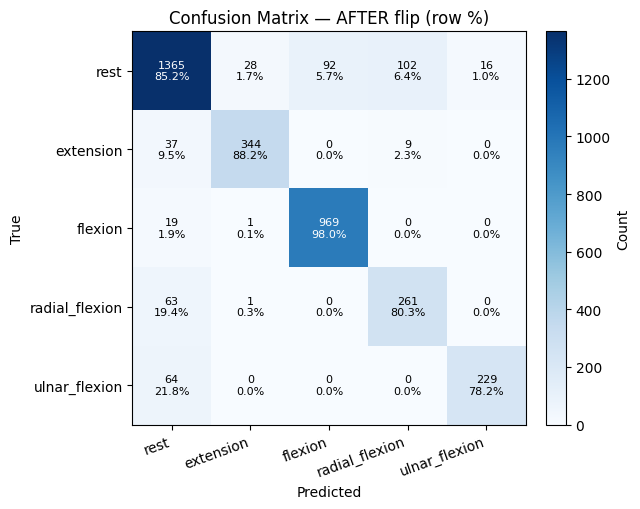

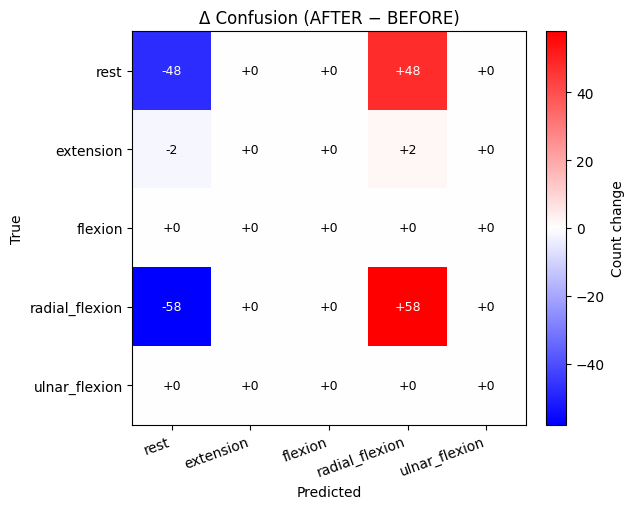

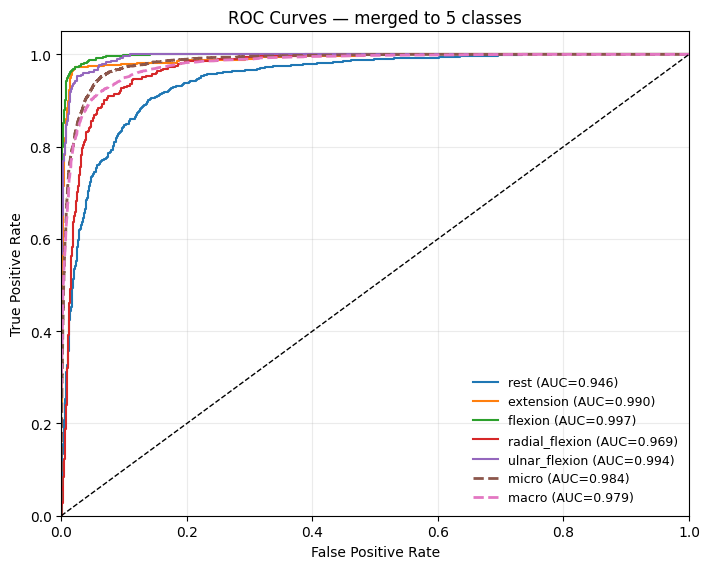

Expected Calibration Error (ECE): 0.0185


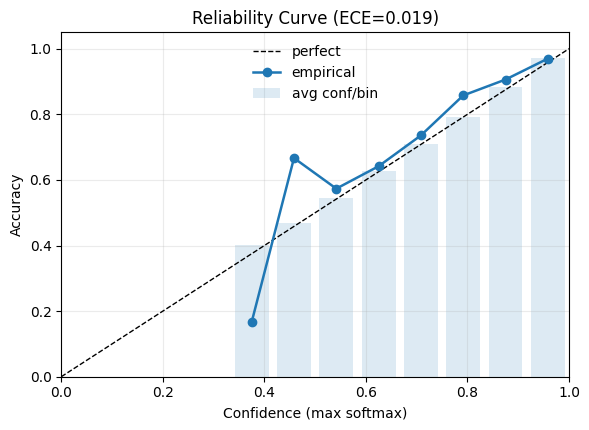

In [ ]:
# JUPYTER CELL — Post-process with fallback + NEW class merges (5 classes)

import numpy as np
import torch
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from sklearn.preprocessing import label_binarize


def plot_cm_with_percentages(cm, class_names, title="Confusion Matrix", normalize="row",
                             annotate="count+pct", fmt_pct="{:.1f}%", cmap="Blues"):
    """
    cm:           2D ndarray of counts (true rows x predicted cols)
    class_names:  list of names for axes ticks
    normalize:    None | "row" | "col" | "all"   -> how to compute percentages
    annotate:     "count+pct" | "pct" | "count"
    fmt_pct:      format for percentages (e.g., "{:.1f}%")
    """
    cm = np.asarray(cm)
    assert cm.ndim == 2 and cm.shape[0] == cm.shape[1], "cm must be square"
    K = cm.shape[0]

    # --- compute percentages ---
    if normalize is None:
        pct = cm.astype(float)
        denom = 1.0
    elif normalize == "row":
        denom = cm.sum(axis=1, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "col":
        denom = cm.sum(axis=0, keepdims=True).clip(min=1)
        pct = (cm / denom) * 100.0
    elif normalize == "all":
        denom = cm.sum().clip(min=1)
        pct = (cm / denom) * 100.0
    else:
        raise ValueError("normalize must be None | 'row' | 'col' | 'all'")

    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count")

    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K))
    ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)

    # dynamic text color for contrast
    thresh = cm.max() / 2.0 if cm.max() > 0 else 0.5

    for i in range(K):
        for j in range(K):
            txts = []
            if annotate in ("count", "count+pct"):
                txts.append(f"{cm[i, j]}")
            if annotate in ("pct", "count+pct"):
                txts.append(fmt_pct.format(pct[i, j]))
            s = "\n".join(txts)

            ax.text(j, i, s,
                    ha="center", va="center", fontsize=8,
                    color="white" if cm[i, j] > thresh else "black")

    fig.tight_layout()
    return fig, ax


# -----------------------------
# 0) Get probs/targets if needed
# -----------------------------
if "probs_t" not in globals() or "targets" not in globals():
    model.eval()
    all_logits, all_targets = [], []
    with torch.no_grad():
        for batch in test_loader:
            # support dict or tuple batches
            if isinstance(batch, (list, tuple)):
                x, y = batch[0], batch[1]
            else:
                x, y = batch["signal"], batch["label"]
            x = x.to(device, non_blocking=True)
            y = y.to(device, non_blocking=True)
            out = model(x)  # (B, num_classes=5)
            all_logits.append(out.detach().cpu())
            all_targets.append(y.detach().cpu())
    logits_t = torch.cat(all_logits, dim=0)
    probs_t  = torch.softmax(logits_t, dim=1)
    targets  = torch.cat(all_targets, dim=0).numpy()

probs_9 = probs_t.numpy()  # (N, 9) for original classes 0..8

# Optional: original class names fallback (match your 9-class training)
if "class_names" not in globals() or len(class_names) != probs_9.shape[1]:
    class_names = [
        "rest",                    # 0
        "mild_extension",          # 1
        "full_extension",          # 2
        "mild_flexion",            # 3
        "full_flexion",            # 4
        "mild_radial_flexion",     # 5
        "full_radial_flexion",     # 6
        "mild_ulnar_flexion",      # 7
        "full_ulnar_flexion",      # 8
    ]

# ------------------------------------------------------
# 1) Merge to 5 classes:
#    0: rest               <- rest(0) + mild_extension(1)
#    1: extension          <- full_extension(2)
#    2: flexion            <- mild_flexion(3) + full_flexion(4)
#    3: radial_flexion     <- mild_radial(5) + full_radial(6)
#    4: ulnar_flexion      <- mild_ulnar(7) + full_ulnar(8)
# ------------------------------------------------------
def merge_probs_9_to_5(p9: np.ndarray) -> np.ndarray:
    """
    0: rest            <- rest(0) + mild_ext(1) + mild_radial(5) + mild_ulnar(7)
    1: extension       <- full_ext(2)
    2: flexion         <- mild_flex(3) + full_flex(4)
    3: radial_flexion  <- full_radial(6)
    4: ulnar_flexion   <- full_ulnar(8)
    """
    assert p9.ndim == 2 and p9.shape[1] == 9, "Expected (N,9) probs from the 9-class model."
    out = np.zeros((p9.shape[0], 5), dtype=np.float32)
    out[:, 0] = p9[:, 0] + p9[:, 1] + p9[:, 5] + p9[:, 7]   # rest bucket
    out[:, 1] = p9[:, 2]                                   # full extension
    out[:, 2] = p9[:, 3] + p9[:, 4]                        # flexion = mild+full
    out[:, 3] = p9[:, 6]                                   # full radial only
    out[:, 4] = p9[:, 8]                                   # full ulnar only
    # Prob mass is preserved: rows still sum to ~1.0 (floating error aside).
    return out

def merge_labels_9_to_5(y9: np.ndarray) -> np.ndarray:
    """
    Map original hard labels to new 5-class scheme.
    """
    y5 = np.empty_like(y9)
    y5[y9 == 0] = 0   # rest -> rest
    y5[y9 == 1] = 0   # mild extension -> rest
    y5[y9 == 2] = 1   # full extension -> extension
    y5[y9 == 3] = 2   # mild flexion -> flexion
    y5[y9 == 4] = 2   # full flexion -> flexion
    y5[y9 == 5] = 0   # mild radial -> rest   (changed)
    y5[y9 == 6] = 3   # full radial -> radial_flexion
    y5[y9 == 7] = 0   # mild ulnar  -> rest   (changed)
    y5[y9 == 8] = 4   # full ulnar  -> ulnar_flexion
    return y5

probs_5   = merge_probs_9_to_5(probs_9)
targets_5 = merge_labels_9_to_5(targets)

new_class_names = ["rest", "extension", "flexion", "radial_flexion", "ulnar_flexion"]
num_new = 5

# ----------------------------------------------------------
# 2) Confidence fallback: if max_prob < 0.6, predict "rest"
# ----------------------------------------------------------
CONF_THRESH = 0.5
max_prob = probs_5.max(axis=1)
pred_5 = probs_5.argmax(axis=1)
pred_5[max_prob < CONF_THRESH] = 0  # fallback to rest

# ----------------------------------------------------------
# 3) Metrics: original vs. post-hoc flip (rest -> radial if p_rad >= τ*)
# ----------------------------------------------------------
from sklearn.metrics import confusion_matrix, classification_report, f1_score

K = len(new_class_names)
idx_rest = new_class_names.index("rest")
idx_rad  = new_class_names.index("radial_flexion")

y_true = targets_5
y_pred_base = pred_5.copy()
p_rad = probs_5[:, idx_rad]

def apply_flip(y_pred, pr_rad, tau):
    y_new = y_pred.copy()
    mask = (y_pred == idx_rest) & (pr_rad >= tau)
    y_new[mask] = idx_rad
    return y_new, int(mask.sum())

# ---- choose τ* to maximize F1 for radial_flexion on this set ----
taus = np.linspace(0.0, 1.0, 201)
best_tau, best_f1 = 0.0, -1.0
for tau in taus:
    y_try, _ = apply_flip(y_pred_base, p_rad, tau)
    f1_rad = f1_score(y_true == idx_rad, y_try == idx_rad, zero_division=0)
    if f1_rad > best_f1:
        best_tau, best_f1 = float(tau), float(f1_rad)

y_pred_after, n_flipped = apply_flip(y_pred_base, p_rad, best_tau)

def acc(yhat): return float(np.mean(yhat == y_true))

def report_block(title, yhat):
    cm = confusion_matrix(y_true, yhat, labels=np.arange(K))
    print("\n" + title)
    print("Confusion matrix (rows=true, cols=pred):\n", cm)
    print(classification_report(
        y_true, yhat, labels=np.arange(K), target_names=new_class_names, digits=3
    ))
    return cm

print(f"Selected τ* = {best_tau:.3f}  (max radial_flexion F1 = {best_f1:.4f})")
print(f"Flipped {n_flipped} predictions from 'rest' -> 'radial_flexion'.")

cm_before = report_block("BEFORE (original predictions)", y_pred_base)
cm_after  = report_block("AFTER  (with flip rule)",      y_pred_after)

acc_before, acc_after = acc(y_pred_base), acc(y_pred_after)
print(f"\nOverall accuracy: {acc_before:.4f} -> {acc_after:.4f} (Δ={acc_after-acc_before:+.4f})")

# Compact precision/recall for radial_flexion
def pr_recall(yhat, cls):
    tp = np.sum((y_true == cls) & (yhat == cls))
    fp = np.sum((y_true != cls) & (yhat == cls))
    fn = np.sum((y_true == cls) & (yhat != cls))
    prec = tp/(tp+fp) if (tp+fp) else 0.0
    rec  = tp/(tp+fn) if (tp+fn) else 0.0
    return prec, rec
p_b, r_b = pr_recall(y_pred_base, idx_rad)
p_a, r_a = pr_recall(y_pred_after, idx_rad)
print(f"radial_flexion  Precision: {p_b:.3f} -> {p_a:.3f} | Recall: {r_b:.3f} -> {r_a:.3f}")

# ---- Plots: before & after CMs with percentages ----
_ = plot_cm_with_percentages(
    cm_before, new_class_names,
    title="Confusion Matrix — BEFORE (row %)",
    normalize="row", annotate="count+pct", fmt_pct="{:.1f}%"
)
plt.show()

_ = plot_cm_with_percentages(
    cm_after, new_class_names,
    title="Confusion Matrix — AFTER flip (row %)",
    normalize="row", annotate="count+pct", fmt_pct="{:.1f}%"
)
plt.show()

# ---- Optional: Δ-CM (after - before) heatmap to visualize changes ----
def plot_cm_delta(cm_after, cm_before, class_names, title="Δ Confusion (after - before)"):
    delta = cm_after.astype(int) - cm_before.astype(int)
    vmax = np.max(np.abs(delta))
    vmax = max(vmax, 1)
    fig, ax = plt.subplots(figsize=(6.6, 5.2))
    im = ax.imshow(delta, interpolation='nearest', cmap='bwr', vmin=-vmax, vmax=+vmax)
    ax.set_title(title)
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label("Count change")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")
    ax.set_xticks(range(K)); ax.set_yticks(range(K))
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_yticklabels(class_names)
    for i in range(K):
        for j in range(K):
            val = delta[i, j]
            ax.text(j, i, f"{val:+d}", ha="center", va="center",
                    color="white" if abs(val) > vmax*0.6 else "black", fontsize=9)
    fig.tight_layout()
    return fig, ax

_ = plot_cm_delta(cm_after, cm_before, new_class_names,
                  title="Δ Confusion (AFTER − BEFORE)")
plt.show()

# ----------------------------------------------------------
# 4) ROC curves (one-vs-rest) + AUC using merged probs (5c)
# ----------------------------------------------------------
y_true_bin = label_binarize(targets_5, classes=list(range(num_new)))

fpr, tpr, roc_auc = {}, {}, {}
for c in range(num_new):
    fpr[c], tpr[c], _ = roc_curve(y_true_bin[:, c], probs_5[:, c])
    roc_auc[c] = auc(fpr[c], tpr[c])

# micro-average
fpr["micro"], tpr["micro"], _ = roc_curve(y_true_bin.ravel(), probs_5.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# macro-average
all_fpr = np.unique(np.concatenate([fpr[c] for c in range(num_new)]))
mean_tpr = np.zeros_like(all_fpr)
for c in range(num_new):
    mean_tpr += np.interp(all_fpr, fpr[c], tpr[c])
mean_tpr /= num_new
fpr["macro"], tpr["macro"] = all_fpr, mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure(figsize=(7.2, 5.8))
for c in range(num_new):
    plt.plot(fpr[c], tpr[c], lw=1.5, label=f"{new_class_names[c]} (AUC={roc_auc[c]:.3f})")
plt.plot(fpr["micro"], tpr["micro"], linestyle='--', lw=2.0, label=f"micro (AUC={roc_auc['micro']:.3f})")
plt.plot(fpr["macro"], tpr["macro"], linestyle='--', lw=2.0, label=f"macro (AUC={roc_auc['macro']:.3f})")
plt.plot([0,1],[0,1],'k--', lw=1)
plt.xlim([0,1]); plt.ylim([0,1.05])
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curves — merged to 5 classes")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False, fontsize=9, loc="lower right")
plt.tight_layout()
plt.show()

# ----------------------------------------------------------
# 5) Reliability (ECE) with post-processed predictions
# ----------------------------------------------------------
def expected_calibration_error(conf, correct, n_bins=15):
    bin_edges = np.linspace(0.0, 1.0, n_bins+1)
    ece = 0.0
    bin_acc, bin_conf, bin_counts = [], [], []
    for b in range(n_bins):
        lo, hi = bin_edges[b], bin_edges[b+1]
        mask = (conf >= lo) & (conf < hi) if b < n_bins-1 else (conf >= lo) & (conf <= hi)
        if mask.sum() == 0:
            bin_acc.append(np.nan); bin_conf.append(np.nan); bin_counts.append(0)
            continue
        acc_b = correct[mask].mean()
        conf_b = conf[mask].mean()
        w = mask.mean()
        ece += w * abs(acc_b - conf_b)
        bin_acc.append(acc_b); bin_conf.append(conf_b); bin_counts.append(int(mask.sum()))
    return float(ece), bin_edges, np.array(bin_acc), np.array(bin_conf), np.array(bin_counts)

top_conf = probs_5.max(axis=1)
correct  = (pred_5 == targets_5)
ece, edges, b_acc, b_conf, b_n = expected_calibration_error(top_conf, correct, n_bins=12)

print(f"Expected Calibration Error (ECE): {ece:.4f}")

centers = 0.5*(edges[:-1] + edges[1:])
plt.figure(figsize=(6.0, 4.4))
plt.plot([0,1], [0,1], 'k--', lw=1, label="perfect")
plt.plot(centers[~np.isnan(b_acc)], b_acc[~np.isnan(b_acc)], marker='o', lw=1.8, label="empirical")
plt.bar(centers, b_conf, width=(edges[1]-edges[0])*0.8, alpha=0.15, align='center', label="avg conf/bin")
plt.xlim(0,1); plt.ylim(0,1.05)
plt.xlabel("Confidence (max softmax)")
plt.ylabel("Accuracy")
plt.title(f"Reliability Curve (ECE={ece:.3f})")
plt.grid(True, alpha=0.25)
plt.legend(frameon=False)
plt.tight_layout()
plt.show()


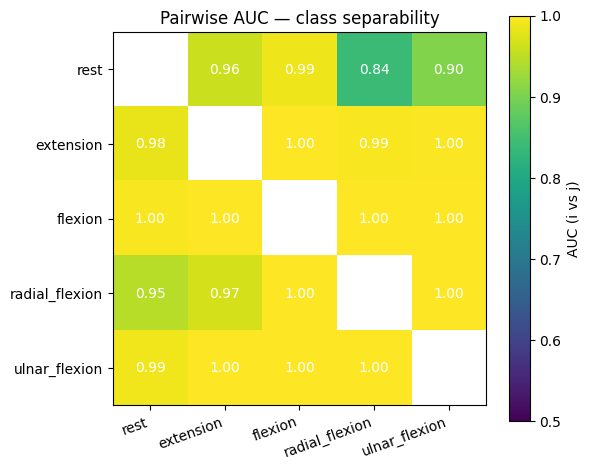

In [32]:
from sklearn.metrics import roc_auc_score
import numpy as np
import matplotlib.pyplot as plt

K = probs_5.shape[1]
pair_auc = np.zeros((K, K))
for i in range(K):
    for j in range(K):
        if i == j: 
            pair_auc[i, j] = np.nan
            continue
        # take only samples with true ∈ {i, j}
        mask = (targets_5 == i) | (targets_5 == j)
        if mask.sum() < 2:
            pair_auc[i, j] = np.nan
            continue
        y_true_ij = (targets_5[mask] == i).astype(int)
        y_score_ij = probs_5[mask, i]
        pair_auc[i, j] = roc_auc_score(y_true_ij, y_score_ij)

fig, ax = plt.subplots(figsize=(6,5))
im = ax.imshow(pair_auc, vmin=0.5, vmax=1.0, cmap="viridis")
plt.colorbar(im, ax=ax, label="AUC (i vs j)")
ax.set_xticks(range(K)); ax.set_yticks(range(K))
ax.set_xticklabels(new_class_names, rotation=20, ha='right')
ax.set_yticklabels(new_class_names)
ax.set_title("Pairwise AUC — class separability")
for i in range(K):
    for j in range(K):
        if not np.isnan(pair_auc[i,j]):
            ax.text(j, i, f"{pair_auc[i,j]:.2f}", ha="center", va="center", color="white")
plt.tight_layout(); plt.show()


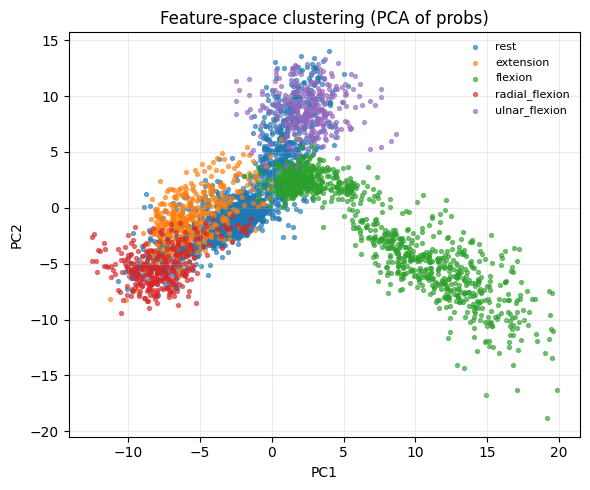

In [35]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = probs_5  # or logits_t.numpy()
y = targets_5

# Option 1: PCA for global structure
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X_logits = logits_t.numpy()
X_pca = PCA(n_components=2).fit_transform(X_logits)
# (then plot as before)

# Option 2: t-SNE for local separability
# X_pca = TSNE(n_components=2, perplexity=30, random_state=0).fit_transform(X)

plt.figure(figsize=(6,5))
for i, name in enumerate(new_class_names):
    mask = y == i
    plt.scatter(X_pca[mask,0], X_pca[mask,1], s=8, alpha=0.6, label=name)
plt.legend(frameon=False, fontsize=8)
plt.title("Feature-space clustering (PCA of probs)")
plt.xlabel("PC1"); plt.ylabel("PC2"); plt.grid(alpha=0.25)
plt.tight_layout(); plt.show()


In [34]:
def fisher_ratio(X, y):
    classes = np.unique(y)
    means = np.array([X[y==c].mean(0) for c in classes])
    cov_w = np.zeros((X.shape[1], X.shape[1]))
    for c in classes:
        Xc = X[y==c]
        cov_w += np.cov(Xc, rowvar=False) * (len(Xc)-1)
    cov_w /= (len(X)-len(classes))
    overall_mean = X.mean(0)
    cov_b = np.zeros_like(cov_w)
    for c, m in zip(classes, means):
        n_c = (y==c).sum()
        diff = (m - overall_mean).reshape(-1,1)
        cov_b += n_c * diff @ diff.T
    return np.trace(cov_b) / np.trace(cov_w)

print(f"Global Fisher separability index: {fisher_ratio(probs_5, targets_5):.3f}")


Global Fisher separability index: 13036.901


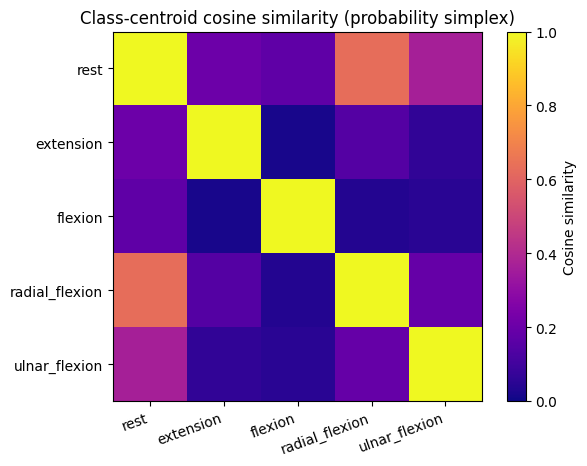

In [36]:
from sklearn.preprocessing import normalize
means = np.array([probs_5[targets_5==i].mean(0) for i in range(num_new)])
cos = means @ means.T
cos /= np.linalg.norm(means,axis=1,keepdims=True) @ np.linalg.norm(means,axis=1,keepdims=True).T

plt.imshow(cos, vmin=0, vmax=1, cmap="plasma")
plt.colorbar(label="Cosine similarity")
plt.xticks(range(num_new), new_class_names, rotation=20, ha='right')
plt.yticks(range(num_new), new_class_names)
plt.title("Class-centroid cosine similarity (probability simplex)")
plt.show()


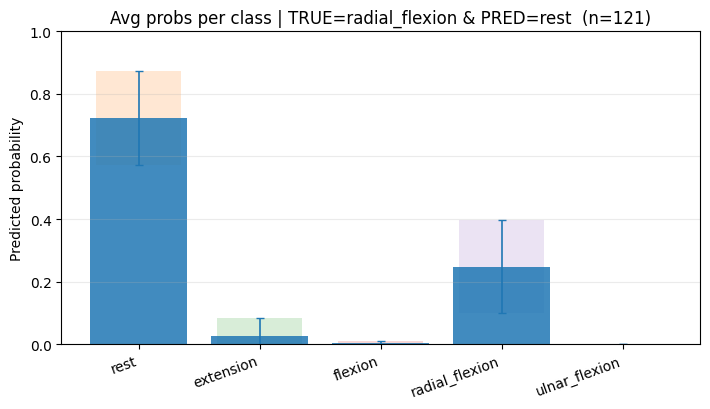

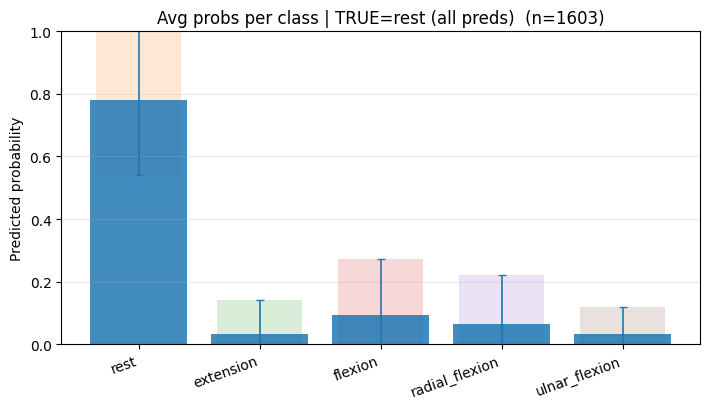

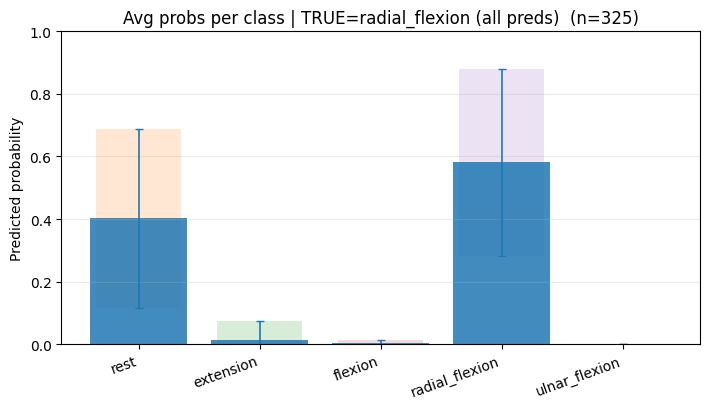

A mean probs: [0.724 0.025 0.003 0.248 0.   ]
B mean probs: [0.779 0.032 0.094 0.063 0.031]
C mean probs: [0.402 0.014 0.002 0.581 0.   ]


In [27]:
# JUPYTER CELL — Class-wise confidence histograms with mean ± std bands

import numpy as np
import matplotlib.pyplot as plt

# --- Safety checks / lookups ---
assert 'probs_5' in globals(), "Expected probs_5 of shape (N, 5)."
assert 'targets_5' in globals(), "Expected targets_5 of shape (N,)."
assert 'pred_5' in globals(), "Expected pred_5 of shape (N,)."
assert 'new_class_names' in globals(), "Expected new_class_names list."
K = probs_5.shape[1]
assert K == len(new_class_names), "new_class_names must match probs_5.shape[1]."

# Map convenient indices
idx_rest = new_class_names.index("rest")
idx_rad  = new_class_names.index("radial_flexion")

def subset_stats(mask: np.ndarray):
    """
    mask: boolean array over samples
    Returns: mean (K,), std (K,), n (int)
    """
    mask = np.asarray(mask, dtype=bool)
    n = int(mask.sum())
    if n == 0:
        return None, None, 0
    sub = probs_5[mask]  # (n, K)
    mu  = sub.mean(axis=0)
    sd  = sub.std(axis=0, ddof=0)
    return mu, sd, n

def plot_mean_std_bar(mu, sd, class_names, title, n, ylim=(0,1.0)):
    """
    Bar plot of mean probs with shaded std region.
    Uses bars for mean and a translucent band for ±1 STD.
    """
    x = np.arange(len(class_names))
    fig, ax = plt.subplots(figsize=(7.2, 4.2))
    bars = ax.bar(x, mu, alpha=0.85)
    # Draw a shaded band around the top of each bar to visualize std
    # (centered at mu with vertical span ±sd). Also draw error caps for clarity.
    ax.errorbar(x, mu, yerr=sd, fmt='none', elinewidth=1.2, capsize=3)
    for xi, m, s in zip(x, mu, sd):
        ax.fill_between([xi-0.35, xi+0.35],
                        [max(0.0, m - s), max(0.0, m - s)],
                        [min(1.0, m + s), min(1.0, m + s)],
                        alpha=0.18, zorder=0)

    ax.set_xticks(x)
    ax.set_xticklabels(class_names, rotation=20, ha='right')
    ax.set_ylim(*ylim)
    ax.set_ylabel("Predicted probability")
    ax.set_title(f"{title}  (n={n})")
    ax.grid(axis='y', alpha=0.25)
    fig.tight_layout()
    plt.show()

# -----------------------------
# (A) True = radial_flexion, Predicted = rest
# -----------------------------
mask_A = (targets_5 == idx_rad) & (pred_5 == idx_rest)
mu_A, sd_A, n_A = subset_stats(mask_A)
if n_A == 0:
    print("No samples where true=radial_flexion and predicted=rest.")
else:
    plot_mean_std_bar(mu_A, sd_A, new_class_names,
                      title="Avg probs per class | TRUE=radial_flexion & PRED=rest",
                      n=n_A)

# -----------------------------
# (B) True = rest (all predictions)
# -----------------------------
mask_B = (targets_5 == idx_rest)
mu_B, sd_B, n_B = subset_stats(mask_B)
if n_B == 0:
    print("No samples with true=rest.")
else:
    plot_mean_std_bar(mu_B, sd_B, new_class_names,
                      title="Avg probs per class | TRUE=rest (all preds)",
                      n=n_B)

# -----------------------------
# (C) True = radial_flexion (all predictions)
# -----------------------------
mask_C = (targets_5 == idx_rad)
mu_C, sd_C, n_C = subset_stats(mask_C)
if n_C == 0:
    print("No samples with true=radial_flexion.")
else:
    plot_mean_std_bar(mu_C, sd_C, new_class_names,
                      title="Avg probs per class | TRUE=radial_flexion (all preds)",
                      n=n_C)

# -----------------------------
# Quick sanity check (optional):
# Print means for A/B/C for inspection
# -----------------------------
if n_A: print("A mean probs:", np.round(mu_A, 3))
if n_B: print("B mean probs:", np.round(mu_B, 3))
if n_C: print("C mean probs:", np.round(mu_C, 3))


In [15]:
# JUPYTER CELL — Post-hoc flip: rest -> radial_flexion if p(radial) >= τ

import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, f1_score

assert 'probs_5' in globals() and 'targets_5' in globals() and 'pred_5' in globals()
assert 'new_class_names' in globals()

K = probs_5.shape[1]
idx_rest = new_class_names.index("rest")
idx_rad  = new_class_names.index("radial_flexion")

y_true = targets_5
y_pred_base = pred_5.copy()
p_rad = probs_5[:, idx_rad]

# --- Evaluate a sweep of thresholds to pick τ that maximizes F1 for the radial_flexion class ---
taus = np.linspace(0.0, 1.0, 201)
best = {"tau": 0.0, "f1": -1.0}

def apply_flip(y_pred, p_rad, tau):
    y_new = y_pred.copy()
    mask = (y_pred == idx_rest) & (p_rad >= tau)
    y_new[mask] = idx_rad
    return y_new, mask.sum()

for tau in taus:
    y_try, _ = apply_flip(y_pred_base, p_rad, tau)
    f1_rad = f1_score(y_true == idx_rad, y_try == idx_rad, zero_division=0)
    if f1_rad > best["f1"]:
        best.update({"tau": float(tau), "f1": float(f1_rad)})

tau_star = best["tau"]
print(f"Selected τ* = {tau_star:.3f} (max radial_flexion F1 = {best['f1']:.4f})")

# --- Apply the best τ and report before/after ---
y_pred_after, n_flipped = apply_flip(y_pred_base, p_rad, tau_star)
print(f"Flipped {n_flipped} predictions from 'rest' -> 'radial_flexion'.")

def report(title, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.arange(K))
    print("\n" + title)
    print("Confusion matrix (rows=true, cols=pred):\n", cm)
    print(classification_report(
        y_true, y_pred, labels=np.arange(K), target_names=new_class_names, digits=3
    ))
    return cm

cm_before = report("BEFORE (original predictions)", y_pred_base)
cm_after  = report("AFTER  (with flip rule)",      y_pred_after)

# Optional: quick deltas on key numbers
acc_before = np.mean(y_pred_base == y_true)
acc_after  = np.mean(y_pred_after == y_true)
print(f"\nOverall accuracy: {acc_before:.4f} -> {acc_after:.4f} (Δ={acc_after-acc_before:+.4f})")

# Radial-specific precision/recall for a compact readout
def pr_recall(y_true, y_pred, cls):
    tp = np.sum((y_true == cls) & (y_pred == cls))
    fp = np.sum((y_true != cls) & (y_pred == cls))
    fn = np.sum((y_true == cls) & (y_pred != cls))
    prec = tp / (tp + fp) if (tp+fp) else 0.0
    rec  = tp / (tp + fn) if (tp+fn) else 0.0
    return prec, rec

p_b, r_b = pr_recall(y_true, y_pred_base, idx_rad)
p_a, r_a = pr_recall(y_true, y_pred_after, idx_rad)
print(f"radial_flexion  Precision: {p_b:.3f} -> {p_a:.3f} | Recall: {r_b:.3f} -> {r_a:.3f}")

# (Optional) quick sanity print using your earlier aggregates if present
if 'mu_A' in globals():
    print("Sanity—mean probs A (radial->rest errors):", np.round(mu_A, 3))


Selected τ* = 0.295 (max radial_flexion F1 = 0.7511)
Flipped 102 predictions from 'rest' -> 'radial_flexion'.

BEFORE (original predictions)
Confusion matrix (rows=true, cols=pred):
 [[1391   32  108   55   17]
 [  36  346    0    8    0]
 [  17    1  971    0    0]
 [ 119    1    0  205    0]
 [  58    0    0    0  235]]
                precision    recall  f1-score   support

          rest      0.858     0.868     0.863      1603
     extension      0.911     0.887     0.899       390
       flexion      0.900     0.982     0.939       989
radial_flexion      0.765     0.631     0.691       325
 ulnar_flexion      0.933     0.802     0.862       293

      accuracy                          0.874      3600
     macro avg      0.873     0.834     0.851      3600
  weighted avg      0.873     0.874     0.872      3600


AFTER  (with flip rule)
Confusion matrix (rows=true, cols=pred):
 [[1345   32  108  101   17]
 [  36  346    0    8    0]
 [  17    1  971    0    0]
 [  63    1    0  

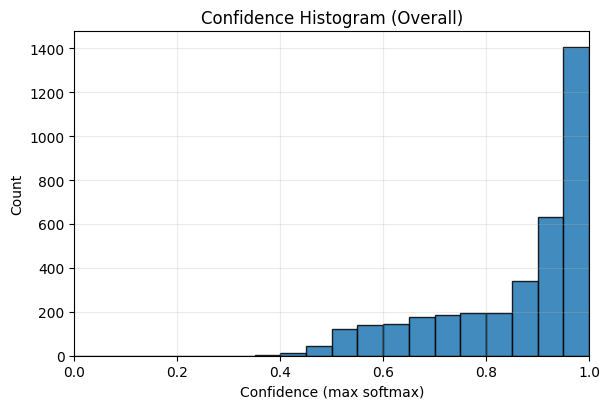

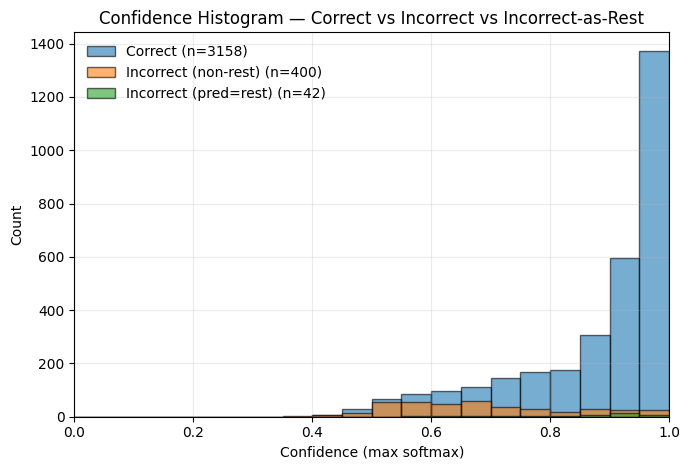

In [13]:
# ----------------------------------------------------------
# 6) Confidence histograms (overall + correct vs incorrect + incorrect_as_rest)
# ----------------------------------------------------------
bins = np.linspace(0.0, 1.0, 21)  # 20 bins from 0 to 1

# Overall
plt.figure(figsize=(6.2, 4.2))
plt.hist(top_conf, bins=bins, alpha=0.85, edgecolor="black")
plt.xlabel("Confidence (max softmax)")
plt.ylabel("Count")
plt.title("Confidence Histogram (Overall)")
plt.xlim(0, 1)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()

# Identify incorrect samples where the model predicted "rest"
# Assuming rest = class index 0
incorrect_as_rest = (~correct) & (preds == 0)

# Split by correctness + special case
plt.figure(figsize=(7.0, 4.8))
plt.hist(
    top_conf[correct],
    bins=bins,
    alpha=0.6,
    label=f"Correct (n={int(correct.sum())})",
    edgecolor="black",
)
plt.hist(
    top_conf[~correct & ~incorrect_as_rest],
    bins=bins,
    alpha=0.6,
    label=f"Incorrect (non-rest) (n={int((~correct & ~incorrect_as_rest).sum())})",
    edgecolor="black",
)
plt.hist(
    top_conf[incorrect_as_rest],
    bins=bins,
    alpha=0.6,
    label=f"Incorrect (pred=rest) (n={int(incorrect_as_rest.sum())})",
    edgecolor="black",
)

plt.xlabel("Confidence (max softmax)")
plt.ylabel("Count")
plt.title("Confidence Histogram — Correct vs Incorrect vs Incorrect-as-Rest")
plt.xlim(0, 1)
plt.legend(frameon=False)
plt.grid(True, alpha=0.25)
plt.tight_layout()
plt.show()


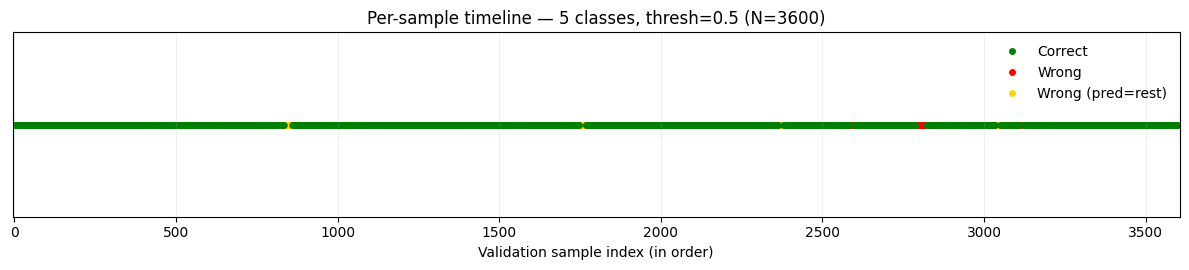

In [14]:
# === Timeline of per-sample predictions (5 merged classes, thresh=0.6) ===
import numpy as np
import torch
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# If you already ran the merge + threshold code above, we can reuse:
#   probs_9, probs_5, targets_5, pred_5, max_prob, new_class_names, CONF_THRESH
# If not, uncomment the quick recompute below.

# --- QUICK RECOMPUTE (uncomment if needed) ---
# calibrated_model_5.eval()
# all_logits, all_targets = [], []
# with torch.no_grad():
#     for batch in val_loader:  # DataLoader should be shuffle=False to keep order
#         x = batch["signal"] if isinstance(batch, dict) else batch[0]
#         y = batch["label"]  if isinstance(batch, dict) else batch[1]
#         out = calibrated_model_5(x.to(device, non_blocking=True))
#         all_logits.append(out.detach().cpu())
#         all_targets.append(y.detach().cpu())
# logits_t = torch.cat(all_logits, dim=0)
# probs_9  = torch.softmax(logits_t, dim=1).numpy()
# def merge_probs_9_to_5(p9):
#     out = np.zeros((p9.shape[0], 5), dtype=np.float32)
#     out[:, 0] = p9[:, 0] + p9[:, 1]
#     out[:, 1] = p9[:, 2]
#     out[:, 2] = p9[:, 3] + p9[:, 4]
#     out[:, 3] = p9[:, 5] + p9[:, 6]
#     out[:, 4] = p9[:, 7] + p9[:, 8]
#     return out
# def merge_labels_9_to_5(y9):
#     y5 = np.empty_like(y9)
#     y5[y9 == 0] = 0; y5[y9 == 1] = 0
#     y5[y9 == 2] = 1
#     y5[y9 == 3] = 2; y5[y9 == 4] = 2
#     y5[y9 == 5] = 3; y5[y9 == 6] = 3
#     y5[y9 == 7] = 4; y5[y9 == 8] = 4
#     return y5
# probs_5 = merge_probs_9_to_5(probs_9)
# targets_5 = merge_labels_9_to_5(torch.cat(all_targets, dim=0).numpy())
# CONF_THRESH = 0.75
# max_prob = probs_5.max(axis=1)
# pred_5 = probs_5.argmax(axis=1)
# pred_5[max_prob < CONF_THRESH] = 0  # fallback to "rest"
# new_class_names = ["rest", "extension", "flexion", "radial_flexion", "ulnar_flexion"]

# --- Build timeline colors ---
N = len(targets_5)
x = np.arange(N)  # one dot per validation window in the order seen

correct_mask = (pred_5 == targets_5)
wrong_mask   = ~correct_mask
wrong_rest_mask = wrong_mask & (pred_5 == 0)  # predicted "rest" but incorrect
wrong_nonrest_mask = wrong_mask & (pred_5 != 0)

# Plot
plt.figure(figsize=(12, 2.8))
# yellow first so it doesn't get covered
plt.scatter(x[wrong_rest_mask], np.zeros(wrong_rest_mask.sum()), s=14, c="gold",  marker="o", label="Wrong (pred=rest)")
plt.scatter(x[wrong_nonrest_mask], np.zeros(wrong_nonrest_mask.sum()), s=14, c="red",   marker="o", label="Wrong")
plt.scatter(x[correct_mask], np.zeros(correct_mask.sum()),       s=14, c="green", marker="o", label="Correct")

# Styling
plt.yticks([])  # hide y-axis; this is a timeline
plt.ylim(-0.6, 0.6)
plt.xlim(-5, N + 5)
plt.xlabel("Validation sample index (in order)")
plt.title(f"Per-sample timeline — 5 classes, thresh={CONF_THRESH} (N={N})")

# Legend with custom handles (consistent colors)
handles = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='green', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Wrong', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Wrong (pred=rest)', markerfacecolor='gold', markersize=6),
]
plt.legend(handles=handles, loc="upper right", frameon=False)
plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()


Total samples: 3600
Total wrong samples: 442
Number of wrong segments: 122
Avg wrong-segment length: 3.62  |  Median: 2.00  |  Max: 31

Top-10 longest wrong segments (start -> end, length | rest/non-rest | mean_conf):
   2791 -> 2821  | len= 31 | rest=  0, non-rest= 31 | mean_conf=0.855
    834 -> 859   | len= 26 | rest= 26, non-rest=  0 | mean_conf=0.775
   1748 -> 1766  | len= 19 | rest= 19, non-rest=  0 | mean_conf=0.882
   3035 -> 3049  | len= 15 | rest= 15, non-rest=  0 | mean_conf=0.864
   2363 -> 2376  | len= 14 | rest= 14, non-rest=  0 | mean_conf=0.853
   2585 -> 2597  | len= 13 | rest=  0, non-rest= 13 | mean_conf=0.859
   3112 -> 3123  | len= 12 | rest=  9, non-rest=  3 | mean_conf=0.787
    816 -> 825   | len= 10 | rest= 10, non-rest=  0 | mean_conf=0.696
   2529 -> 2536  | len=  8 | rest=  8, non-rest=  0 | mean_conf=0.704
   2880 -> 2887  | len=  8 | rest=  8, non-rest=  0 | mean_conf=0.755


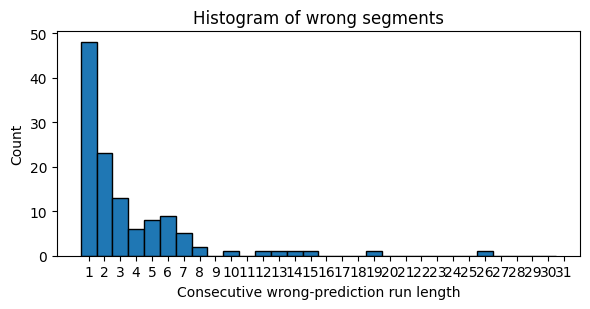

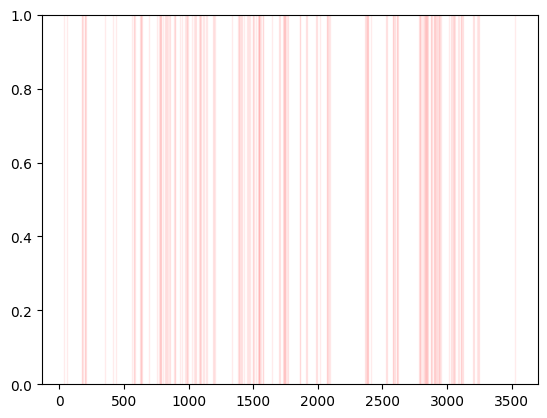

In [15]:
# === Find consecutive segments of wrong predictions (5-class setup) ===
import numpy as np
import matplotlib.pyplot as plt

# Assumes you already have:
#   targets_5  : (N,) ndarray of true labels after merging to 5 classes
#   pred_5     : (N,) ndarray of predicted labels after threshold fallback
#   max_prob   : (N,) ndarray of top-1 confidences (optional; used for extra stats)
# If not, run the earlier cell that builds them.

wrong = (pred_5 != targets_5).astype(np.int8)
N = len(wrong)

segments = []  # each: dict(start, end, length, n_rest_pred, n_nonrest_pred, mean_conf)
i = 0
while i < N:
    if wrong[i] == 1:
        j = i + 1
        while j < N and wrong[j] == 1:
            j += 1
        # segment is [i, j-1]
        seg_slice = slice(i, j)
        seg_len = j - i
        n_rest_pred = int(np.sum(pred_5[seg_slice] == 0))
        n_nonrest_pred = seg_len - n_rest_pred
        mean_conf = float(np.mean(max_prob[seg_slice])) if "max_prob" in globals() else np.nan
        segments.append({
            "start": i,
            "end": j - 1,
            "length": seg_len,
            "n_rest_pred": n_rest_pred,
            "n_nonrest_pred": n_nonrest_pred,
            "mean_conf": mean_conf,
        })
        i = j
    else:
        i += 1

# --- Print a compact summary ---
total_wrong = int(wrong.sum())
print(f"Total samples: {N}")
print(f"Total wrong samples: {total_wrong}")
print(f"Number of wrong segments: {len(segments)}")
if segments:
    lengths = np.array([s["length"] for s in segments])
    print(f"Avg wrong-segment length: {lengths.mean():.2f}  |  Median: {np.median(lengths):.2f}  |  Max: {lengths.max()}")

    # Show top-10 longest segments
    print("\nTop-10 longest wrong segments (start -> end, length | rest/non-rest | mean_conf):")
    for s in sorted(segments, key=lambda r: r["length"], reverse=True)[:10]:
        print(f"  {s['start']:>5} -> {s['end']:<5} | len={s['length']:>3} | rest={s['n_rest_pred']:>3}, non-rest={s['n_nonrest_pred']:>3} | mean_conf={s['mean_conf']:.3f}")
else:
    print("No wrong segments found.")

# --- Optional: histogram of wrong-segment lengths ---
if segments:
    plt.figure(figsize=(6, 3.2))
    plt.hist([s["length"] for s in segments], bins=np.arange(1, max(2, max(lengths)+1)) - 0.5, edgecolor="k")
    plt.xlabel("Consecutive wrong-prediction run length")
    plt.ylabel("Count")
    plt.title("Histogram of wrong segments")
    plt.xticks(range(1, int(lengths.max())+1))
    plt.tight_layout()
    plt.show()
# --- (Optional) overlay wrong segments as translucent bands on the timeline plot ---
# Reuse the same x = np.arange(N) timeline; run after you draw the dots.
for s in segments:
    plt.axvspan(s["start"]-0.5, s["end"]+0.5, color="red", alpha=0.08)
plt.draw()


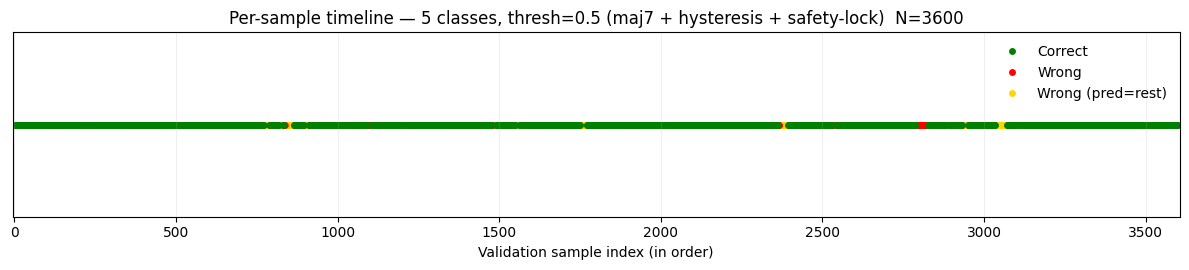

After safety filter: wrong=477/3600 (13.25%) | rest-wrong=304 | nonrest-wrong=173

Confusion matrix on filtered predictions
Overall error: 13.25%  (accuracy 86.75%)
   0 rest               err=  8.48%  (support=1603)
   1 extension          err= 15.13%  (support=390)
   2 flexion            err=  5.76%  (support=989)
   3 radial_flexion     err= 44.92%  (support=325)
   4 ulnar_flexion      err= 26.96%  (support=293)


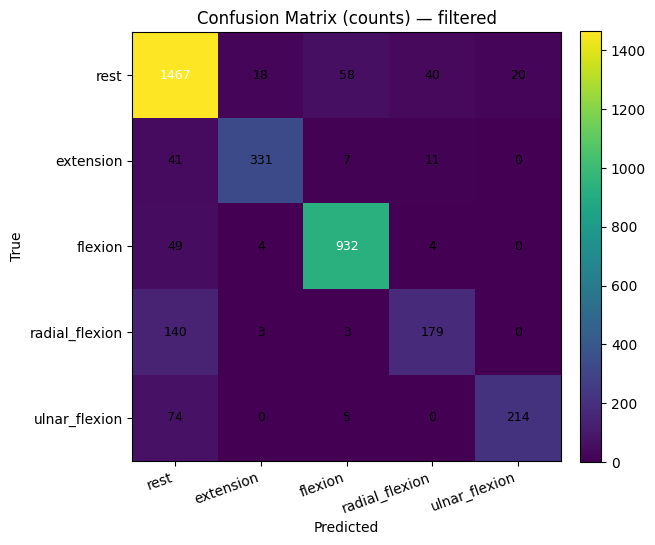

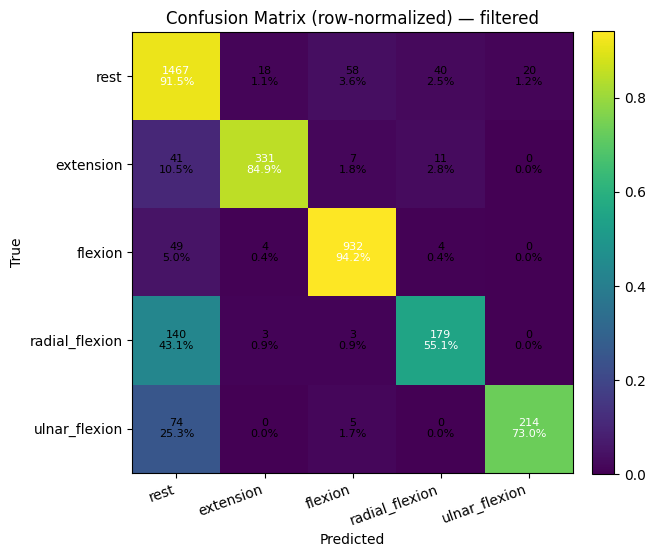

In [16]:
from collections import deque, Counter
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

def mode(items):
    if not items: return 0
    return Counter(items).most_common(1)[0][0]

def temporal_filter_safe(
    base_pred, conf,
    m_vote=7,             # majority-vote window (smooths noise)
    k_on=3,               # enter/switch to active after k_on consecutive votes
    k_off=4,              # return to rest after k_off consecutive rest votes
    conf_on=0.75,         # mean confidence needed during k_on streak
    # --- NEW instability gate ---
    switch_window=9,      # lookback window to detect fast changes
    max_switches=2,       # if #label switches in window >= this --> force rest
    min_unique_nonrest=2, # require at least this many distinct non-rest labels
    lockout_len=6         # force REST for this many frames once triggered
):
    """
    Majority vote + hysteresis + instability safety gate.
    If recent predictions switch rapidly across several non-rest classes, we enter
    a REST lockout for `lockout_len` frames to stay safe.
    """
    N = len(base_pred)
    out = np.zeros(N, dtype=np.int64)

    vote_buf = deque(maxlen=m_vote)
    look_buf = deque(maxlen=switch_window)

    curr = 0
    streak_label = None
    streak_len = 0
    streak_conf_sum = 0.0

    rest_lock = 0  # remaining frames of forced REST

    for i in range(N):
        # 1) update buffers
        vote_buf.append(int(base_pred[i]))
        voted = mode(list(vote_buf))
        look_buf.append(int(base_pred[i]))  # NOTE: using raw base_pred for instability sensing
        c = float(conf[i])

        # 2) instability detector (counts switches & unique non-rest labels)
        if len(look_buf) >= 2:
            lb = list(look_buf)
            switches = sum(lb[j] != lb[j-1] for j in range(1, len(lb)))
            uniq_nonrest = {u for u in set(lb) if u != 0}
            if switches >= max_switches and len(uniq_nonrest) >= min_unique_nonrest:
                rest_lock = lockout_len  # trigger safety lockout

        # 3) forced REST takes precedence
        if rest_lock > 0:
            curr = 0
            rest_lock -= 1
            out[i] = curr
            # reset streak bookkeeping while in lockout
            streak_label = 0
            streak_len = 0
            streak_conf_sum = 0.0
            continue

        # 4) update streak on *voted* label (after majority smoothing)
        if voted == streak_label:
            streak_len += 1
            streak_conf_sum += c
        else:
            streak_label = voted
            streak_len = 1
            streak_conf_sum = c

        # 5) hysteresis transitions
        if voted != curr:
            if voted == 0:
                if streak_len >= k_off:
                    curr = 0
            else:
                if streak_len >= k_on and (streak_conf_sum / max(1, streak_len)) >= conf_on:
                    curr = voted

        out[i] = curr

    return out

# --------- apply to your existing arrays ----------
# base_pred = thresholded 5-class predictions; max_prob = confidences (already computed)
filtered_pred_safe = temporal_filter_safe(
    base_pred=pred_5,
    conf=max_prob,
    m_vote=5, k_on=3, k_off=2, conf_on=0.5,
    switch_window=9, max_switches=3, min_unique_nonrest=2, lockout_len=6
)

# --------- replot timeline ----------
N = len(targets_5)
x = np.arange(N)
correct_mask = (filtered_pred_safe == targets_5)
wrong_mask   = ~correct_mask
wrong_rest_mask    = wrong_mask & (filtered_pred_safe == 0)
wrong_nonrest_mask = wrong_mask & (filtered_pred_safe != 0)

plt.figure(figsize=(12, 2.8))
plt.scatter(x[wrong_rest_mask],    np.zeros(wrong_rest_mask.sum()),    s=14, c="gold",  marker="o", label="Wrong (pred=rest)")
plt.scatter(x[wrong_nonrest_mask], np.zeros(wrong_nonrest_mask.sum()), s=14, c="red",   marker="o", label="Wrong")
plt.scatter(x[correct_mask],       np.zeros(correct_mask.sum()),       s=14, c="green", marker="o", label="Correct")

plt.yticks([]); plt.ylim(-0.6, 0.6); plt.xlim(-5, N+5)
plt.xlabel("Validation sample index (in order)")
plt.title(
    f"Per-sample timeline — 5 classes, thresh={CONF_THRESH} "
    f"(maj7 + hysteresis + safety-lock)  N={N}"
)
handles = [
    Line2D([0], [0], marker='o', color='w', label='Correct', markerfacecolor='green', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Wrong', markerfacecolor='red', markersize=6),
    Line2D([0], [0], marker='o', color='w', label='Wrong (pred=rest)', markerfacecolor='gold', markersize=6),
]
plt.legend(handles=handles, loc="upper right", frameon=False)
plt.grid(axis="x", alpha=0.2)
plt.tight_layout()
plt.show()

# Optional quick stats
tot_wrong = int(wrong_mask.sum())
print(f"After safety filter: wrong={tot_wrong}/{N} ({tot_wrong/N:.2%}) | "
      f"rest-wrong={int(wrong_rest_mask.sum())} | nonrest-wrong={int(wrong_nonrest_mask.sum())}")


# ---- Confusion matrix (filtered) + errors ----
import numpy as np
from sklearn.metrics import confusion_matrix

# class names fallback
_cls = globals().get('new_class_names', ["rest","extension","flexion","radial_flexion","ulnar_flexion"])
num_new = len(_cls)

cm = confusion_matrix(targets_5, filtered_pred_safe, labels=np.arange(num_new))
row_sums = cm.sum(axis=1, keepdims=True).astype(float)
cm_norm = cm.astype(float) / np.maximum(row_sums, 1.0)

# errors
overall_err = float((filtered_pred_safe != targets_5).mean())
per_class_acc = np.divide(np.diag(cm), np.maximum(row_sums.squeeze(), 1.0))
per_class_err = 1.0 - per_class_acc

print(f"\nConfusion matrix on filtered predictions")
print(f"Overall error: {overall_err*100:.2f}%  (accuracy {100*(1-overall_err):.2f}%)")
for i, name in enumerate(_cls):
    supp = int(row_sums[i,0])
    if supp > 0:
        print(f"  {i:>2} {name:<18} err={per_class_err[i]*100:6.2f}%  (support={supp})")
    else:
        print(f"  {i:>2} {name:<18} err=   —     (support=0)")

# ---- Plot CM (counts) with annotations ----
fig, ax = plt.subplots(figsize=(6.6, 6))
im = ax.imshow(cm)
ax.set_title("Confusion Matrix (counts) — filtered")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks(np.arange(num_new)); ax.set_yticks(np.arange(num_new))
ax.set_xticklabels(_cls, rotation=20, ha='right'); ax.set_yticklabels(_cls)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

thr = cm.max() / 2.0 if cm.max() > 0 else 0.0
for i in range(num_new):
    for j in range(num_new):
        ax.text(j, i, f"{cm[i,j]:d}",
                ha="center", va="center",
                color="white" if cm[i,j] > thr else "black", fontsize=9)
plt.tight_layout(); plt.show()

# ---- Plot CM (row-normalized) with counts + % annotations ----
fig, ax = plt.subplots(figsize=(6.6, 6))
im = ax.imshow(cm_norm)
ax.set_title("Confusion Matrix (row-normalized) — filtered")
ax.set_xlabel("Predicted"); ax.set_ylabel("True")
ax.set_xticks(np.arange(num_new)); ax.set_yticks(np.arange(num_new))
ax.set_xticklabels(_cls, rotation=20, ha='right'); ax.set_yticklabels(_cls)
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

thr = cm_norm.max() / 2.0 if cm_norm.max() > 0 else 0.0
for i in range(num_new):
    for j in range(num_new):
        pct = f"{100*cm_norm[i,j]:.1f}%"
        ax.text(j, i, f"{cm[i,j]:d}\n{pct}",
                ha="center", va="center",
                color="white" if cm_norm[i,j] > thr else "black", fontsize=8)
plt.tight_layout(); plt.show()


C:\Users\Marwa\AppData\Local\Temp\ipykernel_22080\45924106.py:54: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = plt.cm.get_cmap('tab10', 10)


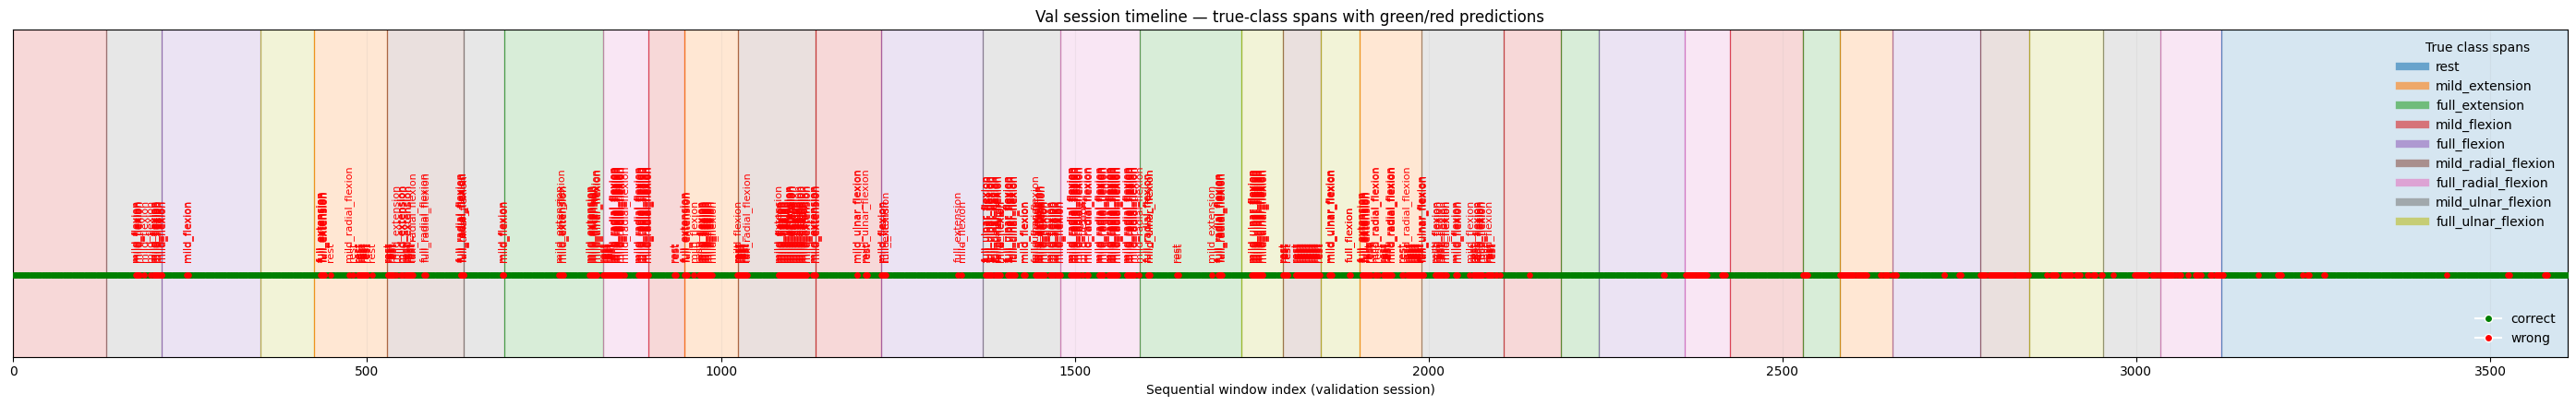

In [ ]:
# JUPYTER CELL — Sequential val timeline with clas3s-colored intervals + green/red dots + misclass labels

import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# --------------------------
# Config
# --------------------------
USE_MERGE     = False   # True → merge (5,6)->radial and (7,8)->ulnar (7 classes total)
FALLBACK_TAU  = None    # e.g., 0.60 to fallback to rest when max prob < tau; None to disable
MAX_ANNOTS    = 500     # safety cap on number of red-dot annotations to avoid clutter

# If you want to override the loader to ensure strict sequential order:
val_seq_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Class name tables
names_9 = [
    "rest",
    "mild_extension","full_extension",
    "mild_flexion","full_flexion",
    "mild_radial_flexion","full_radial_flexion",
    "mild_ulnar_flexion","full_ulnar_flexion"
]
names_7 = [
    "rest",
    "mild_extension","full_extension",
    "mild_flexion","full_flexion",
    "radial_flexion","ulnar_flexion"
]

def merge_probs_9_to_7(p9):
    p7 = np.zeros((p9.shape[0], 7), dtype=np.float32)
    p7[:, 0] = p9[:, 0]
    p7[:, 1] = p9[:, 1]
    p7[:, 2] = p9[:, 2]
    p7[:, 3] = p9[:, 3]
    p7[:, 4] = p9[:, 4]
    p7[:, 5] = p9[:, 5] + p9[:, 6]
    p7[:, 6] = p9[:, 7] + p9[:, 8]
    return p7

def merge_labels_9_to_7(y9):
    y7 = y9.copy()
    y7 = np.where(y7 == 6, 5, y7)  # full_radial -> radial(5)
    y7 = np.where(y7 == 5, 5, y7)  # mild_radial -> radial(5)
    y7 = np.where(y7 == 8, 6, y7)  # full_ulnar  -> ulnar(6)
    y7 = np.where(y7 == 7, 6, y7)  # mild_ulnar  -> ulnar(6)
    return y7

# Nice distinct colors for class spans
def class_palette(n):
    base = plt.cm.get_cmap('tab10', 10)
    cols = [base(i % 10) for i in range(n)]
    # lighten a bit for spans
    cols_light = []
    for r,g,b,a in cols:
        cols_light.append((r, g, b, 0.18))
    return cols, cols_light

# --------------------------
# Pass through val sequentially
# --------------------------
model.eval()
all_true, all_pred, all_conf = [], [], []

with torch.no_grad():
    for batch in val_seq_loader:
        if isinstance(batch, (list, tuple)):
            x, y = batch[0], batch[1]
        else:
            x, y = batch["signal"], batch["label"]
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        logits = model(x)                         # (1, num_classes=9)
        probs9 = torch.softmax(logits, dim=1)     # (1, 9)
        y_true9 = y.item()

        if USE_MERGE:
            p = merge_probs_9_to_7(probs9.cpu().numpy())  # (1, 7)
            y_true = int(merge_labels_9_to_7(np.array([y_true9]))[0])
            cls_names = names_7
        else:
            p = probs9.cpu().numpy()
            y_true = y_true9
            cls_names = names_9

        # fallback to rest if requested
        if FALLBACK_TAU is not None:
            mp = float(p.max(axis=1)[0])
            y_pred = int(p.argmax(axis=1)[0])
            if mp < FALLBACK_TAU:
                y_pred = 0
        else:
            mp = float(p.max(axis=1)[0])
            y_pred = int(p.argmax(axis=1)[0])

        all_true.append(y_true)
        all_pred.append(y_pred)
        all_conf.append(mp)

y_true_arr = np.array(all_true, dtype=int)
y_pred_arr = np.array(all_pred, dtype=int)
y_conf_arr = np.array(all_conf, dtype=float)

num_classes = len(cls_names)
cols_solid, cols_span = class_palette(num_classes)

# --------------------------
# Find contiguous true-class segments
# --------------------------
segments = []  # list of (start_idx, end_idx, class_id)
if y_true_arr.size > 0:
    start = 0
    cur = y_true_arr[0]
    for i in range(1, y_true_arr.size):
        if y_true_arr[i] != cur:
            segments.append((start, i-1, int(cur)))
            start = i
            cur = y_true_arr[i]
    segments.append((start, y_true_arr.size-1, int(cur)))

# --------------------------
# Build the plot
# --------------------------
N = y_true_arr.size
fig_w = min(max(N/60.0, 12), 28)  # adaptive width
plt.figure(figsize=(fig_w, 4.5))
ax = plt.gca()

# Draw class-colored spans with vertical boundaries
for (s, e, c) in segments:
    ax.axvspan(s - 0.5, e + 0.5, color=cols_span[c])
    ax.axvline(s - 0.5, color=cols_solid[c], lw=0.8, alpha=0.7)
    ax.axvline(e + 0.5, color=cols_solid[c], lw=0.8, alpha=0.7)

# Dots: green for correct, red for wrong
x = np.arange(N)
correct_mask = (y_pred_arr == y_true_arr)
ax.scatter(x[correct_mask], np.zeros(correct_mask.sum()), s=12, color='green', label="correct", zorder=3)
ax.scatter(x[~correct_mask], np.zeros((~correct_mask).sum()), s=14, color='red', label="wrong", zorder=3)

# Annotations above red dots with predicted class
wrong_idx = np.where(~correct_mask)[0]
# try to avoid heavy clutter: annotate up to MAX_ANNOTS (oldest first)
for k, i in enumerate(wrong_idx[:MAX_ANNOTS]):
    pred_name = cls_names[y_pred_arr[i]]
    ax.annotate(pred_name,
                xy=(i, 0.0), xytext=(0, 10),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, rotation=90, color='red')

# Cosmetic tweaks
ax.set_ylim(-0.5, 1.5)
ax.set_yticks([])
ax.set_xlim(-0.5, N - 0.5)
ax.set_xlabel("Sequential window index (validation session)")
ax.set_title("Val session timeline — true-class spans with green/red predictions"
             + (f"  (merged classes, τ={FALLBACK_TAU:.2f})" if USE_MERGE and FALLBACK_TAU is not None
                else f"  (merged classes)" if USE_MERGE
                else f"  (τ={FALLBACK_TAU:.2f})" if FALLBACK_TAU is not None
                else ""))

# Mini legend for class colors (span colors)
handles = []
labels  = []
for c in sorted(np.unique(y_true_arr)):
    handles.append(plt.Line2D([0], [0], color=cols_solid[c], lw=6, alpha=0.6))
    labels.append(cls_names[c])
leg1 = ax.legend(handles, labels, title="True class spans", frameon=False, loc="upper right")

# Add correct/wrong legend too
from matplotlib.lines import Line2D
dot_handles = [Line2D([0],[0], marker='o', color='w', label='correct', markerfacecolor='green', markersize=6),
               Line2D([0],[0], marker='o', color='w', label='wrong',   markerfacecolor='red',   markersize=6)]
ax.add_artist(leg1)
ax.legend(handles=dot_handles, frameon=False, loc="lower right")

ax.grid(axis='x', alpha=0.15)
plt.tight_layout()
plt.show()


In [25]:
# --- Temperature scaling that tolerates many dataset formats ---

import torch
import torch.nn.functional as F
from torch.optim import LBFGS
import numpy as np

def _to_tensor_on_device(x, device):
    """Convert x (tensor/ndarray/other) to float32 tensor on device."""
    if isinstance(x, torch.Tensor):
        return x.to(device)
    if isinstance(x, np.ndarray):
        return torch.from_numpy(x).to(device).float()
    raise TypeError(f"Unsupported batch type for inputs: {type(x)}")

def _unpack_batch(batch):
    """
    Try to extract (inputs, labels) from a variety of batch shapes:
    - (x, y)
    - (x, y, meta)
    - {'inputs': x, 'labels': y} or {'X': x, 'y': y}
    """
    if isinstance(batch, dict):
        # common keys
        for kx in ("signal", "input", "X", "x"):
            if kx in batch:
                x = batch[kx]
                break
        else:
            raise KeyError("Could not find inputs in batch dict (tried 'inputs','input','X','x').")
        for ky in ("labels", "label", "y", "target", "targets"):
            if ky in batch:
                y = batch[ky]
                break
        else:
            raise KeyError("Could not find labels in batch dict (tried 'labels','label','y','target','targets').")
        return x, y

    if isinstance(batch, (list, tuple)):
        if len(batch) < 2:
            raise ValueError(f"Batch tuple/list has length {len(batch)}; expected at least 2 (x, y).")
        return batch[0], batch[1]

    # last resort: some datasets return only x; no labels
    raise TypeError(f"Unsupported batch type: {type(batch)}")

def collect_logits_and_labels(model, loader, device):
    model.eval()
    logits_list, labels_list = [], []
    with torch.no_grad():
        for batch in loader:
            x_raw, y_raw = _unpack_batch(batch)

            # If your dataset returns file paths, intercept here:
            if isinstance(x_raw, str):
                raise TypeError("Your DataLoader is yielding strings for inputs (e.g., file paths). "
                                "Load the data to tensors inside your Dataset.__getitem__.")

            x = _to_tensor_on_device(x_raw, device)
            y = torch.as_tensor(y_raw, device=device, dtype=torch.long)

            logits = model(x)
            logits_list.append(logits.detach().cpu())
            labels_list.append(y.detach().cpu())

    logits = torch.cat(logits_list)   # on CPU
    labels = torch.cat(labels_list)   # on CPU
    return logits, labels

def tune_temperature_from_logits(logits_cpu, labels_cpu, max_iter=50):
    """
    Optimize a single temperature parameter T (on CPU) to minimize CE on (logits, labels).
    """
    logits = logits_cpu  # fixed tensor (no grad)
    labels = labels_cpu

    temperature = torch.ones(1, requires_grad=True)  # on CPU
    optimizer = LBFGS([temperature], lr=0.01, max_iter=max_iter)

    def closure():
        optimizer.zero_grad()
        scaled = logits / temperature.clamp_min(1e-3)  # avoid tiny T
        loss = F.cross_entropy(scaled, labels)
        loss.backward()
        return loss

    optimizer.step(closure)
    return float(temperature.item())

def calibrated_probs(model, loader, device, T):
    """
    Recompute logits on loader and return calibrated probabilities (on CPU).
    """
    logits_cpu, _ = collect_logits_and_labels(model, loader, device)
    probs = F.softmax(logits_cpu / T, dim=1)
    return probs

# ------------------ Usage ------------------
# device can be "cuda", torch.device("cuda"), or "cpu"
# Make sure your Dataset returns tensors (not strings/paths).
logits_val, labels_val = collect_logits_and_labels(model, val_loader, device)
T = tune_temperature_from_logits(logits_val, labels_val, max_iter=50)

print(f"Calibrated temperature T = {T:.3f}")

# Get calibrated probabilities for validation set
probs_val = F.softmax(logits_val / T, dim=1)   # shape: (N, num_classes)
preds_val = probs_val.argmax(dim=1)

# Example: overall accuracy after calibration
acc = (preds_val == labels_val).float().mean().item()
print(f"Validation accuracy (with calibrated probs): {acc*100:.2f}%")


Calibrated temperature T = 0.941
Validation accuracy (with calibrated probs): 68.20%


In [1]:
# JUPYTER CELL — Sequential val timeline with class-colored intervals + green/red dots + misclass labels

import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# --------------------------
# Config
# --------------------------
USE_MERGE     = False   # True → merge (5,6)->radial and (7,8)->ulnar (7 classes total)
FALLBACK_TAU  = None    # e.g., 0.60 to fallback to rest when max prob < tau; None to disable
MAX_ANNOTS    = 500     # safety cap on number of red-dot annotations to avoid clutter

# If you want to override the loader to ensure strict sequential order:
val_seq_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# Class name tables
names_9 = [
    "rest",
    "mild_extension","full_extension",
    "mild_flexion","full_flexion",
    "mild_radial_flexion","full_radial_flexion",
    "mild_ulnar_flexion","full_ulnar_flexion"
]
names_7 = [
    "rest",
    "mild_extension","full_extension",
    "mild_flexion","full_flexion",
    "radial_flexion","ulnar_flexion"
]

def merge_probs_9_to_7(p9):
    p7 = np.zeros((p9.shape[0], 7), dtype=np.float32)
    p7[:, 0] = p9[:, 0]
    p7[:, 1] = p9[:, 1]
    p7[:, 2] = p9[:, 2]
    p7[:, 3] = p9[:, 3]
    p7[:, 4] = p9[:, 4]
    p7[:, 5] = p9[:, 5] + p9[:, 6]
    p7[:, 6] = p9[:, 7] + p9[:, 8]
    return p7

def merge_labels_9_to_7(y9):
    y7 = y9.copy()
    y7 = np.where(y7 == 6, 5, y7)  # full_radial -> radial(5)
    y7 = np.where(y7 == 5, 5, y7)  # mild_radial -> radial(5)
    y7 = np.where(y7 == 8, 6, y7)  # full_ulnar  -> ulnar(6)
    y7 = np.where(y7 == 7, 6, y7)  # mild_ulnar  -> ulnar(6)
    return y7

# Nice distinct colors for class spans
def class_palette(n):
    base = plt.cm.get_cmap('tab10', 10)
    cols = [base(i % 10) for i in range(n)]
    # lighten a bit for spans
    cols_light = []
    for r,g,b,a in cols:
        cols_light.append((r, g, b, 0.18))
    return cols, cols_light

# --------------------------
# Pass through val sequentially
# --------------------------
model.eval()
all_true, all_pred, all_conf = [], [], []

with torch.no_grad():
    for batch in val_seq_loader:
        if isinstance(batch, (list, tuple)):
            x, y = batch[0], batch[1]
        else:
            x, y = batch["x"], batch["y"]
        x = x.to(device, non_blocking=True)
        y = y.to(device, non_blocking=True)

        logits = model(x)                         # (1, num_classes=9)
        probs9 = torch.softmax(logits, dim=1)     # (1, 9)
        y_true9 = y.item()

        if USE_MERGE:
            p = merge_probs_9_to_7(probs9.cpu().numpy())  # (1, 7)
            y_true = int(merge_labels_9_to_7(np.array([y_true9]))[0])
            cls_names = names_7
        else:
            p = probs9.cpu().numpy()
            y_true = y_true9
            cls_names = names_9

        # fallback to rest if requested
        if FALLBACK_TAU is not None:
            mp = float(p.max(axis=1)[0])
            y_pred = int(p.argmax(axis=1)[0])
            if mp < FALLBACK_TAU:
                y_pred = 0
        else:
            mp = float(p.max(axis=1)[0])
            y_pred = int(p.argmax(axis=1)[0])

        all_true.append(y_true)
        all_pred.append(y_pred)
        all_conf.append(mp)

y_true_arr = np.array(all_true, dtype=int)
y_pred_arr = np.array(all_pred, dtype=int)
y_conf_arr = np.array(all_conf, dtype=float)

num_classes = len(cls_names)
cols_solid, cols_span = class_palette(num_classes)

# --------------------------
# Find contiguous true-class segments
# --------------------------
segments = []  # list of (start_idx, end_idx, class_id)
if y_true_arr.size > 0:
    start = 0
    cur = y_true_arr[0]
    for i in range(1, y_true_arr.size):
        if y_true_arr[i] != cur:
            segments.append((start, i-1, int(cur)))
            start = i
            cur = y_true_arr[i]
    segments.append((start, y_true_arr.size-1, int(cur)))

# --------------------------
# Build the plot
# --------------------------
N = y_true_arr.size
fig_w = min(max(N/60.0, 12), 28)  # adaptive width
plt.figure(figsize=(fig_w, 4.5))
ax = plt.gca()

# Draw class-colored spans with vertical boundaries
for (s, e, c) in segments:
    ax.axvspan(s - 0.5, e + 0.5, color=cols_span[c])
    ax.axvline(s - 0.5, color=cols_solid[c], lw=0.8, alpha=0.7)
    ax.axvline(e + 0.5, color=cols_solid[c], lw=0.8, alpha=0.7)

# Dots: green for correct, red for wrong
x = np.arange(N)
correct_mask = (y_pred_arr == y_true_arr)
ax.scatter(x[correct_mask], np.zeros(correct_mask.sum()), s=12, color='green', label="correct", zorder=3)
ax.scatter(x[~correct_mask], np.zeros((~correct_mask).sum()), s=14, color='red', label="wrong", zorder=3)

# Annotations above red dots with predicted class
wrong_idx = np.where(~correct_mask)[0]
# try to avoid heavy clutter: annotate up to MAX_ANNOTS (oldest first)
for k, i in enumerate(wrong_idx[:MAX_ANNOTS]):
    pred_name = cls_names[y_pred_arr[i]]
    ax.annotate(pred_name,
                xy=(i, 0.0), xytext=(0, 10),
                textcoords='offset points',
                ha='center', va='bottom',
                fontsize=8, rotation=90, color='red')

# Cosmetic tweaks
ax.set_ylim(-0.5, 1.5)
ax.set_yticks([])
ax.set_xlim(-0.5, N - 0.5)
ax.set_xlabel("Sequential window index (validation session)")
ax.set_title("Val session timeline — true-class spans with green/red predictions"
             + (f"  (merged classes, τ={FALLBACK_TAU:.2f})" if USE_MERGE and FALLBACK_TAU is not None
                else f"  (merged classes)" if USE_MERGE
                else f"  (τ={FALLBACK_TAU:.2f})" if FALLBACK_TAU is not None
                else ""))

# Mini legend for class colors (span colors)
handles = []
labels  = []
for c in sorted(np.unique(y_true_arr)):
    handles.append(plt.Line2D([0], [0], color=cols_solid[c], lw=6, alpha=0.6))
    labels.append(cls_names[c])
leg1 = ax.legend(handles, labels, title="True class spans", frameon=False, loc="upper right")

# Add correct/wrong legend too
from matplotlib.lines import Line2D
dot_handles = [Line2D([0],[0], marker='o', color='w', label='correct', markerfacecolor='green', markersize=6),
               Line2D([0],[0], marker='o', color='w', label='wrong',   markerfacecolor='red',   markersize=6)]
ax.add_artist(leg1)
ax.legend(handles=dot_handles, frameon=False, loc="lower right")

ax.grid(axis='x', alpha=0.15)
plt.tight_layout()
plt.show()


NameError: name 'val_dataset' is not defined